In [1]:
import pandas as pd
import itertools
from tqdm import tqdm
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
link_table = pd.read_csv('archive/Collaboration_links_w_genre.csv')

In [3]:
link_table

source             target  release_date
0          Robert Schumann  Vladimir Horowitz          1928
1          Frédéric Chopin  Vladimir Horowitz          1928
2        Felix Mendelssohn  Vladimir Horowitz          1928
3              Franz Liszt  Vladimir Horowitz          1928
4      Sergei Rachmaninoff  Vladimir Horowitz          1928
...                    ...                ...           ...
14855             Lil Tjay            Sheff G          2020
14856             Lil Tjay      Sleepy Hallow          2020
14857            Meek Mill        Roddy Ricch          2020
14858                 Kygo          Oh Wonder          2020
14859            Cash Cash       Andy Grammer          2020

[14860 rows x 3 columns]

In [4]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(link_table, create_using=Graphtype)

# Degree distribution 

Text(0, 0.5, 'Probability')

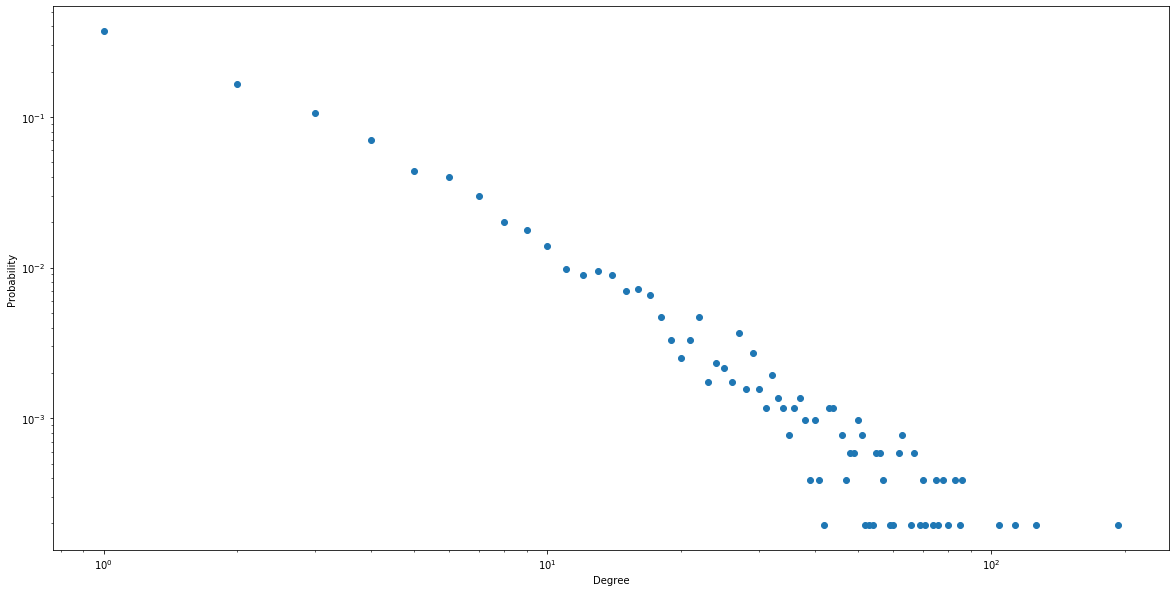

In [5]:
degree_freq = nx.degree_histogram(G)
degree_freq_normalized = [x/sum(degree_freq) for x in degree_freq]
degrees = range(len(degree_freq))
plt.figure(figsize=(20, 10)) 
plt.loglog(degrees, degree_freq_normalized,'o') 
plt.xlabel('Degree')
plt.ylabel('Probability')

# Degree Correlations

In [6]:
nx.degree_assortativity_coefficient(G)

0.08133312051974478

In [7]:
artist_degree_avg_neighbor_degree_dict = dict()
degree_dict = dict(G.degree())

for artist in degree_dict.keys():
    artist_degree_avg_neighbor_degree_dict[artist] = dict()
    artist_degree_avg_neighbor_degree_dict[artist]['degree'] = degree_dict[artist]
    neighbors_of_artist = [n for n in G.neighbors(artist)]
    neighbor_degrees = []
    for neighbor in neighbors_of_artist:
        neighbor_degrees.append(degree_dict[neighbor])
    artist_degree_avg_neighbor_degree_dict[artist]['knn'] = np.mean(neighbor_degrees)

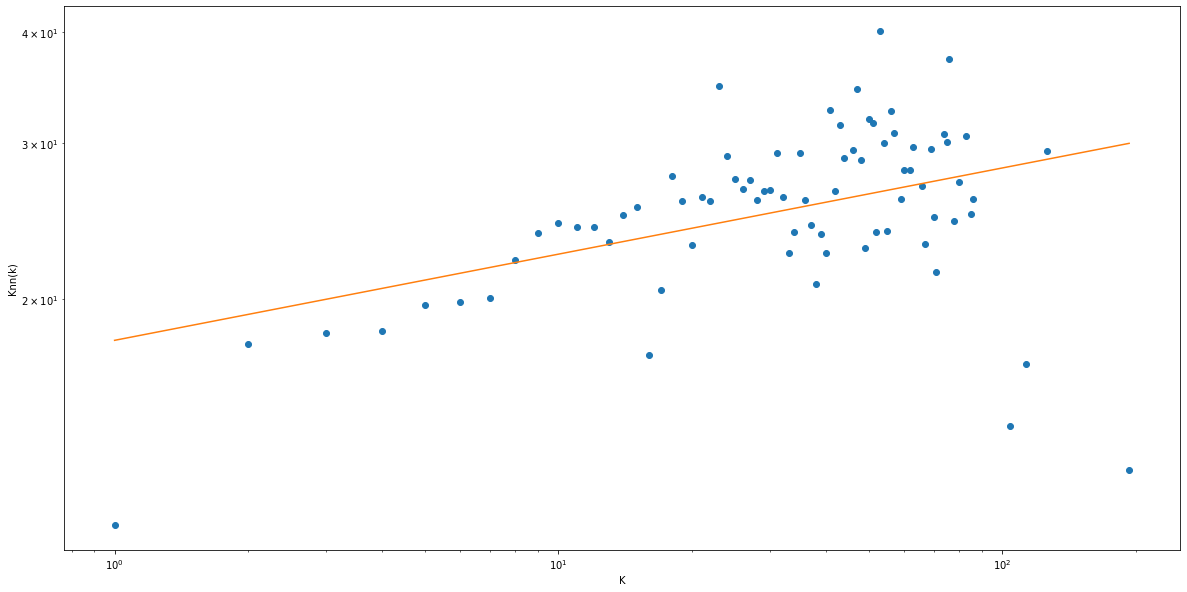

Correlation exponent and intercept:  0.0971425527517981 1.254972859843186


In [8]:
degree_list = []
knn_list = []

for artist in artist_degree_avg_neighbor_degree_dict.keys():
    degree_list.append(artist_degree_avg_neighbor_degree_dict[artist]['degree'])
    knn_list.append(artist_degree_avg_neighbor_degree_dict[artist]['knn'])
    
distinct_degrees = set(degree_list)
distinct_degree_list = []
distinct_knn_list = []

for degree in distinct_degrees:
    indices = [i for i, x in enumerate(degree_list) if x == degree]
    knn_sublist = [knn_list[i] for i in indices]
    distinct_degree_list.append(degree)
    distinct_knn_list.append(np.mean(knn_sublist))
    
    
plt.figure(figsize=(20, 10)) 

a = np.asarray(distinct_degree_list, dtype=float)
b = np.asarray(distinct_knn_list, dtype=float)
logA = np.log10(a)
logB = np.log10(b)
coefficients = np.polyfit(logA, logB, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(logA)
plt.loglog(a, b, 'o')
plt.loglog(a, np.power(10, ys))
plt.xlabel('K')
plt.ylabel('Knn(k)')
plt.show()

print('Correlation exponent and intercept: ', coefficients[0], coefficients[1])

In [9]:
def assortativity_in_two_groups(G,main_node_group,neighboring_node_group):
    
    artist_degree_avg_neighbor_degree_dict = dict()
    degree_dict = dict(G.degree())

    for artist in main_node_group: 
            neighbors_of_artist = [n for n in G.neighbors(artist)]
            neighbor_degrees = []
            for neighbor in neighbors_of_artist:
                if neighbor in neighboring_node_group:
                    neighbor_degrees.append(degree_dict[neighbor])
                    
            if neighbor_degrees != []:
                artist_degree_avg_neighbor_degree_dict[artist] = dict()
                artist_degree_avg_neighbor_degree_dict[artist]['degree'] = degree_dict[artist]
                artist_degree_avg_neighbor_degree_dict[artist]['knn'] = np.mean(neighbor_degrees)
           
    degree_list = []
    knn_list = []

    for artist in artist_degree_avg_neighbor_degree_dict.keys():
        degree_list.append(artist_degree_avg_neighbor_degree_dict[artist]['degree'])
        knn_list.append(artist_degree_avg_neighbor_degree_dict[artist]['knn'])

    distinct_degrees = set(degree_list)
    distinct_degree_list = []
    distinct_knn_list = []

    for degree in distinct_degrees:
        indices = [i for i, x in enumerate(degree_list) if x == degree]
        knn_sublist = [knn_list[i] for i in indices]
        distinct_degree_list.append(degree)
        distinct_knn_list.append(np.mean(knn_sublist))


    plt.figure(figsize=(20, 10)) 

    a = np.asarray(distinct_degree_list, dtype=float)
    b = np.asarray(distinct_knn_list, dtype=float)
    logA = np.log10(a)
    logB = np.log10(b)
    coefficients = np.polyfit(logA, logB, 1)
    polynomial = np.poly1d(coefficients)
    ys = polynomial(logA)
    plt.loglog(a, b, 'o')
    plt.loglog(a, np.power(10, ys))
    plt.xlabel('K')
    plt.ylabel('Knn(k)')
    plt.show()

    print('Correlation exponent and intercept: ', coefficients[0], coefficients[1])
    
    return

In [10]:
artist_w_genre_gender_race_in_net = pd.read_csv('archive/network_artist_genre_gender_race.csv')

In [11]:
artist_w_genre_gender_race_in_net

name filtered_genre   gender   race       api     black  \
0            $NOT        Hip-hop  unknown  white  0.057212  0.025846   
1     $uicideBoy$        Hip-hop  unknown  white  0.002377  0.112942   
2       ((( O )))            Pop  unknown    api  0.562272  0.073607   
3        (G)I-DLE            Pop  unknown  white  0.033933  0.082678   
4          *NSYNC            EDM  unknown  white  0.025099  0.028439   
...           ...            ...      ...    ...       ...       ...   
5136          王夢麟            Pop  unknown    api  0.562272  0.073607   
5137       笠井 紀美子           Jazz  unknown    api  0.562272  0.073607   
5138           葉歡            Pop  unknown    api  0.562272  0.073607   
5139          藍戰士            Pop  unknown    api  0.562272  0.073607   
5140           鄭怡            Pop  unknown    api  0.562272  0.073607   

      hispanic     white  
0     0.009496  0.907446  
1     0.019382  0.865299  
2     0.071487  0.292634  
3     0.043558  0.839830  
4     0.022025  0.924437  
...        ...       ...  
5136  0.071487  0.292634  
5137  0.071487  0.292634  
5138  0.071487  0.292634  
5139  0.071487  0.292634  
5140  0.071487  0.292634  

[5141 rows x 8 columns]

# Popularity Correlations

In [16]:
# artist_w_genre_gender_race_in_net = pd.read_csv('archive/network_artist_genre_gender_race_popularity.csv')
artist_w_genre_gender_race_in_net = pd.read_csv('archive/Collaboration_nodes_w_genre.csv')

In [18]:
popularity_dict = dict()

for index, row in artist_w_genre_gender_race_in_net.iterrows():
    popularity_dict[row['Id']] = row['populairty']

In [19]:
artist_degree_avg_neighbor_popularity_dict = dict()

for artist in popularity_dict.keys():
    artist_degree_avg_neighbor_popularity_dict[artist] = dict()
    artist_degree_avg_neighbor_popularity_dict[artist]['popularity'] = popularity_dict[artist]
    neighbors_of_artist = [n for n in G.neighbors(artist)]
    neighbor_popularity = []
    for neighbor in neighbors_of_artist:
        neighbor_popularity.append(popularity_dict[neighbor])
    artist_degree_avg_neighbor_popularity_dict[artist]['popularity_nn'] = np.mean(neighbor_popularity)

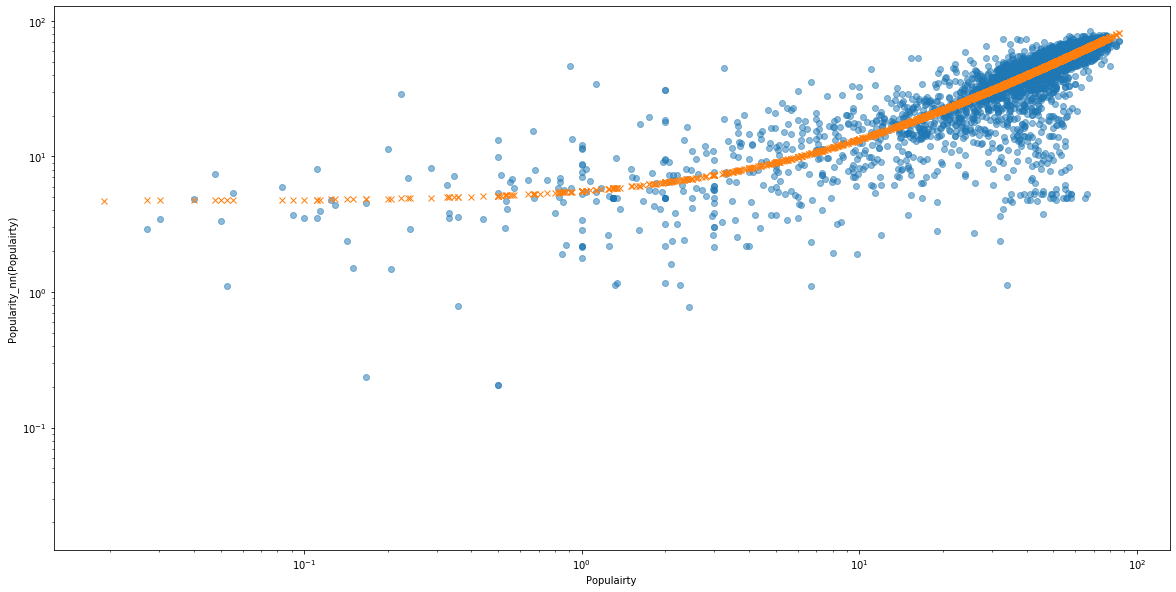

Correlation exponent and intercept:  0.00032139385548550205 0.863244784522902 4.709394707678058


In [20]:
popularity_list = []
popularity_nn_list = []

for artist in artist_degree_avg_neighbor_popularity_dict.keys():
    popularity_list.append(artist_degree_avg_neighbor_popularity_dict[artist]['popularity'])
    popularity_nn_list.append(artist_degree_avg_neighbor_popularity_dict[artist]['popularity_nn'])
    
plt.figure(figsize=(20, 10)) 

a = np.asarray(popularity_list, dtype=float)
b = np.asarray(popularity_nn_list, dtype=float)
coefficients = np.polyfit(a, b, 2)
polynomial = np.poly1d(coefficients)
ys = polynomial(a)
plt.loglog(a, b, 'o', alpha = 0.5)
plt.loglog(a, ys, 'x')
plt.xlabel('Populairty')
plt.ylabel('Popularity_nn(Populairty)')
plt.show()

print('Correlation exponent and intercept: ', coefficients[0], coefficients[1], coefficients[2])

In [21]:
def populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,main_node_group,neighboring_node_group):
    
    artist_degree_avg_neighbor_popularity_dict = dict()
    
    popularity_dict = dict()

    for index, row in artist_w_genre_gender_race_in_net.iterrows():
        popularity_dict[row['Id']] = row['populairty']

    for artist in main_node_group:
        artist_degree_avg_neighbor_popularity_dict[artist] = dict()
        artist_degree_avg_neighbor_popularity_dict[artist]['popularity'] = popularity_dict[artist]
        neighbors_of_artist = [n for n in G.neighbors(artist)]
        neighbor_popularity = []
        for neighbor in neighbors_of_artist:
            neighbor_popularity.append(popularity_dict[neighbor])
        artist_degree_avg_neighbor_popularity_dict[artist]['popularity_nn'] = np.mean(neighbor_popularity)
        
        if neighbor_degrees != []:
            artist_degree_avg_neighbor_popularity_dict[artist] = dict()
            artist_degree_avg_neighbor_popularity_dict[artist]['popularity'] = popularity_dict[artist]
            artist_degree_avg_neighbor_popularity_dict[artist]['popularity_nn'] = np.mean(neighbor_popularity)
            
            
    popularity_list = []
    popularity_nn_list = []

    for artist in artist_degree_avg_neighbor_popularity_dict.keys():
        popularity_list.append(artist_degree_avg_neighbor_popularity_dict[artist]['popularity'])
        popularity_nn_list.append(artist_degree_avg_neighbor_popularity_dict[artist]['popularity_nn'])

    plt.figure(figsize=(20, 10)) 

    a = np.asarray(popularity_list, dtype=float)
    b = np.asarray(popularity_nn_list, dtype=float)
    coefficients = np.polyfit(a, b, 2)
    polynomial = np.poly1d(coefficients)
    ys = polynomial(a)
    plt.loglog(a, b, 'o', alpha = 0.5)
    plt.loglog(a, ys, 'x')
    plt.xlabel('Populairty')
    plt.ylabel('Popularity_nn(Populairty)')
    plt.show()

    print('Correlation exponent and intercept: ', coefficients[0], coefficients[1], coefficients[2])
    
    return

# Assortativity in gender

In [22]:
male_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['gender']=='male']['Id'].tolist()
female_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['gender']=='female']['Id'].tolist()
androgynous_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['gender']=='androgynous']['Id'].tolist()

In [23]:
def number_links_node_groups(G,group1,group2):
    edges_list = [n for n in nx.edge_boundary(G,group1,group2)]
    return len(edges_list)

In [24]:
print('Number edges between male artists: ', number_links_node_groups(G,male_artists,male_artists))
print('Number edges between male and female artists: ', number_links_node_groups(G,male_artists,female_artists))
print('Number edges between female artists: ', number_links_node_groups(G,female_artists,female_artists))

Number edges between male artists:  3089
Number edges between male and female artists:  2114
Number edges between female artists:  496


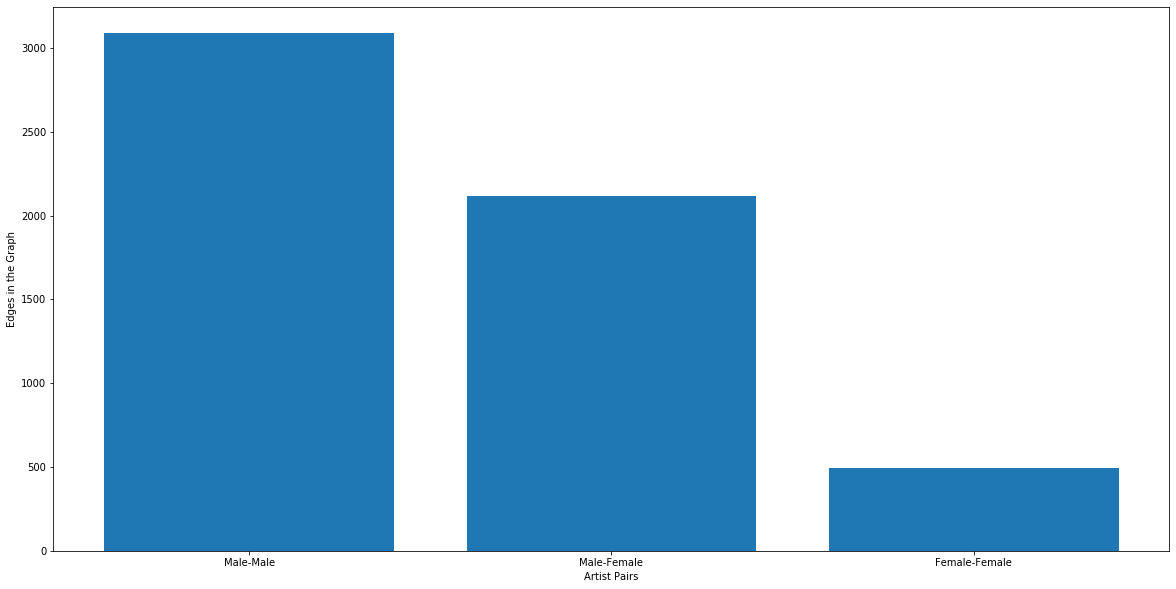

In [25]:
plt.figure(figsize=(20, 10)) 
artists_groups = ['Male-Male','Male-Female','Female-Female']
group_link_counts = [number_links_node_groups(G,male_artists,male_artists),number_links_node_groups(G,male_artists,female_artists),number_links_node_groups(G,female_artists,female_artists)]
plt.bar(artists_groups,group_link_counts)
plt.xlabel('Artist Pairs')
plt.ylabel('Edges in the Graph')
plt.show()

In [26]:
def fraction_links_node_groups(G,group1,group2):
    edges_list = [n for n in nx.edge_boundary(G,group1,group2)]
    return len(edges_list)/(len(group1)*len(group2))

In [48]:
print('Fraction edges between male artists: ', fraction_links_node_groups(G,male_artists,male_artists))
print('Fraction edges between male and female artists: ', fraction_links_node_groups(G,male_artists,female_artists))
print('Fraction edges between female artists: ', fraction_links_node_groups(G,female_artists,female_artists))
print('Fraction edges between androgynous artists: ', fraction_links_node_groups(G,androgynous_artists,androgynous_artists))
print('Fraction edges between male and androgynous artists: ', fraction_links_node_groups(G,male_artists,androgynous_artists))
print('Fraction edges between female and androgynous artists: ', fraction_links_node_groups(G,androgynous_artists,female_artists))

Fraction edges between male artists:  0.0007004535147392291
Fraction edges between male and female artists:  0.0010107095046854083
Fraction edges between female artists:  0.0004999919356139417
Fraction edges between androgynous artists:  0.0009909463537678483
Fraction edges between male and androgynous artists:  0.0010131032278683286
Fraction edges between female and androgynous artists:  0.0010309695156464785


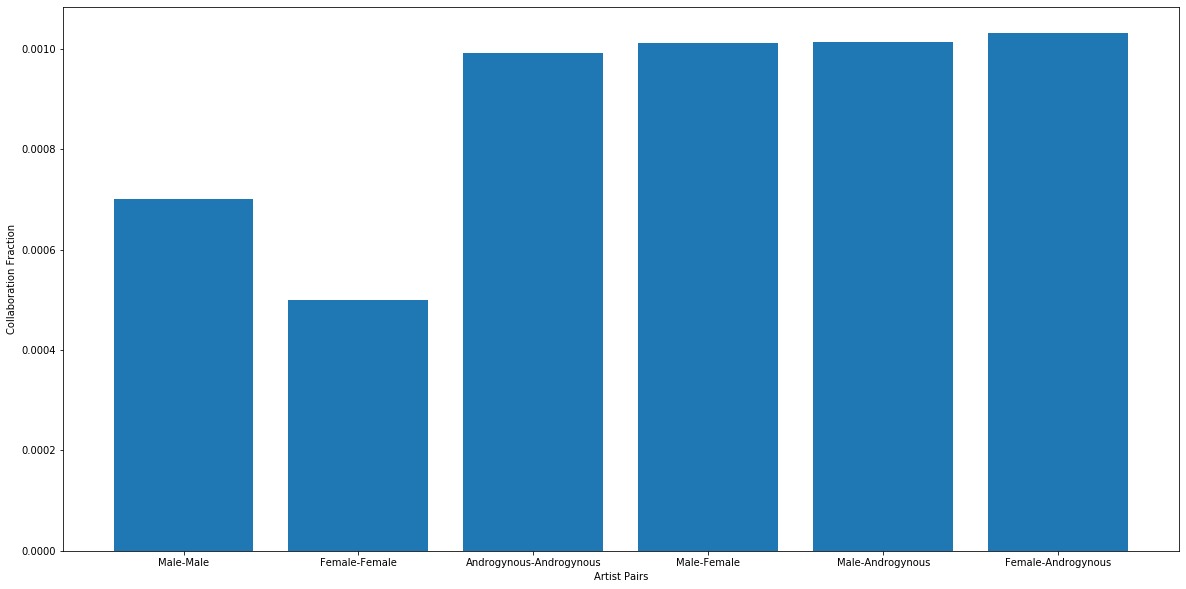

In [51]:
plt.figure(figsize=(20, 10)) 
artists_groups = ['Male-Male','Female-Female','Androgynous-Androgynous','Male-Female','Male-Androgynous','Female-Androgynous']
group_link_counts = [fraction_links_node_groups(G,male_artists,male_artists),fraction_links_node_groups(G,female_artists,female_artists),fraction_links_node_groups(G,androgynous_artists,androgynous_artists),fraction_links_node_groups(G,male_artists,female_artists),fraction_links_node_groups(G,male_artists,androgynous_artists),fraction_links_node_groups(G,female_artists,androgynous_artists)]
plt.bar(artists_groups,group_link_counts)
plt.xlabel('Artist Pairs')
plt.ylabel('Collaboration Fraction')
plt.show()

Degree correaltion among male artists


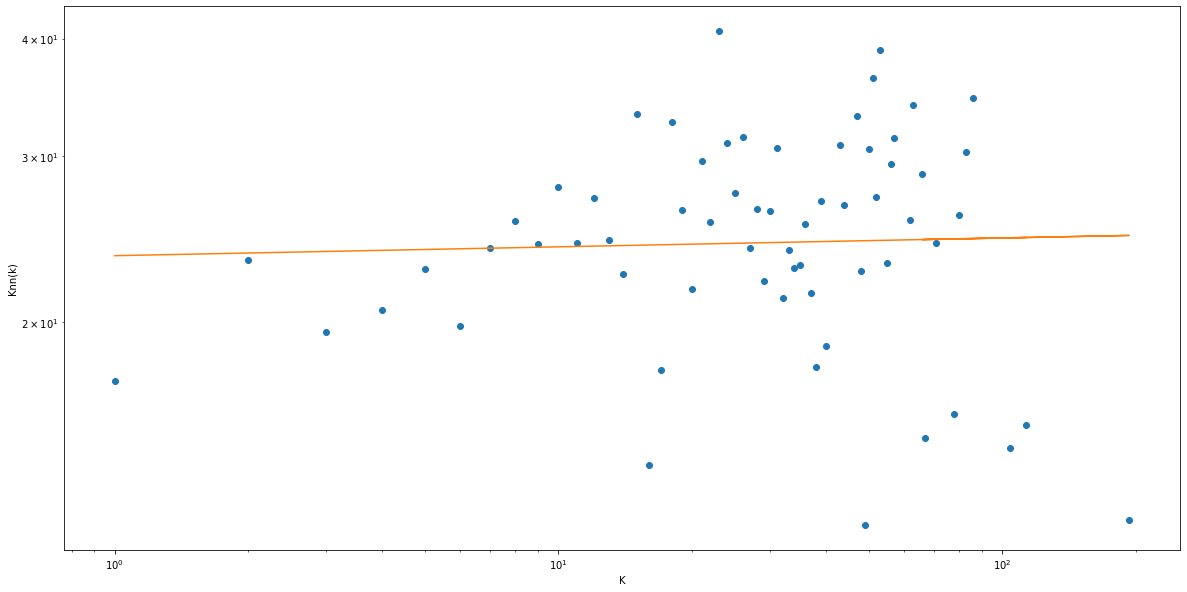

Correlation exponent and intercept:  0.009405020745714619 1.3717145139642033
Degree correaltion among female artists


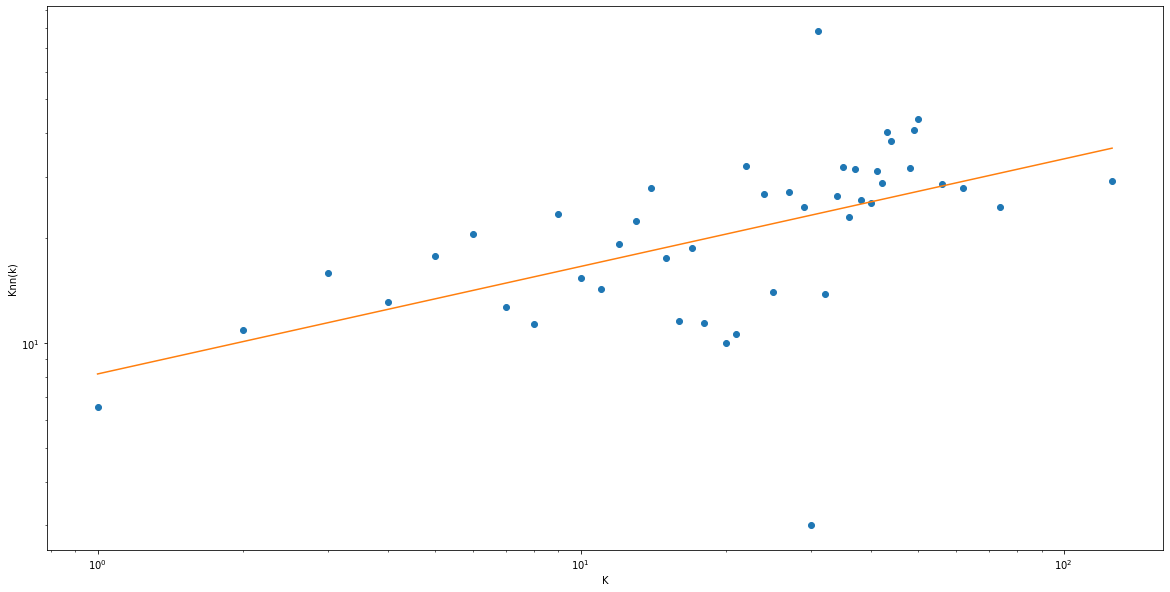

Correlation exponent and intercept:  0.3084186941703003 0.9112585201787192
Degree correaltion among androgynous artists


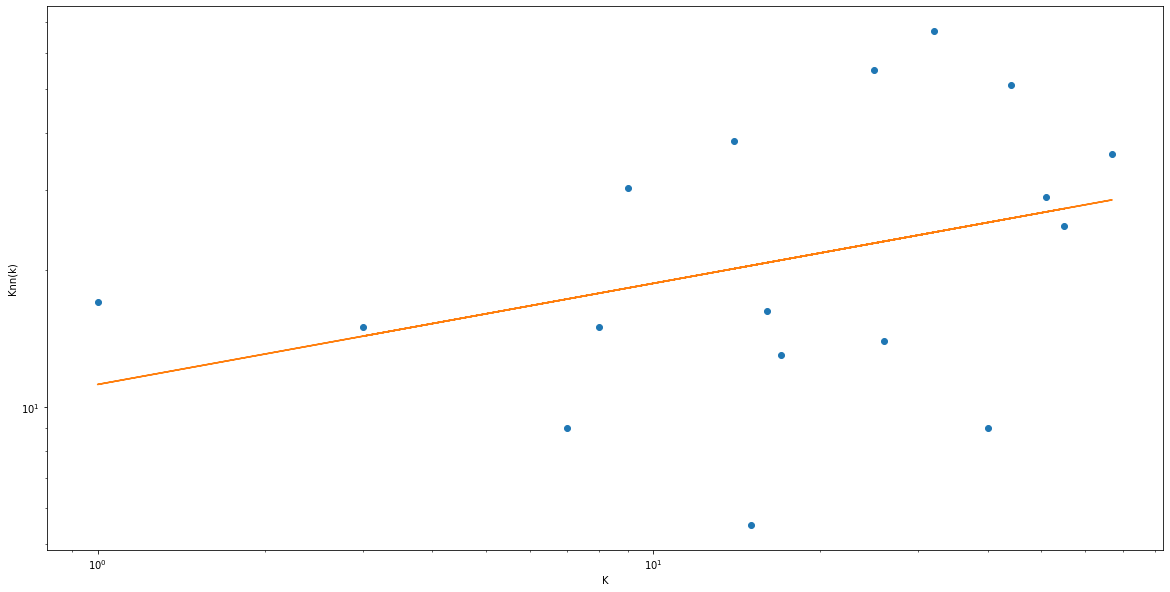

Correlation exponent and intercept:  0.2220956638637324 1.049731754043868
Degree correaltion between male and female artists


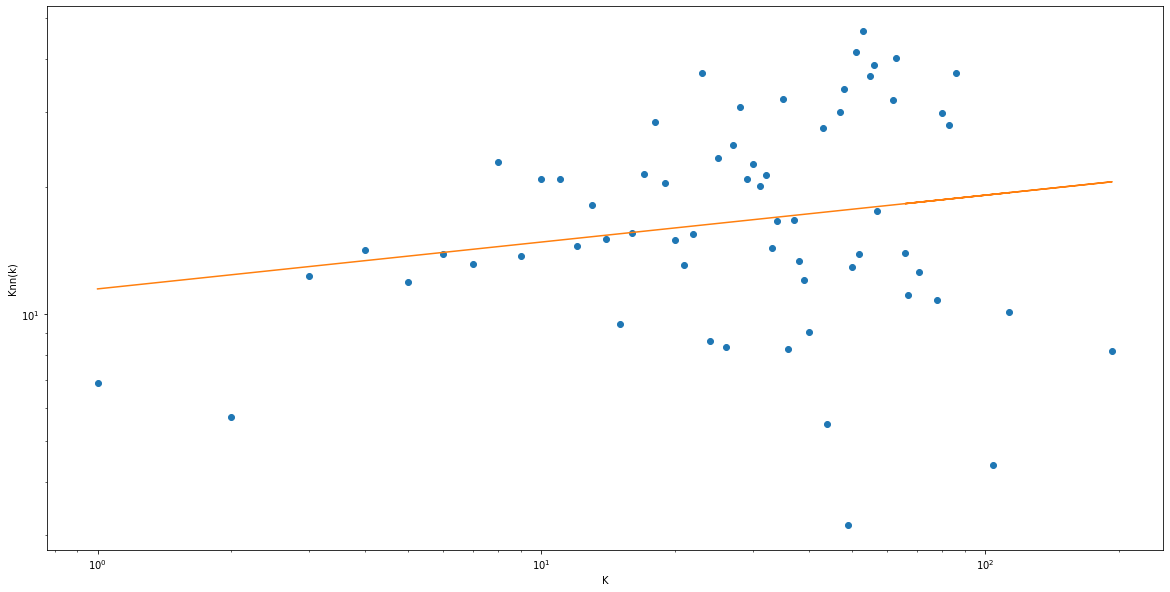

Correlation exponent and intercept:  0.11074867227621628 1.0592139887338727
Degree correaltion between female and male artists


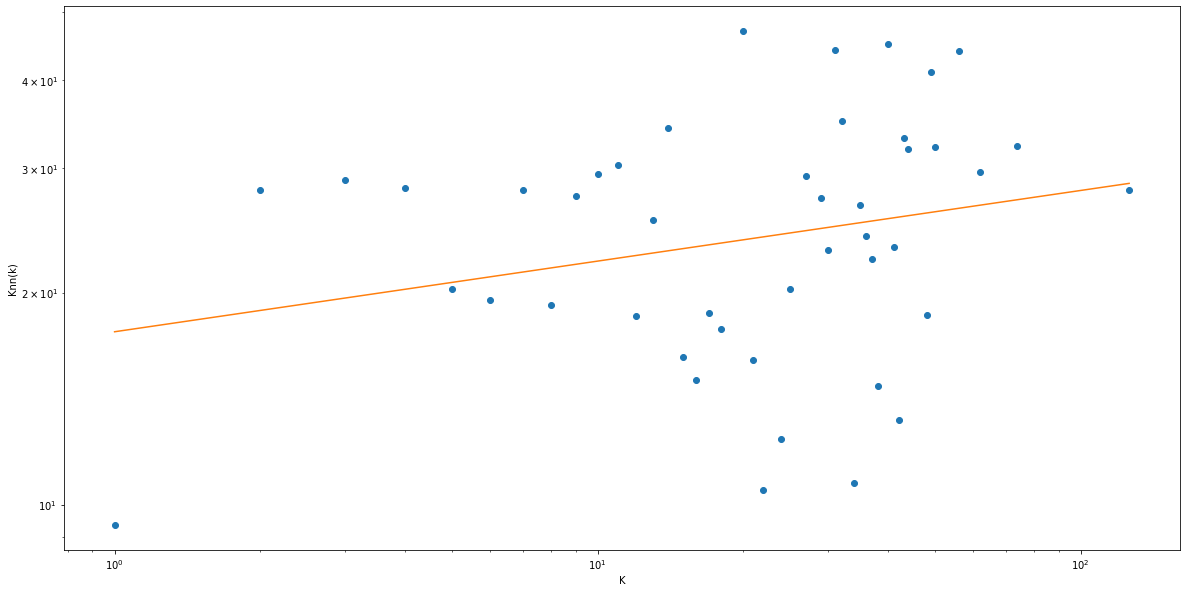

Correlation exponent and intercept:  0.10025413360049776 1.2454396367885918
Degree correaltion between male and androgynous artists


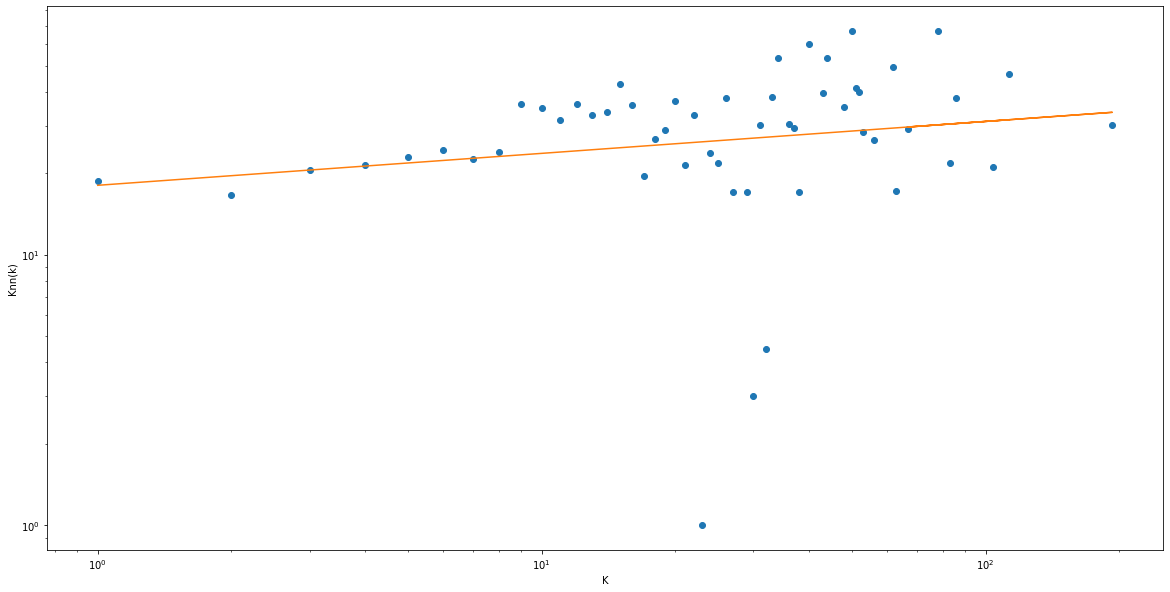

Correlation exponent and intercept:  0.11800842911257176 1.2563073204560211
Degree correaltion between androgynous and male artists


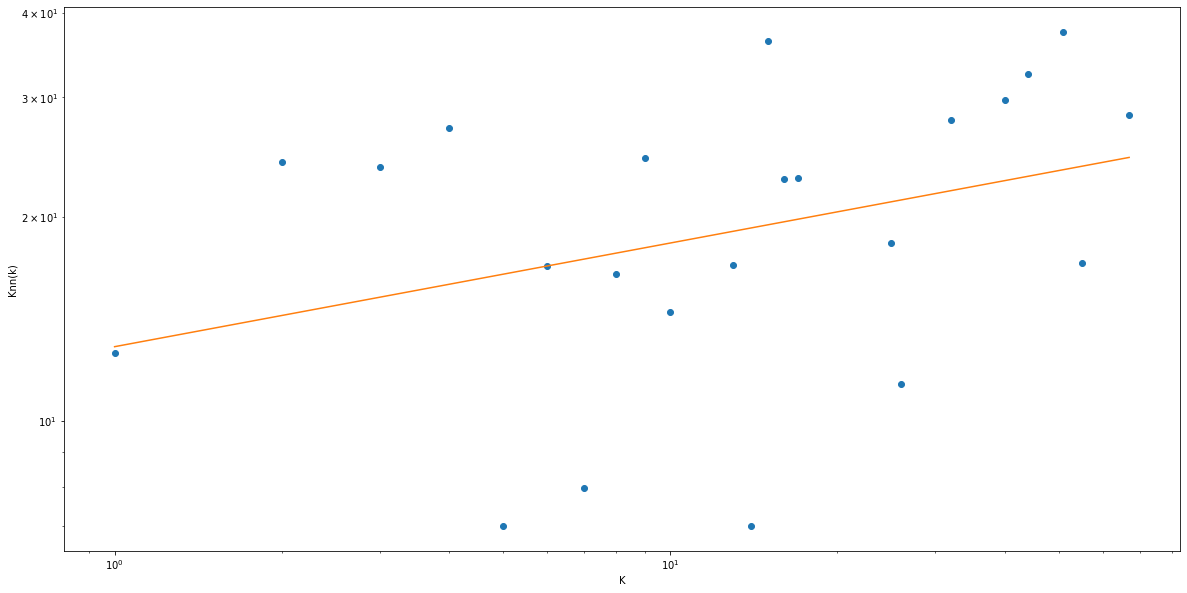

Correlation exponent and intercept:  0.1527630868455831 1.1098353516147634
Degree correaltion between female and androgynous artists


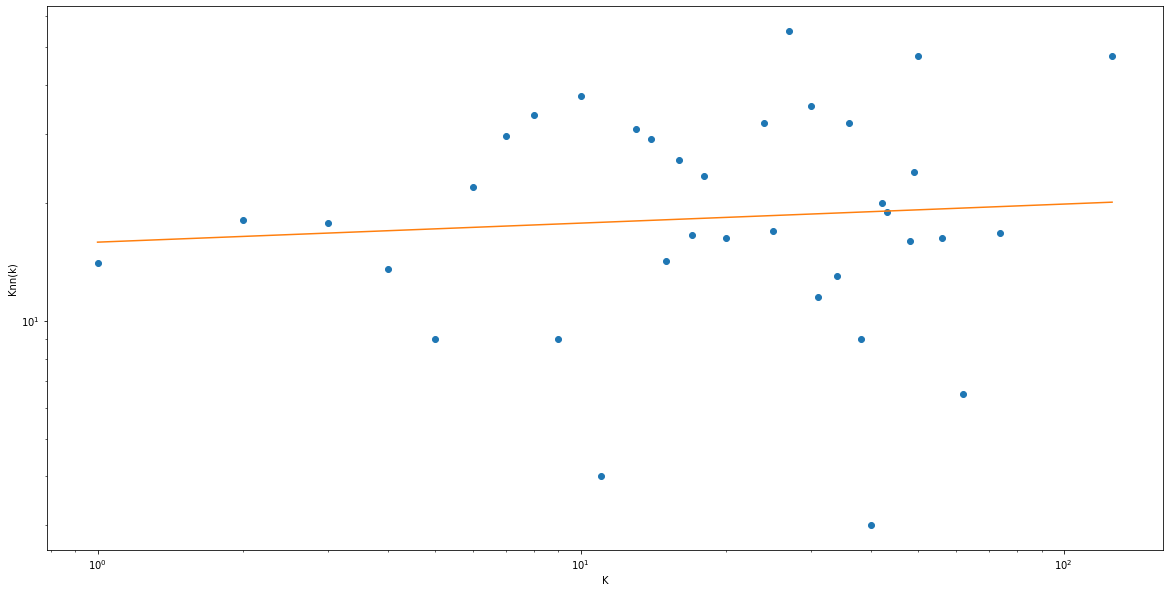

Correlation exponent and intercept:  0.048661587350921666 1.2008776751659713
Degree correaltion between androgynous and female artists


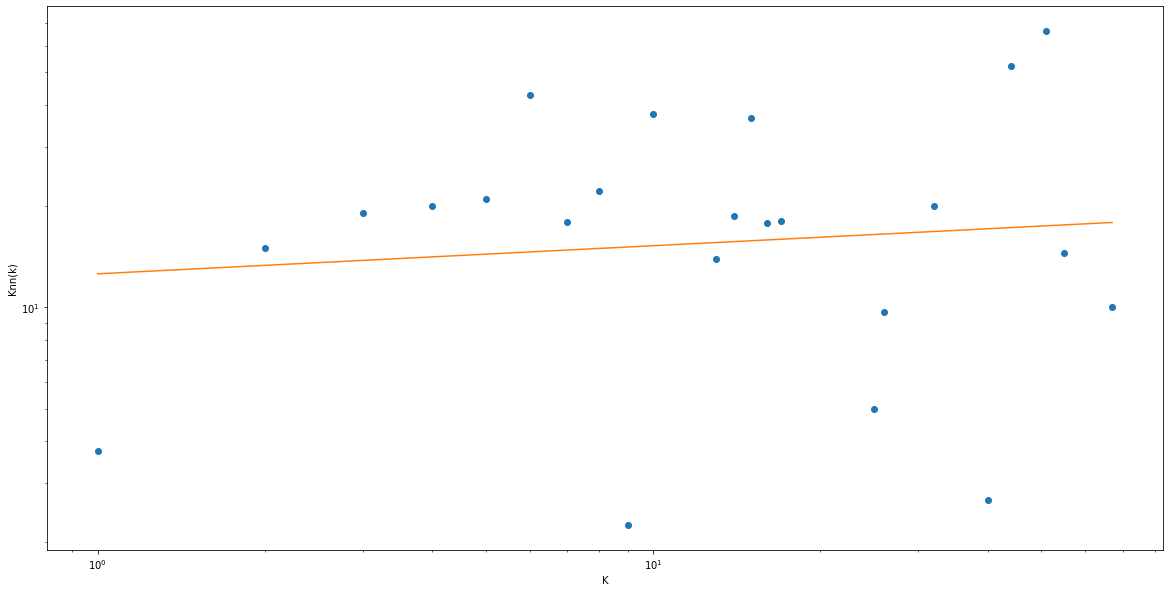

Correlation exponent and intercept:  0.08361572370182285 1.0999807144170588


In [29]:
print('Degree correaltion among male artists')
assortativity_in_two_groups(G,male_artists,male_artists)

print('Degree correaltion among female artists')
assortativity_in_two_groups(G,female_artists,female_artists)

print('Degree correaltion among androgynous artists')
assortativity_in_two_groups(G,androgynous_artists,androgynous_artists)

print('Degree correaltion between male and female artists')
assortativity_in_two_groups(G,male_artists,female_artists)

print('Degree correaltion between female and male artists')
assortativity_in_two_groups(G,female_artists,male_artists)

print('Degree correaltion between male and androgynous artists')
assortativity_in_two_groups(G,male_artists,androgynous_artists)

print('Degree correaltion between androgynous and male artists')
assortativity_in_two_groups(G,androgynous_artists,male_artists)

print('Degree correaltion between female and androgynous artists')
assortativity_in_two_groups(G,female_artists,androgynous_artists)

print('Degree correaltion between androgynous and female artists')
assortativity_in_two_groups(G,androgynous_artists,female_artists)

Popularity correaltion among male artists


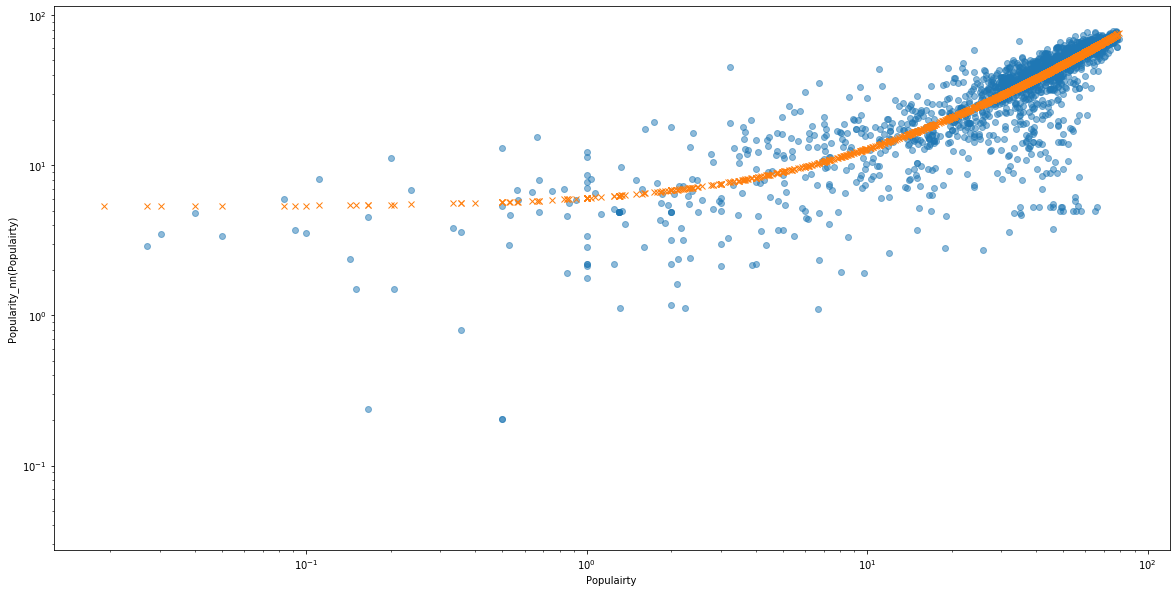

Correlation exponent and intercept:  0.0019615721917659672 0.7348462383091359 5.321806442965615
Popularity correaltion among female artists


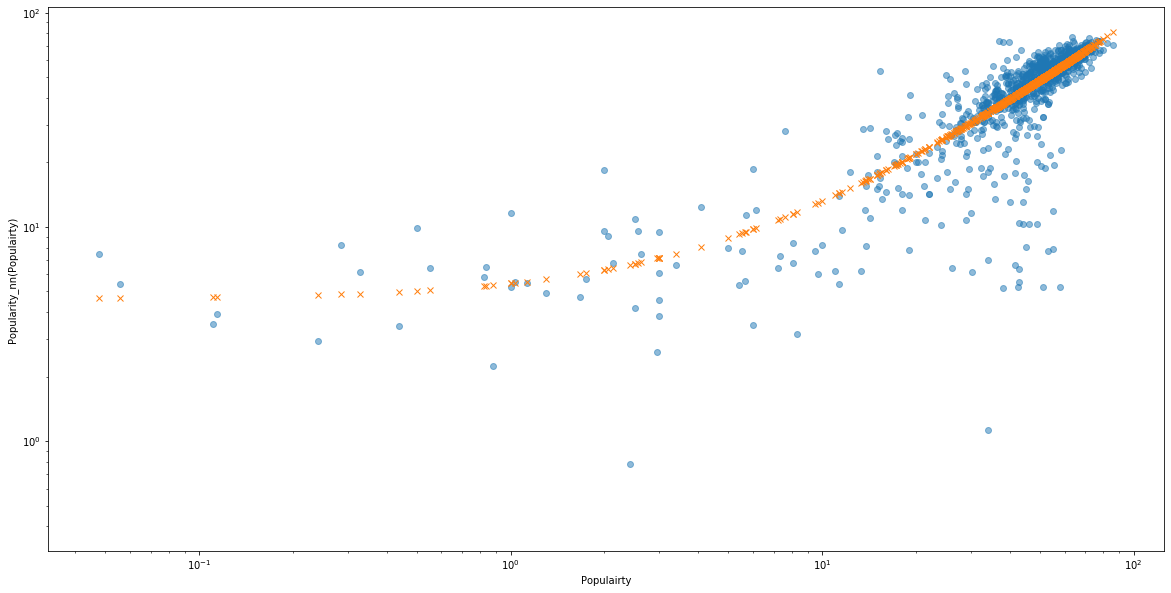

Correlation exponent and intercept:  0.0004235832512636865 0.8525416807814442 4.593812090527984
Popularity correaltion among androgynous artists


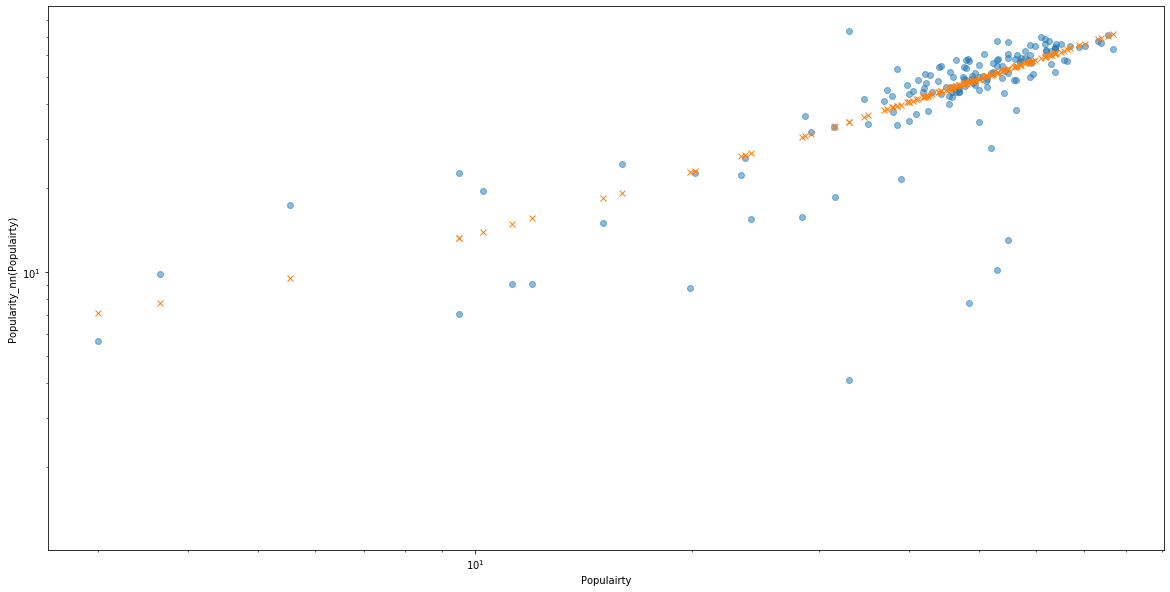

Correlation exponent and intercept:  -0.0011147833970510386 0.9585320959158983 4.252660065470811
Popularity correaltion between male and female artists


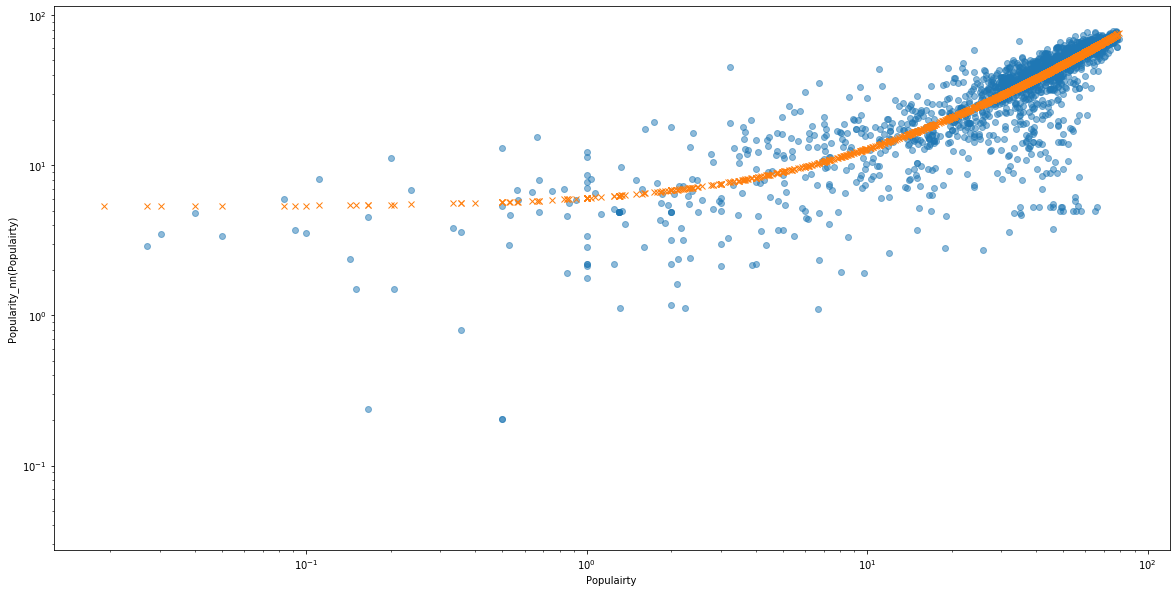

Correlation exponent and intercept:  0.0019615721917659672 0.7348462383091359 5.321806442965615
Popularity correaltion between female and male artists


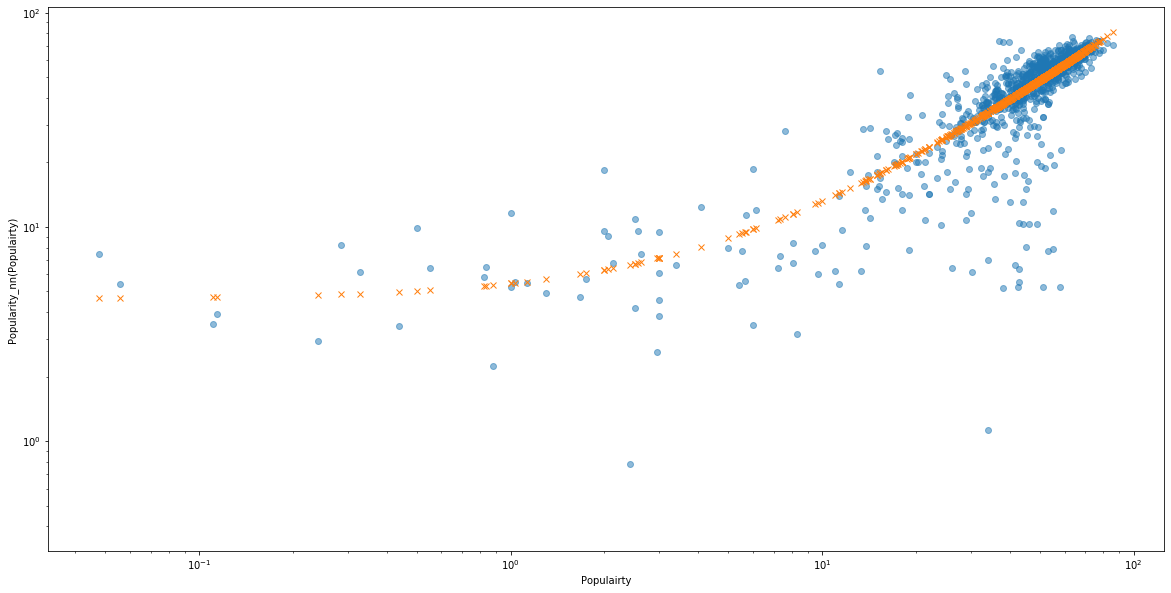

Correlation exponent and intercept:  0.0004235832512636865 0.8525416807814442 4.593812090527984
Popularity correaltion between male and androgynous artists


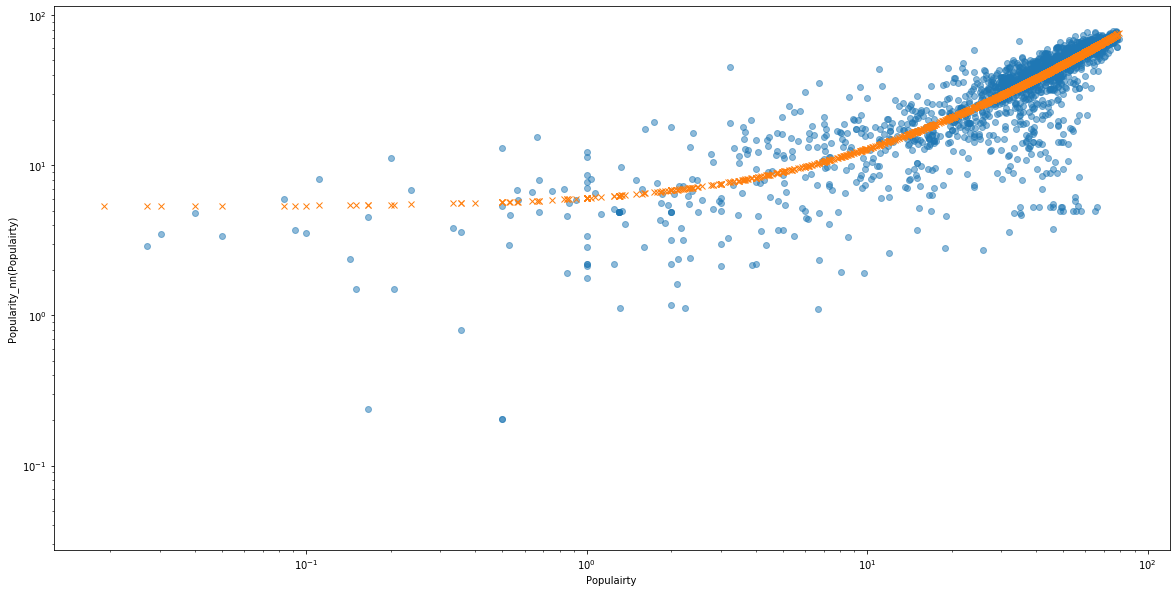

Correlation exponent and intercept:  0.0019615721917659672 0.7348462383091359 5.321806442965615
Popularity correaltion between androgynous and male artists


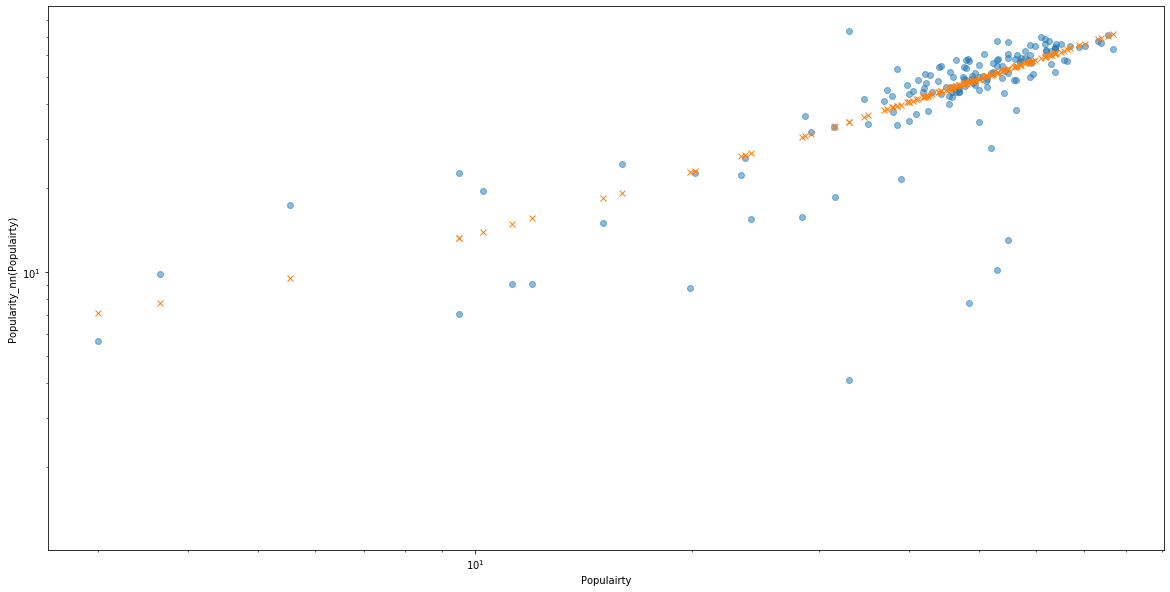

Correlation exponent and intercept:  -0.0011147833970510386 0.9585320959158983 4.252660065470811
Popularity correaltion between female and androgynous artists


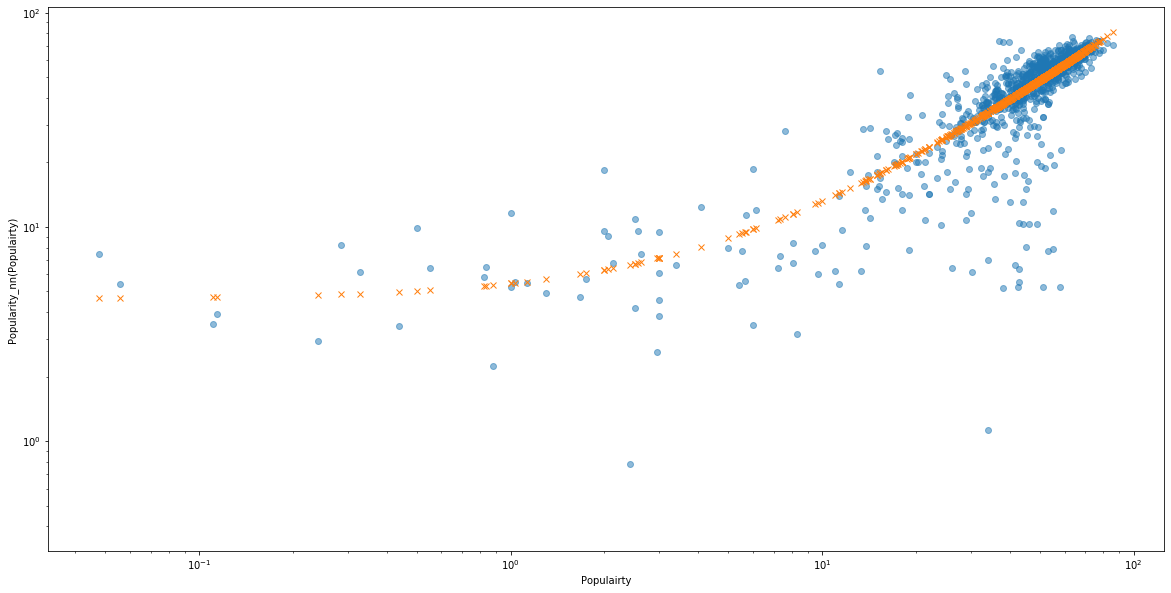

Correlation exponent and intercept:  0.0004235832512636865 0.8525416807814442 4.593812090527984
Popularity correaltion between androgynous and female artists


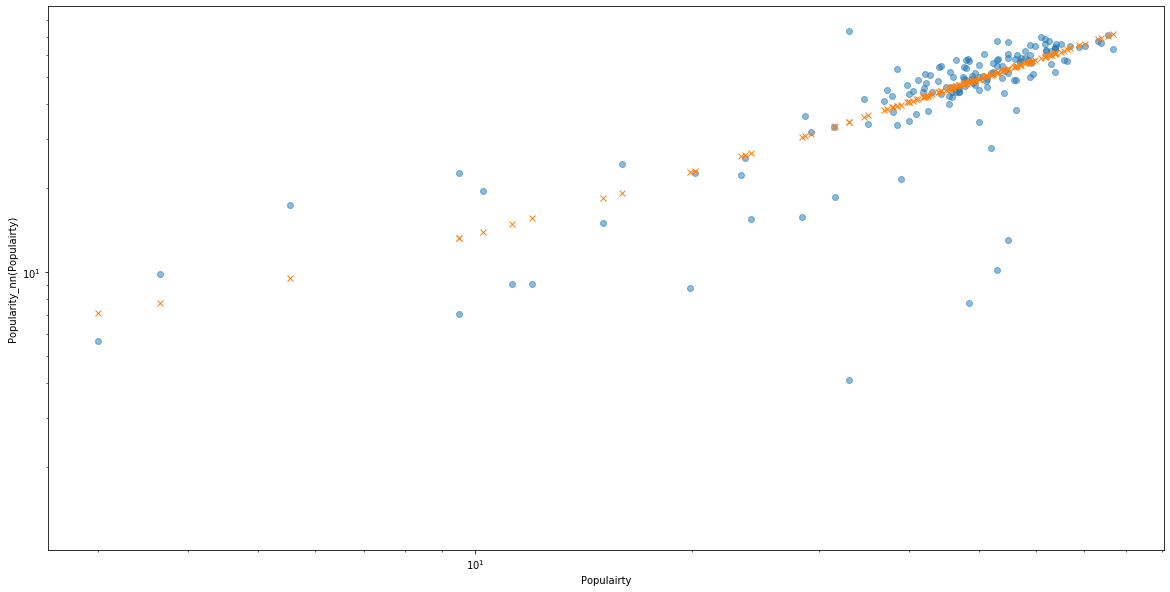

Correlation exponent and intercept:  -0.0011147833970510386 0.9585320959158983 4.252660065470811


In [30]:
print('Popularity correaltion among male artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,male_artists,male_artists)

print('Popularity correaltion among female artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,female_artists,female_artists)

print('Popularity correaltion among androgynous artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,androgynous_artists,androgynous_artists)

print('Popularity correaltion between male and female artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,male_artists,female_artists)

print('Popularity correaltion between female and male artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,female_artists,male_artists)

print('Popularity correaltion between male and androgynous artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,male_artists,androgynous_artists)

print('Popularity correaltion between androgynous and male artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,androgynous_artists,male_artists)

print('Popularity correaltion between female and androgynous artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,female_artists,androgynous_artists)

print('Popularity correaltion between androgynous and female artists')
populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,androgynous_artists,female_artists)

# Assortativity in genre

In [31]:
# distinct_genres = list(set(artist_w_genre_gender_race_in_net['filtered_genre'].tolist()))
distinct_genres = ['Metal','Jazz','Pop','Country','Indie','Oldies','EDM','Classical','Rock','Hip-hop','Rap','R&B']
print('Distinct genres in dataset: ', distinct_genres)

Distinct genres in dataset:  ['Metal', 'Jazz', 'Pop', 'Country', 'Indie', 'Oldies', 'EDM', 'Classical', 'Rock', 'Hip-hop', 'Rap', 'R&B']


In [34]:
metal_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Metal']['Id'].tolist()
jazz_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Jazz']['Id'].tolist()
pop_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Pop']['Id'].tolist()
country_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Country']['Id'].tolist()
indie_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Indie']['Id'].tolist()
oldies_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Oldies']['Id'].tolist()
edm_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='EDM']['Id'].tolist()
classical_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Classical']['Id'].tolist()
rock_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Rock']['Id'].tolist()
hiphop_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Hip-hop']['Id'].tolist()
rap_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='Rap']['Id'].tolist()
rnb_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['filtered_genre']=='R&B']['Id'].tolist()

In [35]:
all_genre_groups = [metal_artists,jazz_artists,pop_artists,country_artists,indie_artists,oldies_artists,edm_artists,classical_artists,rock_artists,hiphop_artists,rap_artists,rnb_artists]

In [36]:
genre_pairs_fractional_lisk_dict = dict()

for i, j in itertools.combinations(distinct_genres, 2):
    index_i = distinct_genres.index(i)
    index_j = distinct_genres.index(j)
    genre_pairs_fractional_lisk_dict[str(i)+'-'+str(j)] = fraction_links_node_groups(G,all_genre_groups[index_i],all_genre_groups[index_j])
    #genre_pairs.append(str(i)+'-'+str(j))
    #fraction_links.append(fraction_links_node_groups(G,all_genre_groups[index_i],all_genre_groups[index_j]))
    print('Fraction of possible links for genres: ',i,j,fraction_links_node_groups(G,all_genre_groups[index_i],all_genre_groups[index_j]))

Fraction of possible links for genres:  Metal Jazz 6.734460233012324e-05
Fraction of possible links for genres:  Metal Pop 0.0001438486711978998
Fraction of possible links for genres:  Metal Country 0.0005460349462365591
Fraction of possible links for genres:  Metal Indie 0.0002733734281027884
Fraction of possible links for genres:  Metal Oldies 0.0006863417982155113
Fraction of possible links for genres:  Metal EDM 0.0005456370858614518
Fraction of possible links for genres:  Metal Classical 6.033303837181241e-05
Fraction of possible links for genres:  Metal Rock 0.0008526360665056132
Fraction of possible links for genres:  Metal Hip-hop 0.0009695046712497797
Fraction of possible links for genres:  Metal Rap 0.00038533524166024444
Fraction of possible links for genres:  Metal R&B 0.0
Fraction of possible links for genres:  Jazz Pop 0.00015593616392381936
Fraction of possible links for genres:  Jazz Country 0.00013048016701461377
Fraction of possible links for genres:  Jazz Indie 4.953

In [37]:
genre_pairs_fractional_lisk_dict_sorted = dict(sorted(genre_pairs_fractional_lisk_dict.items(), reverse=True, key=lambda item: item[1]))

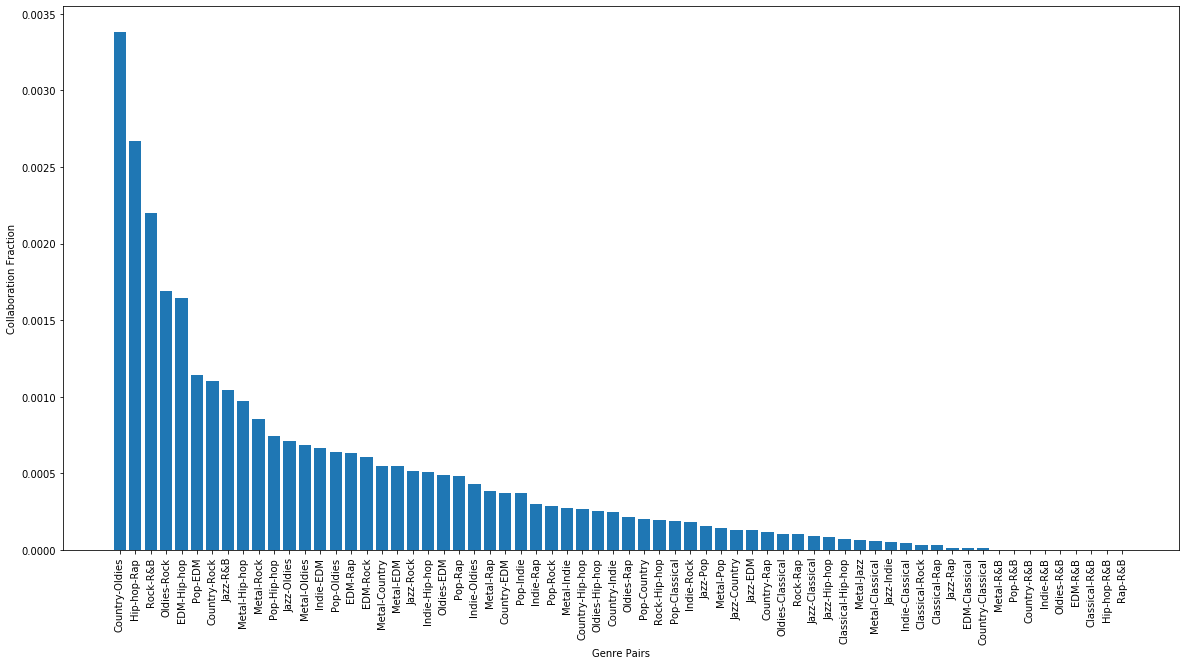

In [38]:
plt.figure(figsize=(20,10))
plt.bar(list(genre_pairs_fractional_lisk_dict_sorted.keys()), list(genre_pairs_fractional_lisk_dict_sorted.values()))
plt.xticks(rotation='vertical')
plt.ylabel('Collaboration Fraction')
plt.xlabel('Genre Pairs')
plt.show()

Degree correlation between genre groups:  Metal Jazz


C:\Users\Ayan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


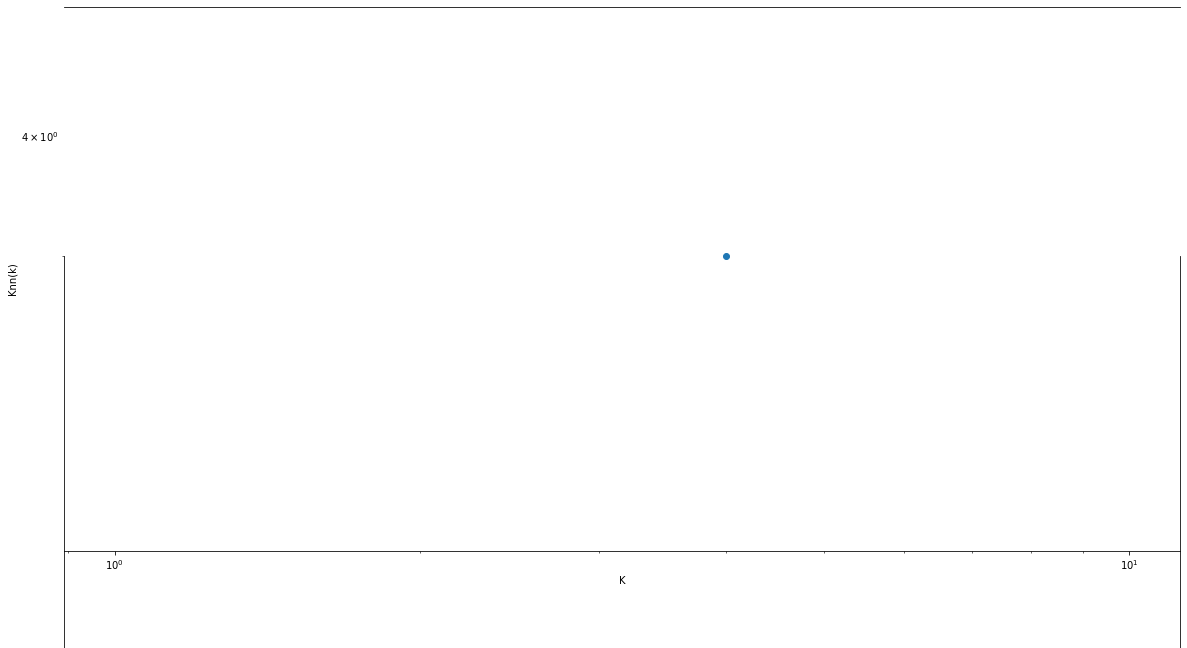

Correlation exponent and intercept:  0.4999999999999997 0.30102999566398114
Degree correlation between genre groups:  Metal Pop


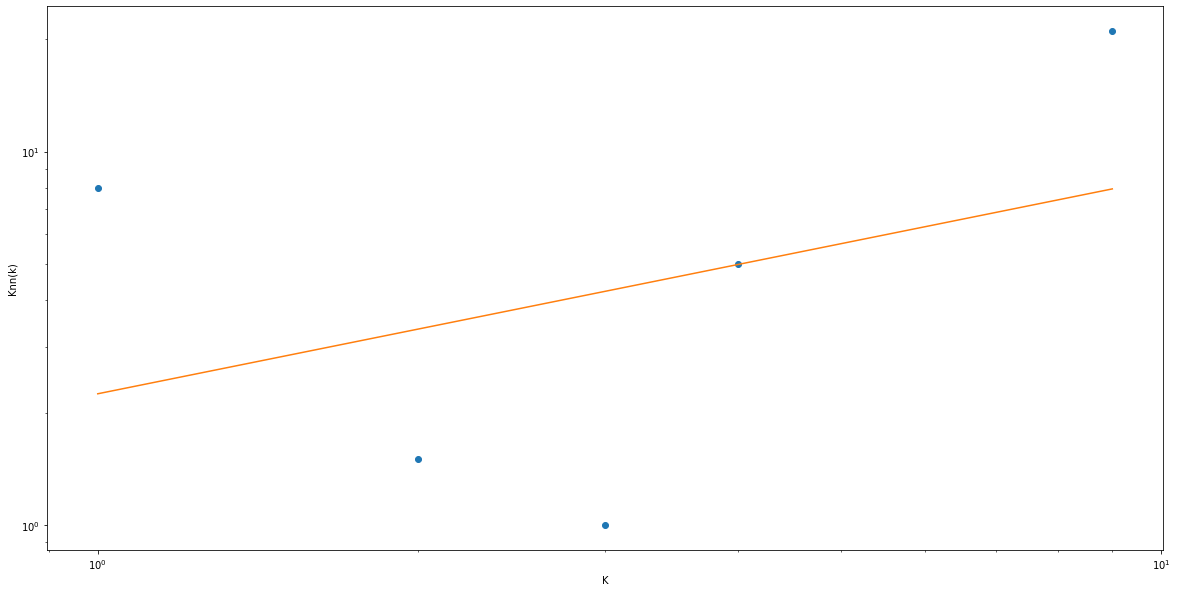

Correlation exponent and intercept:  0.574438392141128 0.35187413715571936
Degree correlation between genre groups:  Metal Country


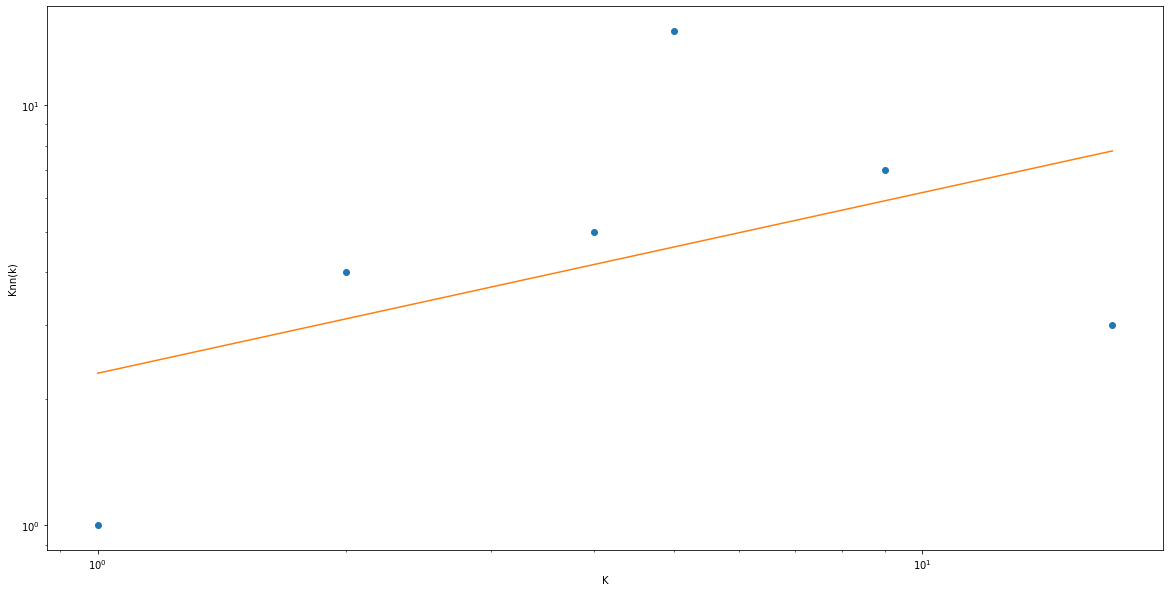

Correlation exponent and intercept:  0.4299340323917082 0.3618812068109176
Degree correlation between genre groups:  Metal Indie


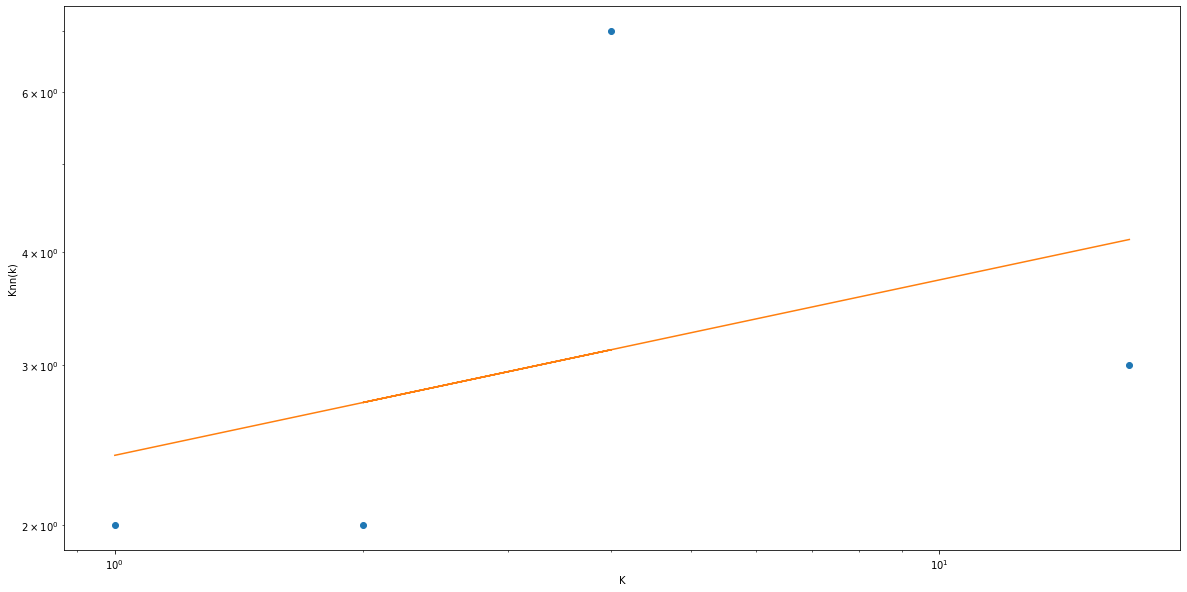

Correlation exponent and intercept:  0.19311348832328754 0.3780660362482625
Degree correlation between genre groups:  Metal Oldies


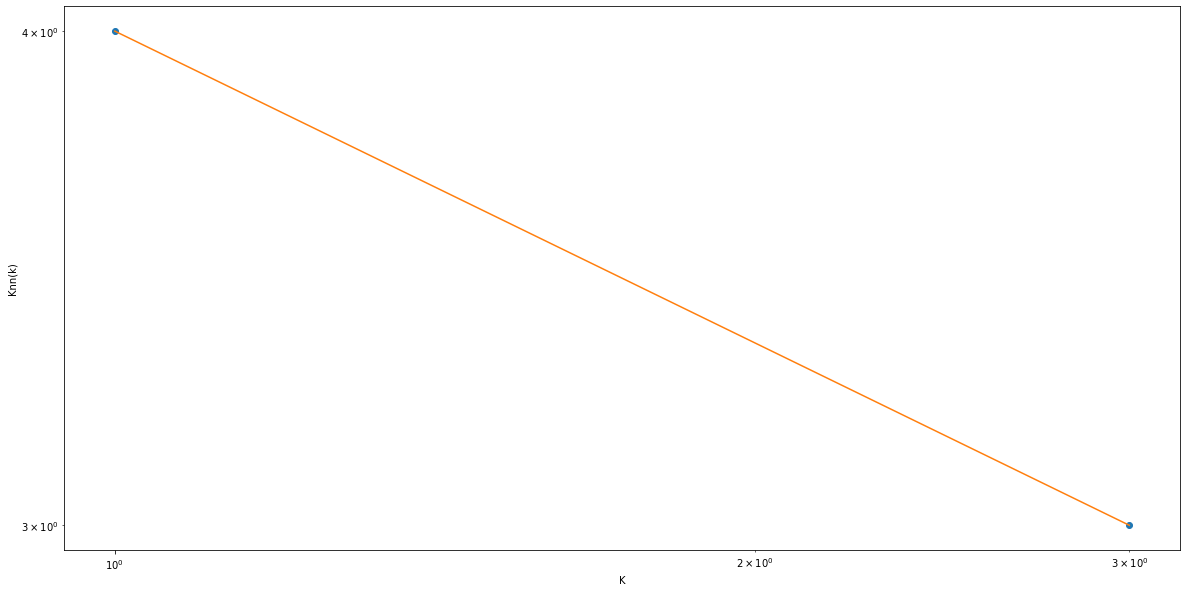

Correlation exponent and intercept:  -0.261859507142915 0.6020599913279624
Degree correlation between genre groups:  Metal EDM


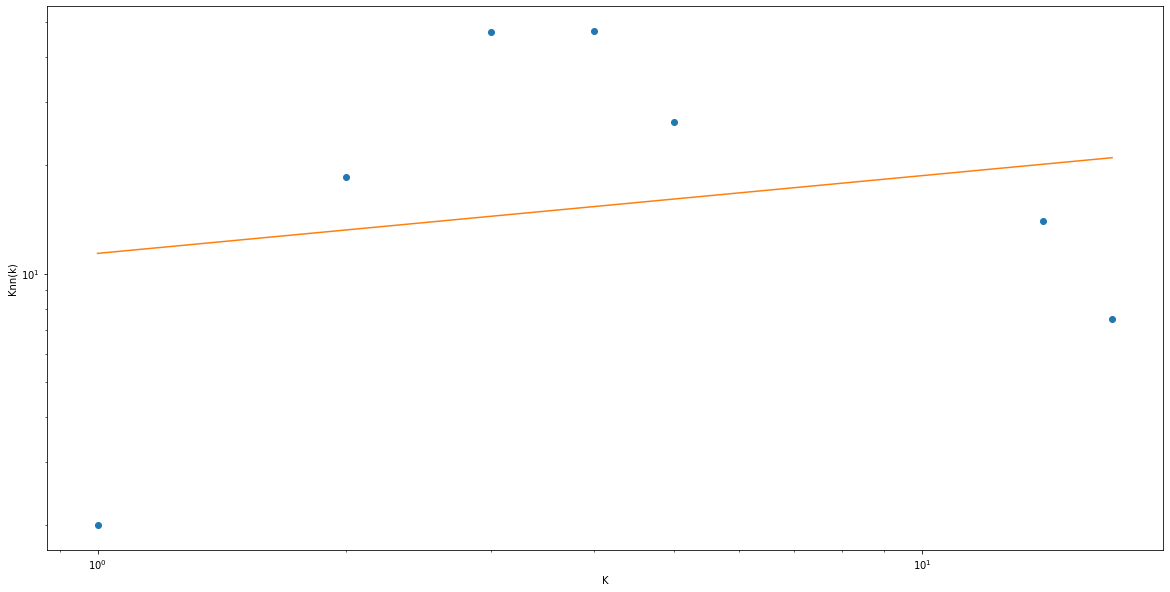

Correlation exponent and intercept:  0.21609985497330605 1.0566511154140519
Degree correlation between genre groups:  Metal Classical


C:\Users\Ayan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


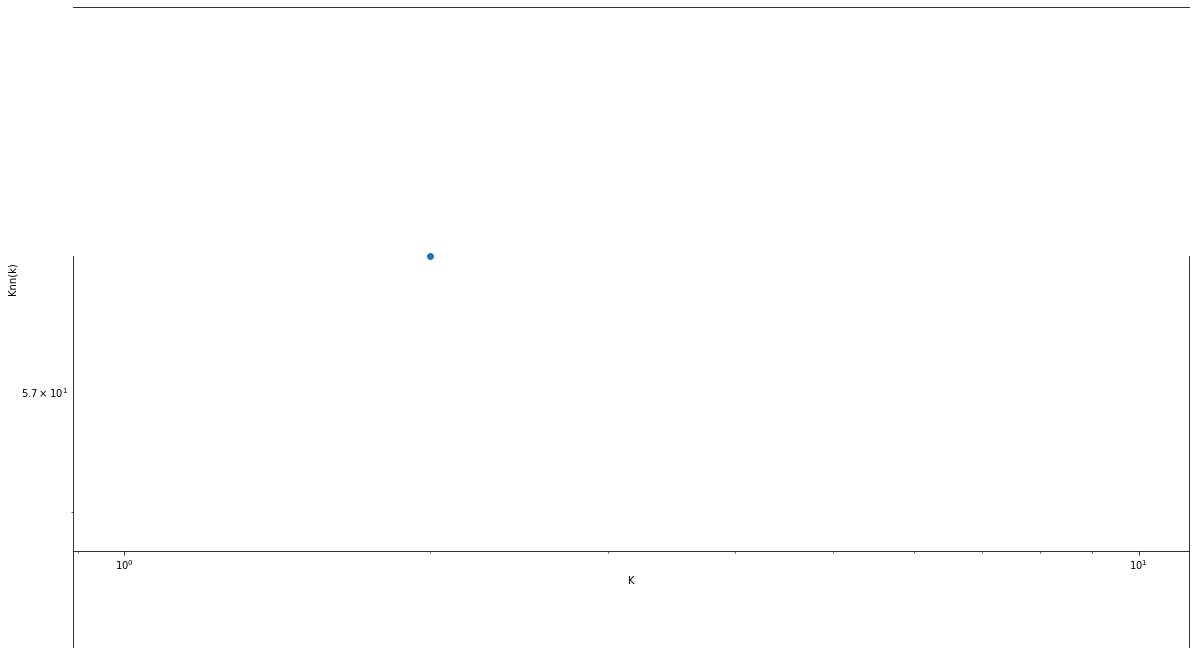

Correlation exponent and intercept:  2.9164450070823693 0.8779374278362455
Degree correlation between genre groups:  Metal Rock


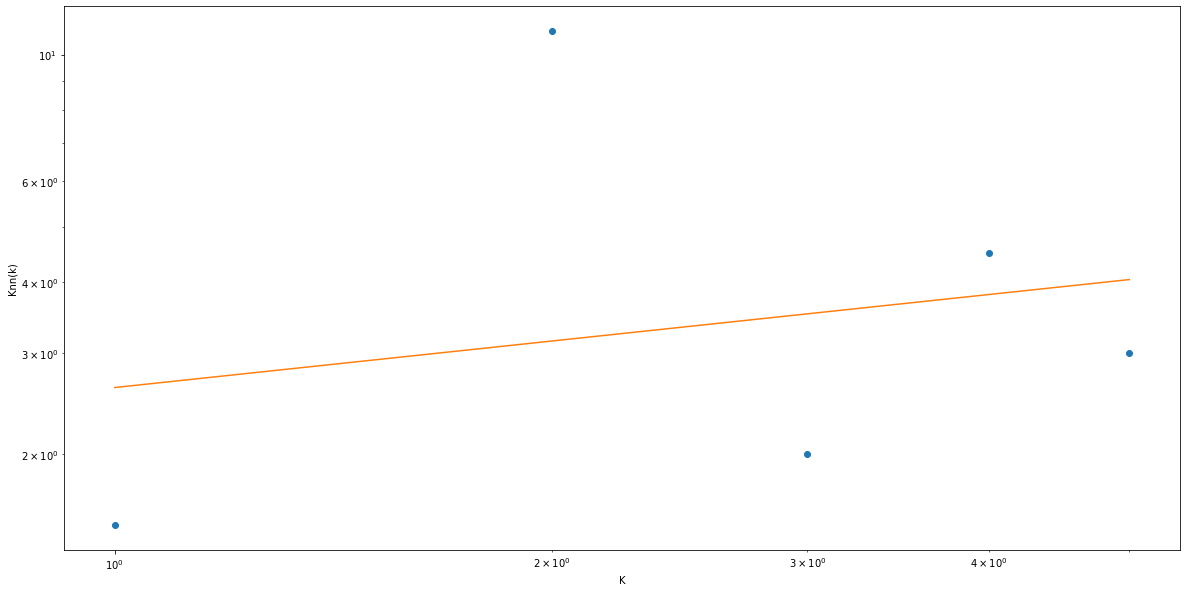

Correlation exponent and intercept:  0.2704229817834624 0.41731786322968817
Degree correlation between genre groups:  Metal Hip-hop


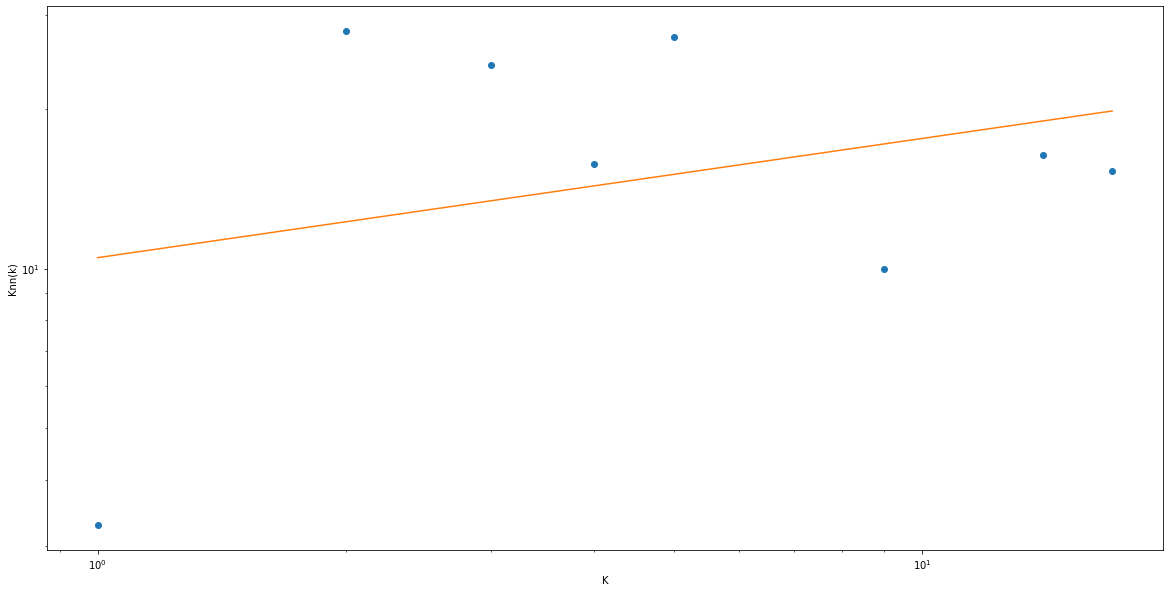

Correlation exponent and intercept:  0.22447534117150109 1.0205538824148526
Degree correlation between genre groups:  Metal Rap


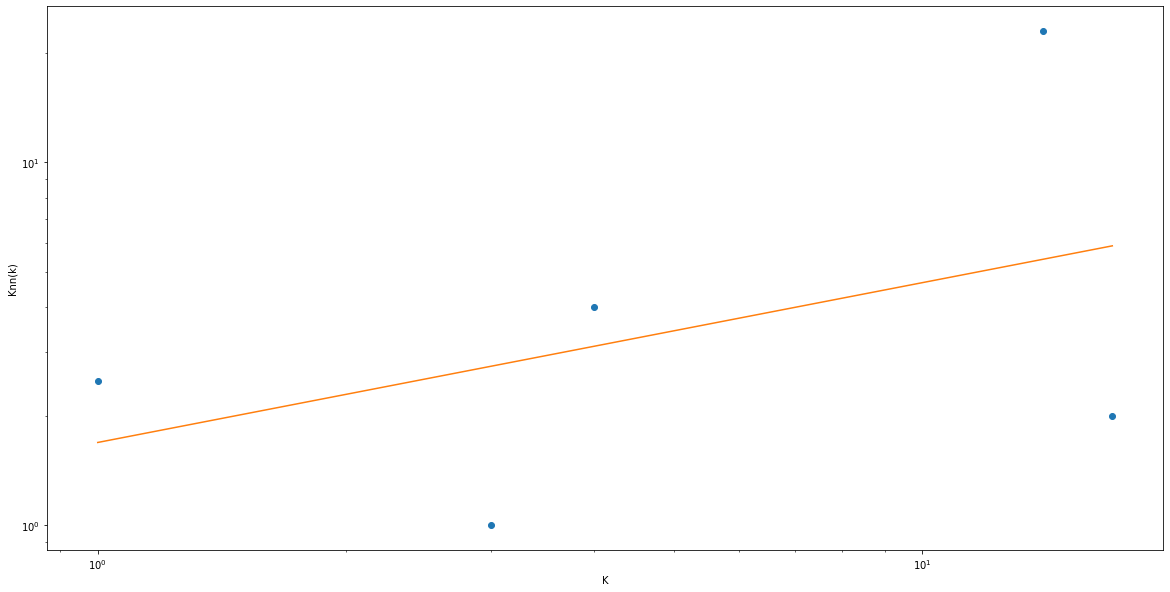

Correlation exponent and intercept:  0.44032954476290703 0.22821707905960978
Degree correlation between genre groups:  Metal R&B
No collaboration found
Degree correlation between genre groups:  Jazz Pop


<Figure size 1440x720 with 0 Axes>

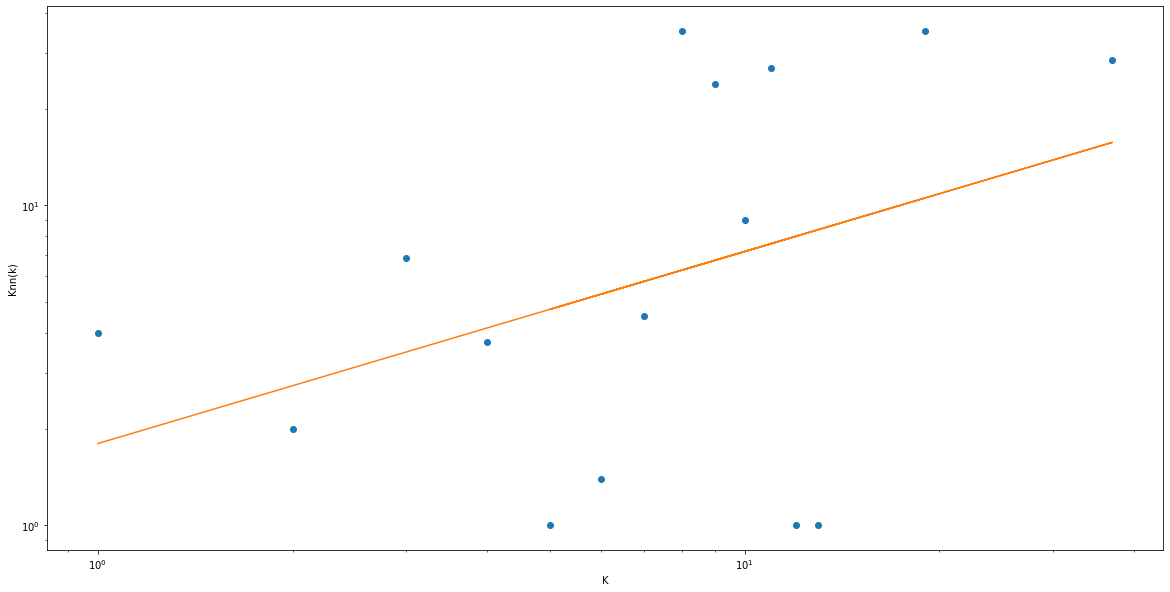

Correlation exponent and intercept:  0.6000637391446224 0.25538043972741886
Degree correlation between genre groups:  Jazz Country


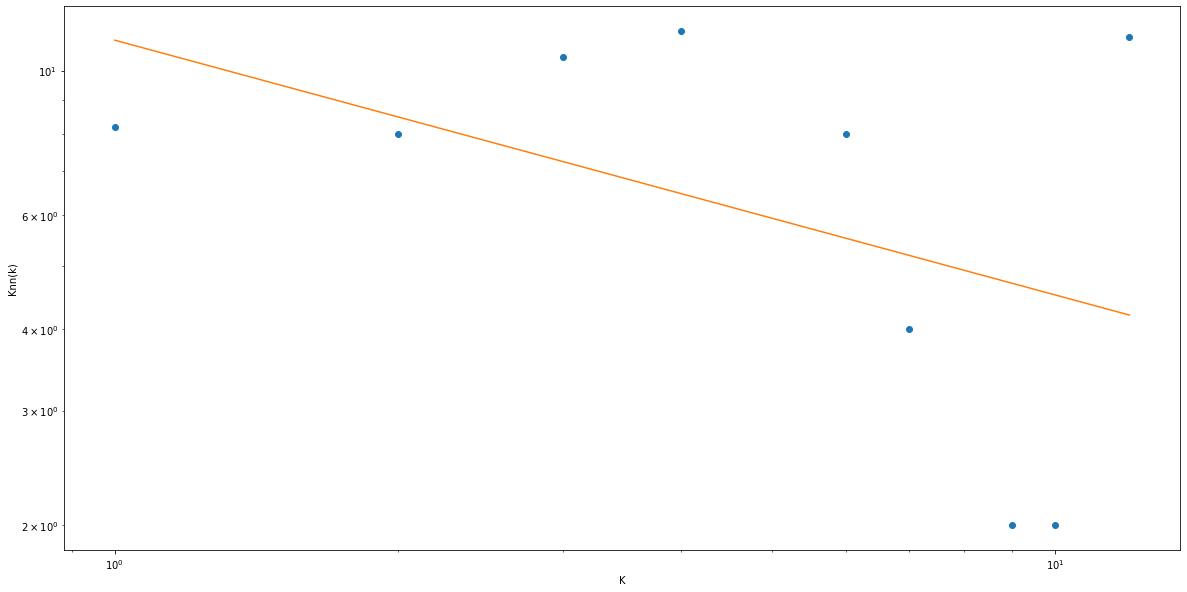

Correlation exponent and intercept:  -0.39148094462367006 1.0467198482651676
Degree correlation between genre groups:  Jazz Indie


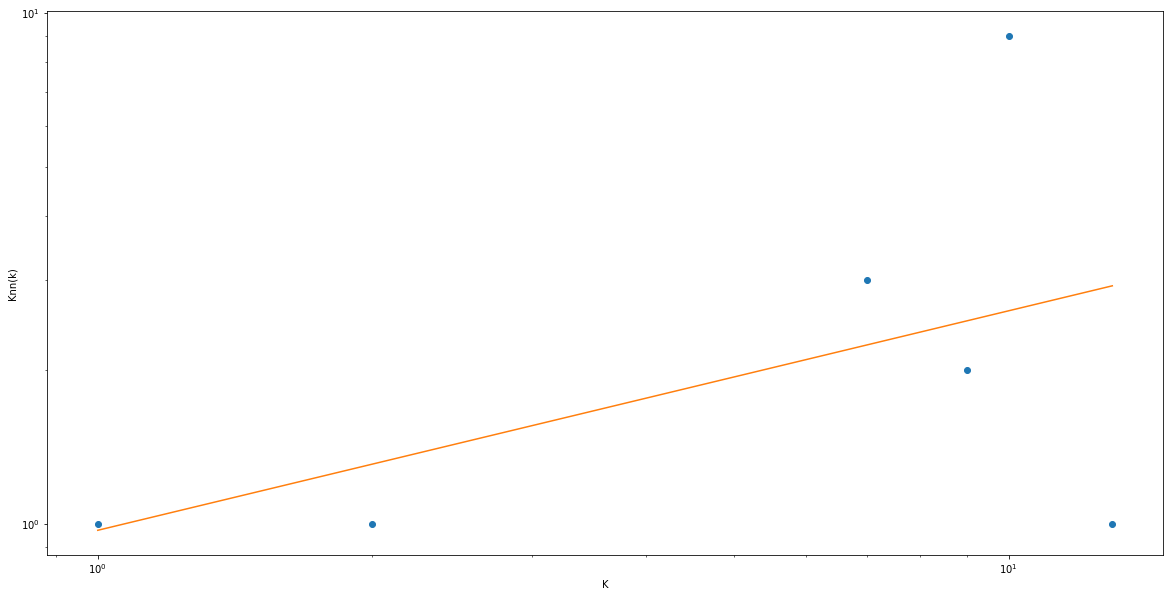

Correlation exponent and intercept:  0.4295426786441103 -0.012972320053968034
Degree correlation between genre groups:  Jazz Oldies


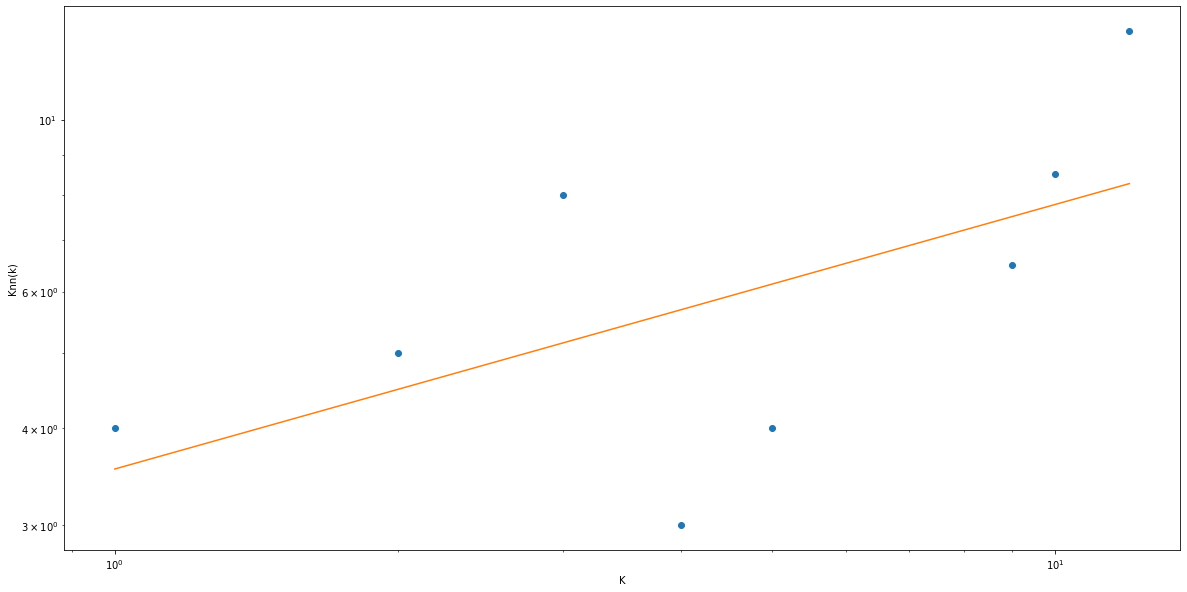

Correlation exponent and intercept:  0.3407805674165907 0.5496625537459604
Degree correlation between genre groups:  Jazz EDM


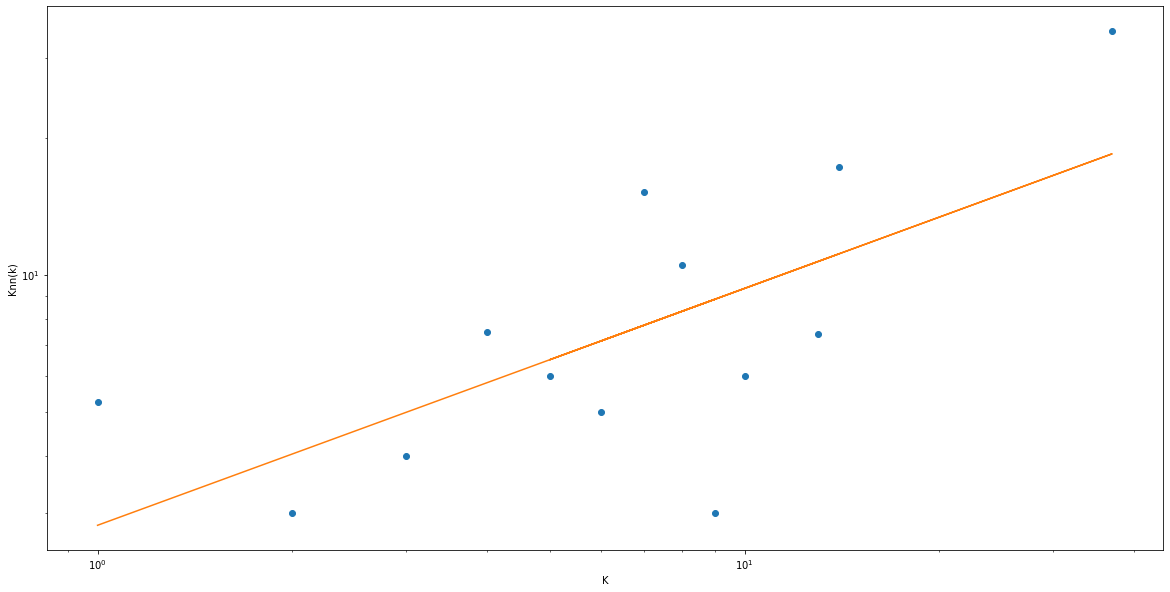

Correlation exponent and intercept:  0.5202130587522336 0.44976270830953474
Degree correlation between genre groups:  Jazz Classical


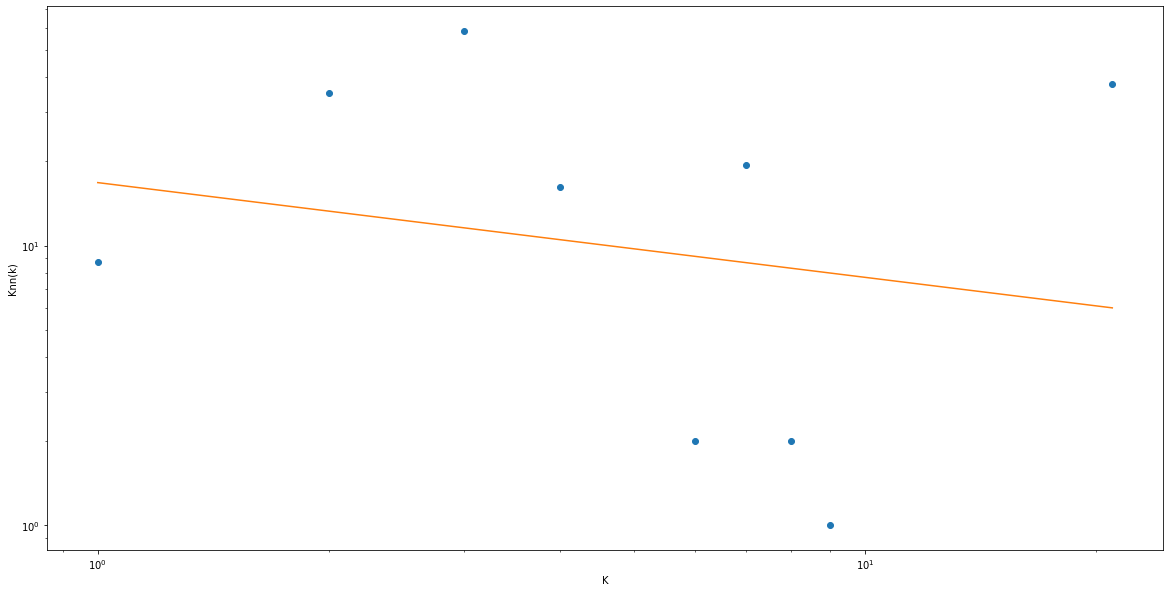

Correlation exponent and intercept:  -0.33876219013984094 1.2254175629272563
Degree correlation between genre groups:  Jazz Rock


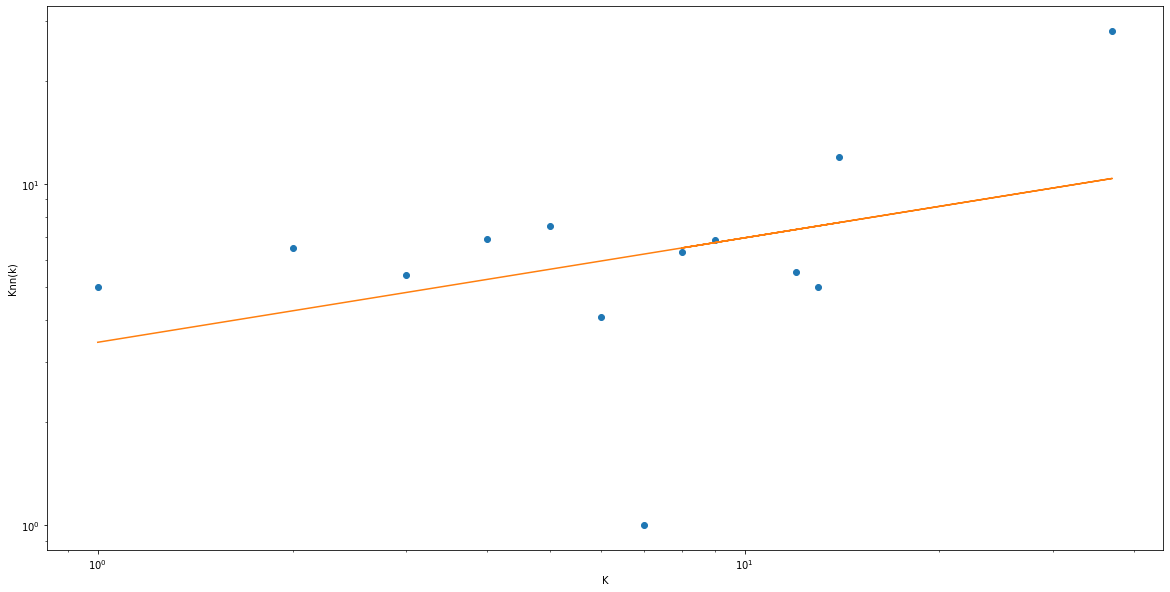

Correlation exponent and intercept:  0.30596434706920245 0.5359205776772752
Degree correlation between genre groups:  Jazz Hip-hop


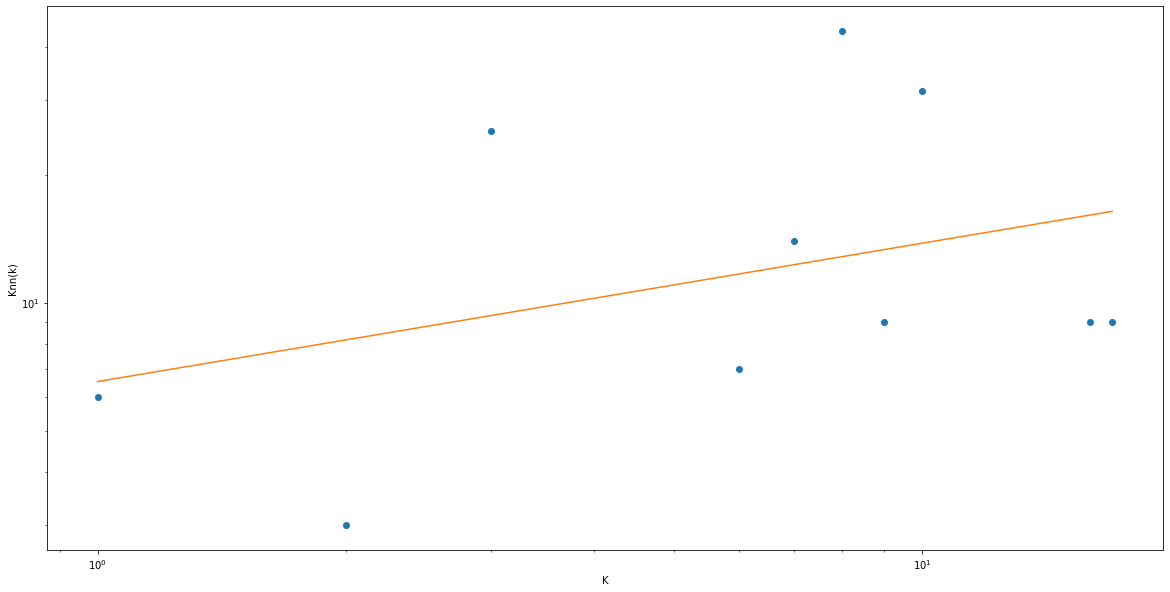

Correlation exponent and intercept:  0.32509860166432125 0.8148636554138328
Degree correlation between genre groups:  Jazz Rap


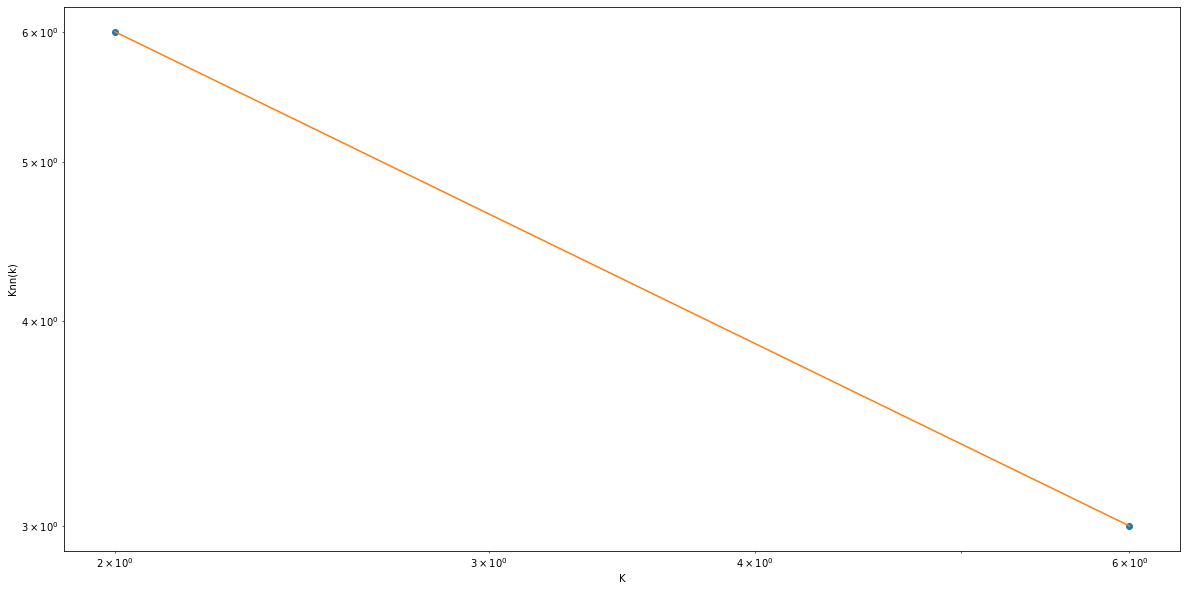

Correlation exponent and intercept:  -0.6309297535714578 0.9680800313655367
Degree correlation between genre groups:  Jazz R&B
No collaboration found
Degree correlation between genre groups:  Pop Country


C:\Users\Ayan\anaconda3\lib\site-packages\numpy\lib\polynomial.py:630: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


<Figure size 1440x720 with 0 Axes>

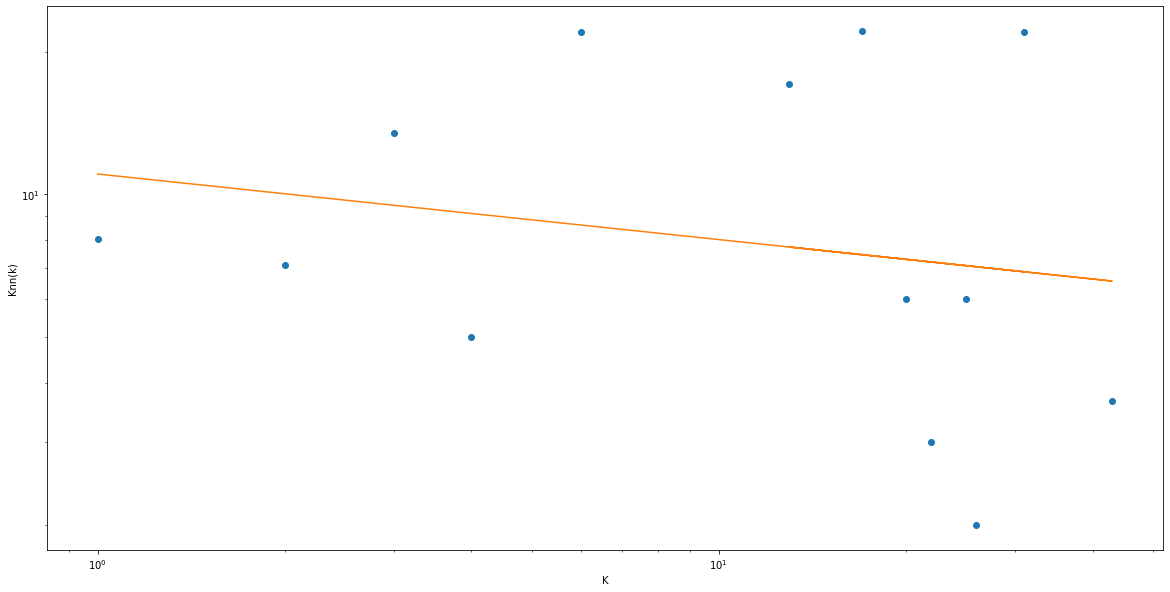

Correlation exponent and intercept:  -0.13846744452387727 1.043155317901089
Degree correlation between genre groups:  Pop Indie


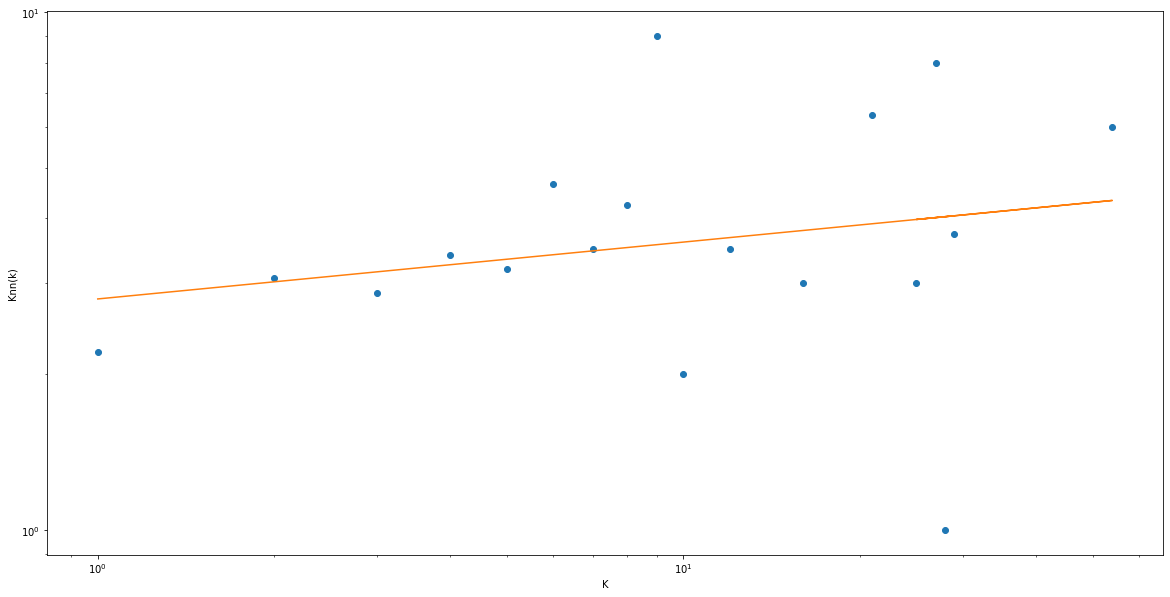

Correlation exponent and intercept:  0.10979325753131114 0.44671173773338785
Degree correlation between genre groups:  Pop Oldies


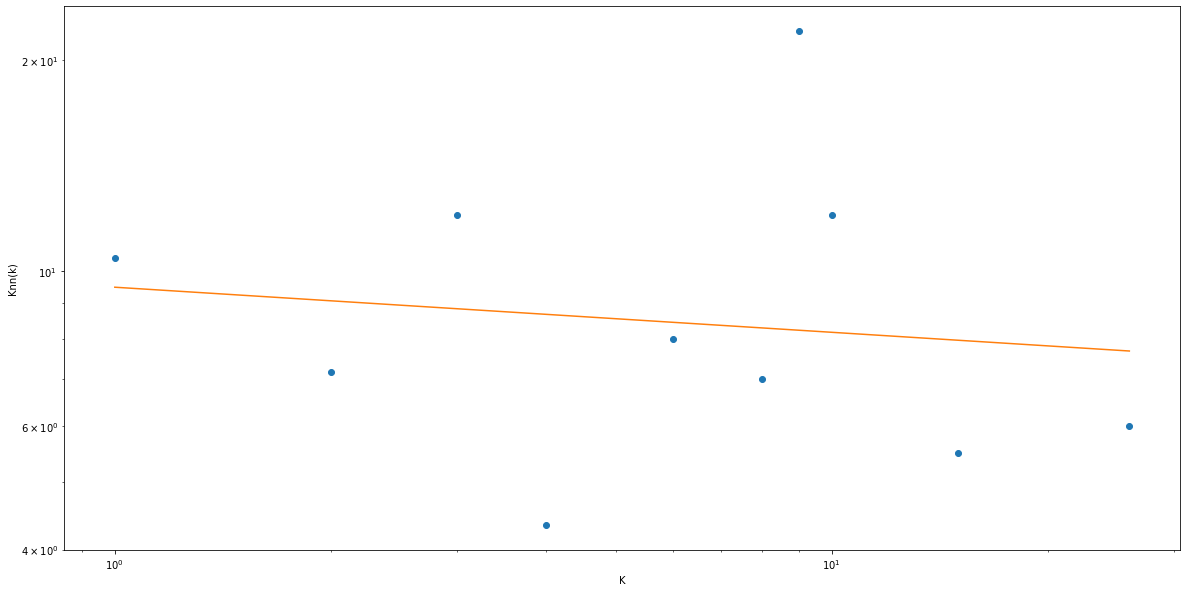

Correlation exponent and intercept:  -0.06437676947450499 0.9767549871621755
Degree correlation between genre groups:  Pop EDM


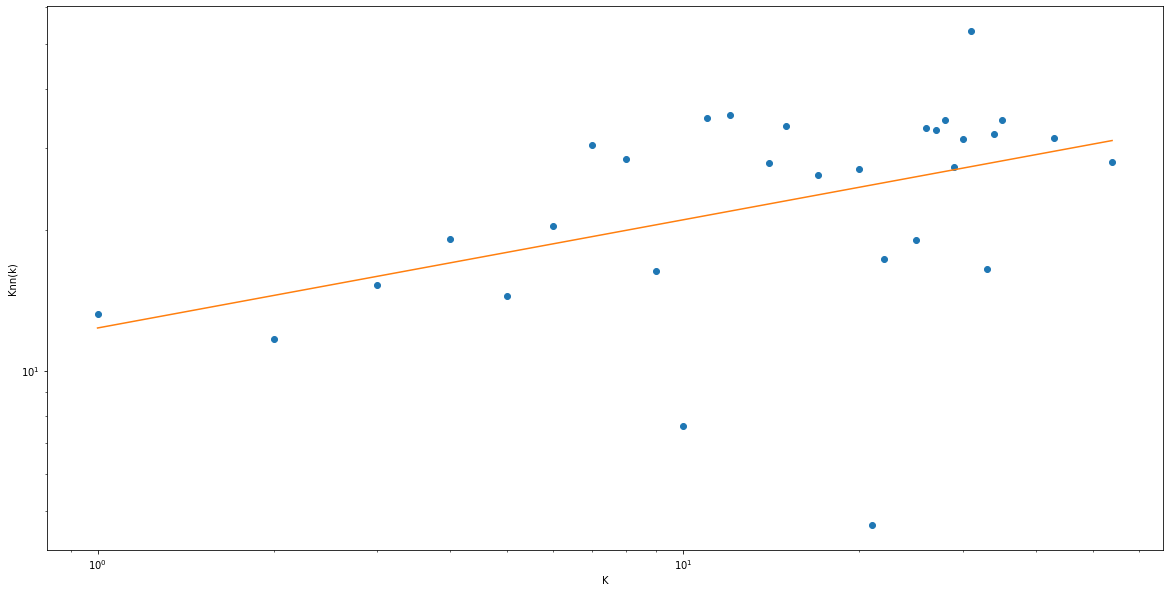

Correlation exponent and intercept:  0.231474993779567 1.0910936679059389
Degree correlation between genre groups:  Pop Classical


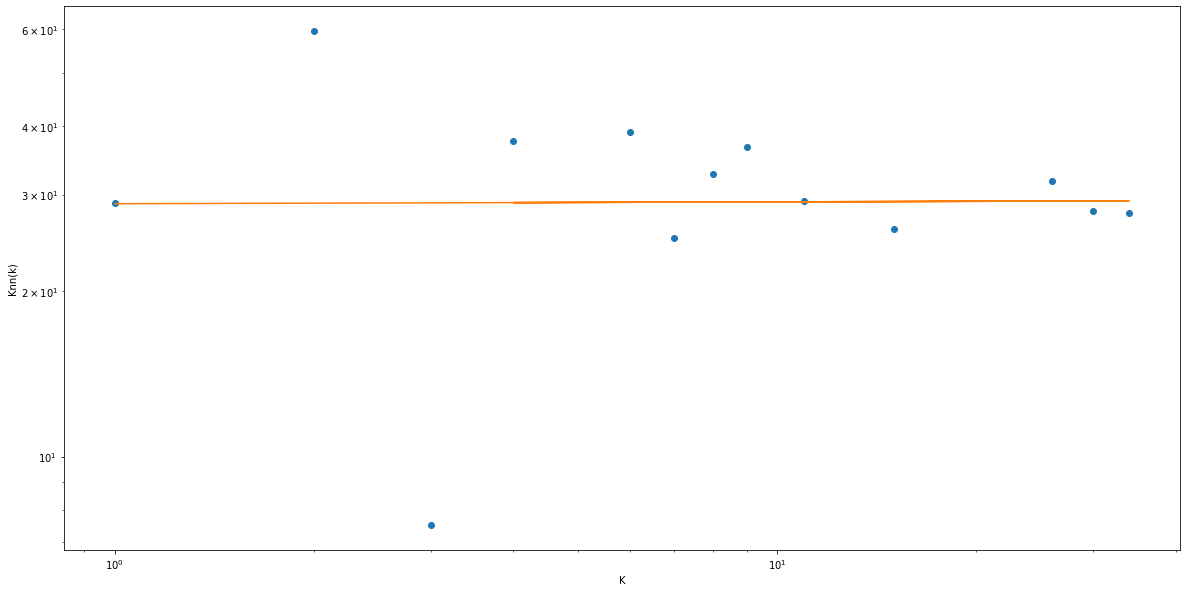

Correlation exponent and intercept:  0.0033698027355870907 1.4606135132598252
Degree correlation between genre groups:  Pop Rock


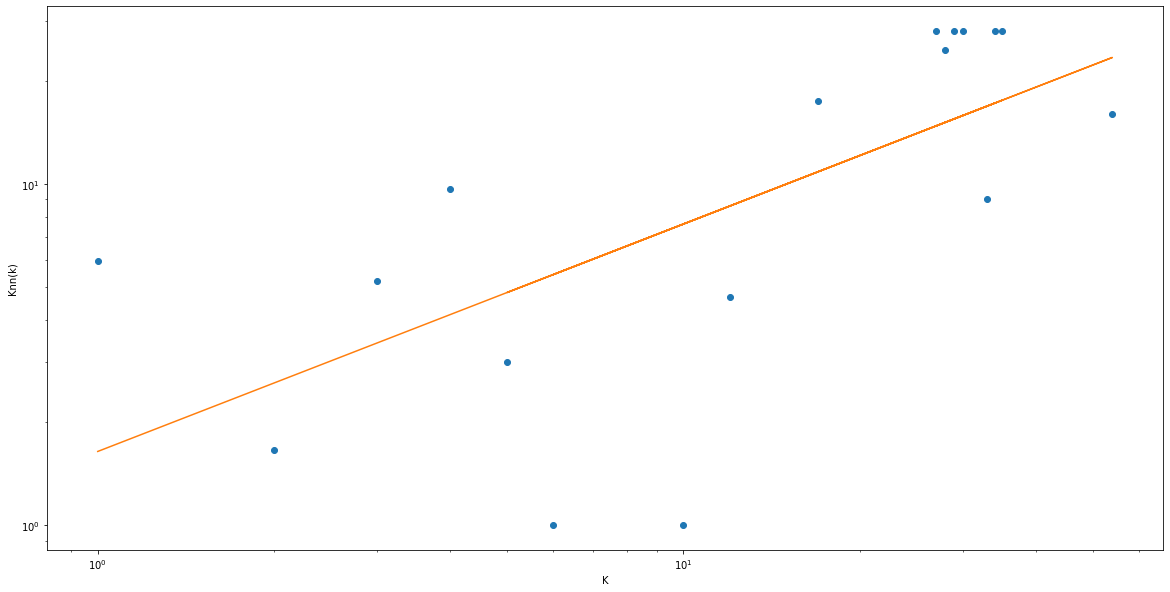

Correlation exponent and intercept:  0.6659354547541183 0.21624246016205276
Degree correlation between genre groups:  Pop Hip-hop


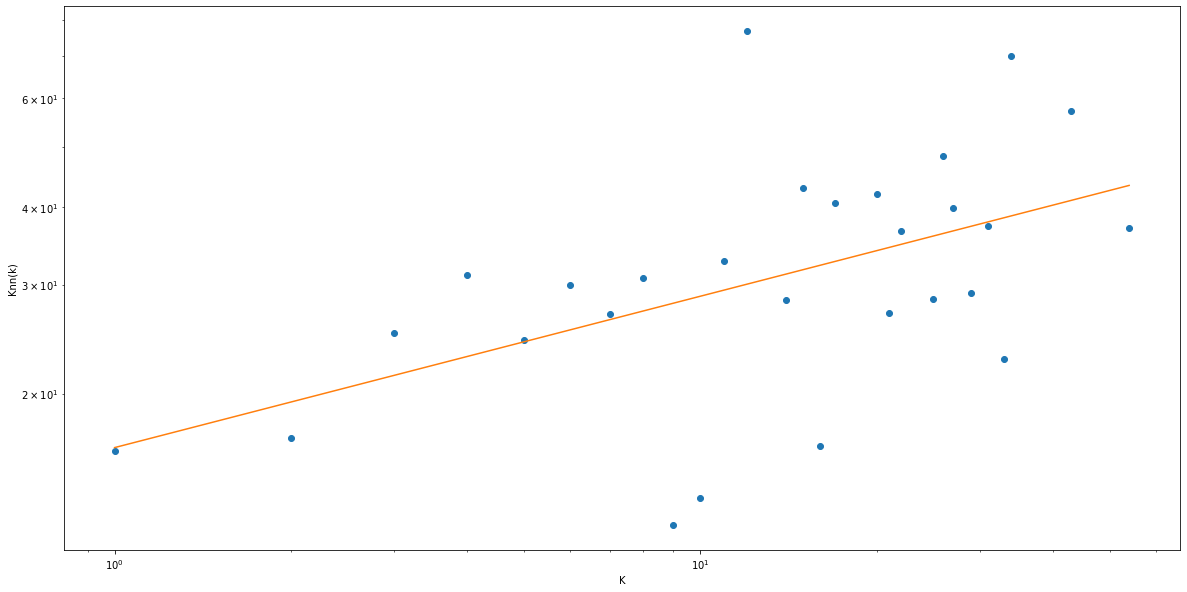

Correlation exponent and intercept:  0.24403686836178817 1.2141789213883423
Degree correlation between genre groups:  Pop Rap


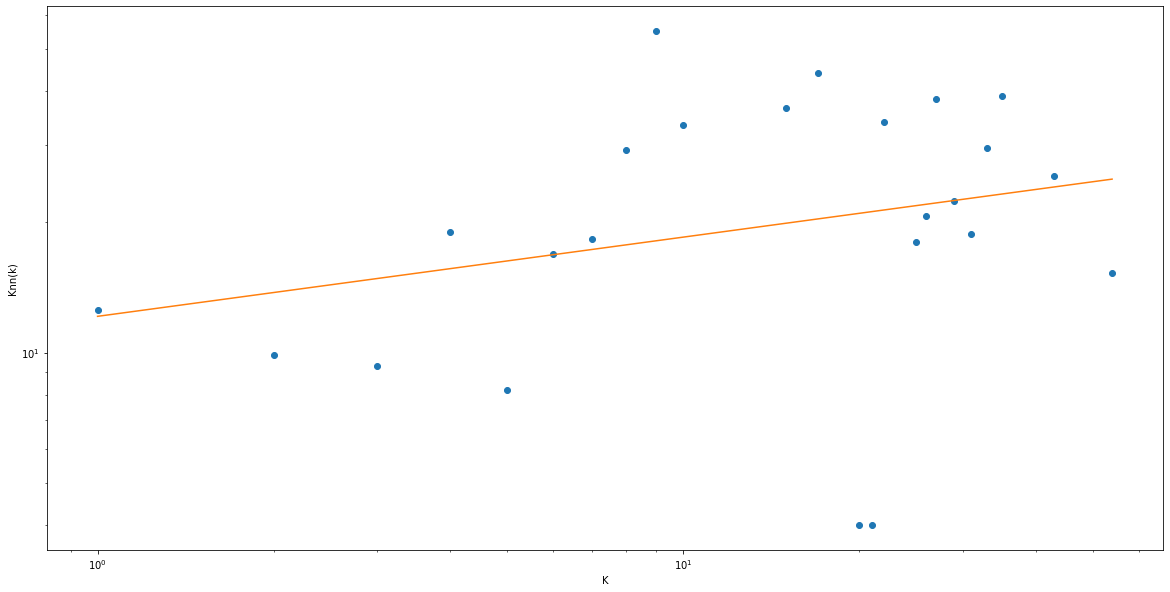

Correlation exponent and intercept:  0.18243524123166308 1.0833650780599346
Degree correlation between genre groups:  Pop R&B
No collaboration found
Degree correlation between genre groups:  Country Indie


<Figure size 1440x720 with 0 Axes>

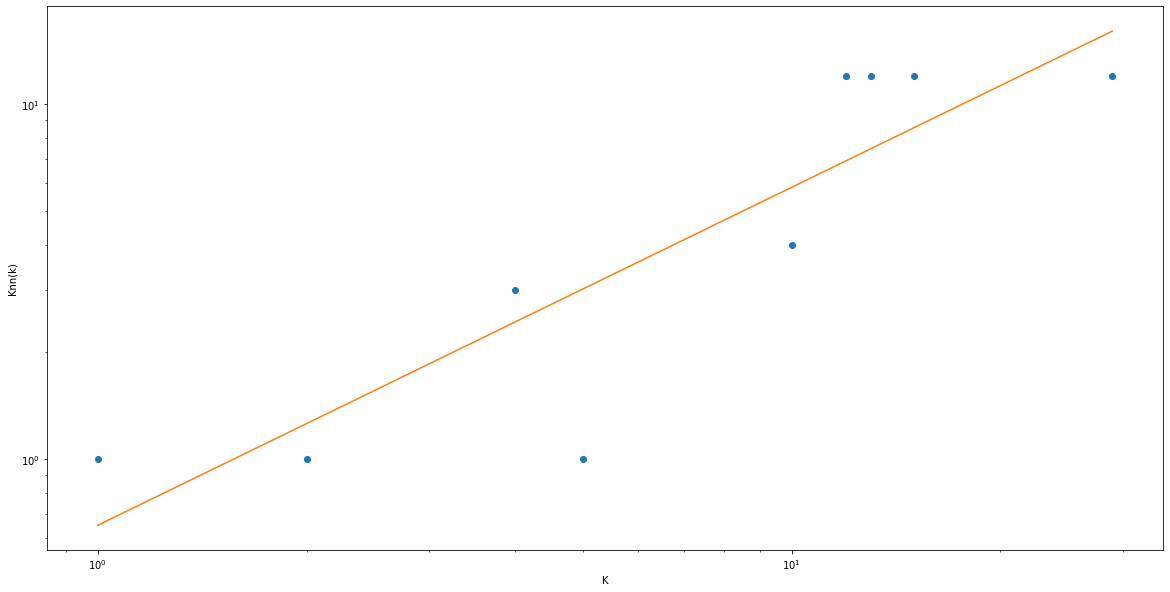

Correlation exponent and intercept:  0.9523831511018479 -0.1870888324539414
Degree correlation between genre groups:  Country Oldies


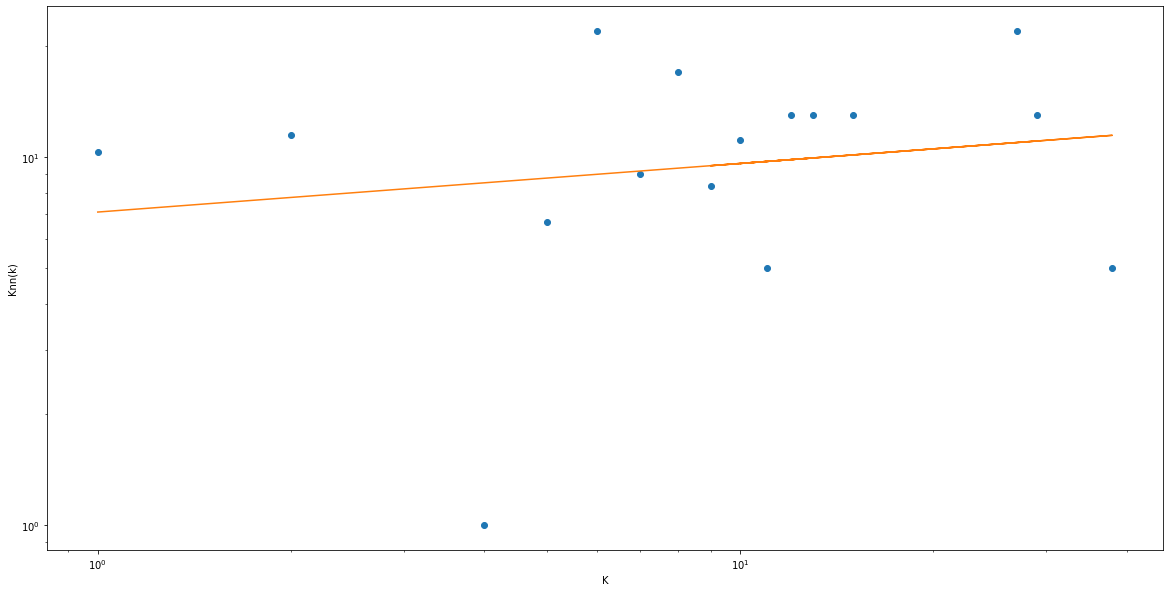

Correlation exponent and intercept:  0.13195916570619248 0.8508881333269114
Degree correlation between genre groups:  Country EDM


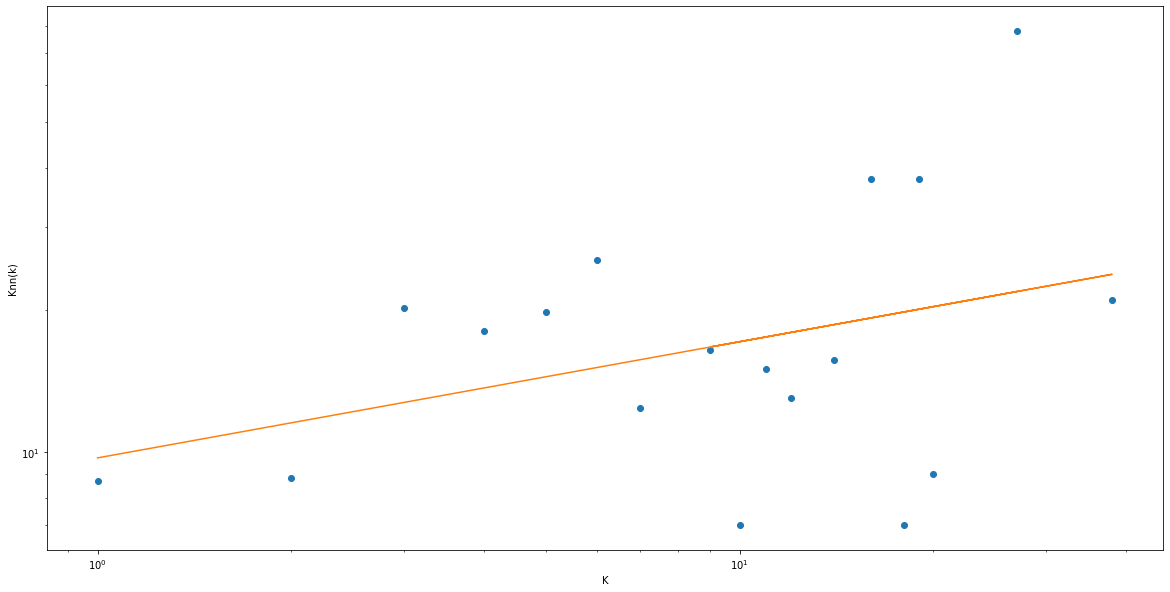

Correlation exponent and intercept:  0.24619372666065698 0.9879152044510844
Degree correlation between genre groups:  Country Classical


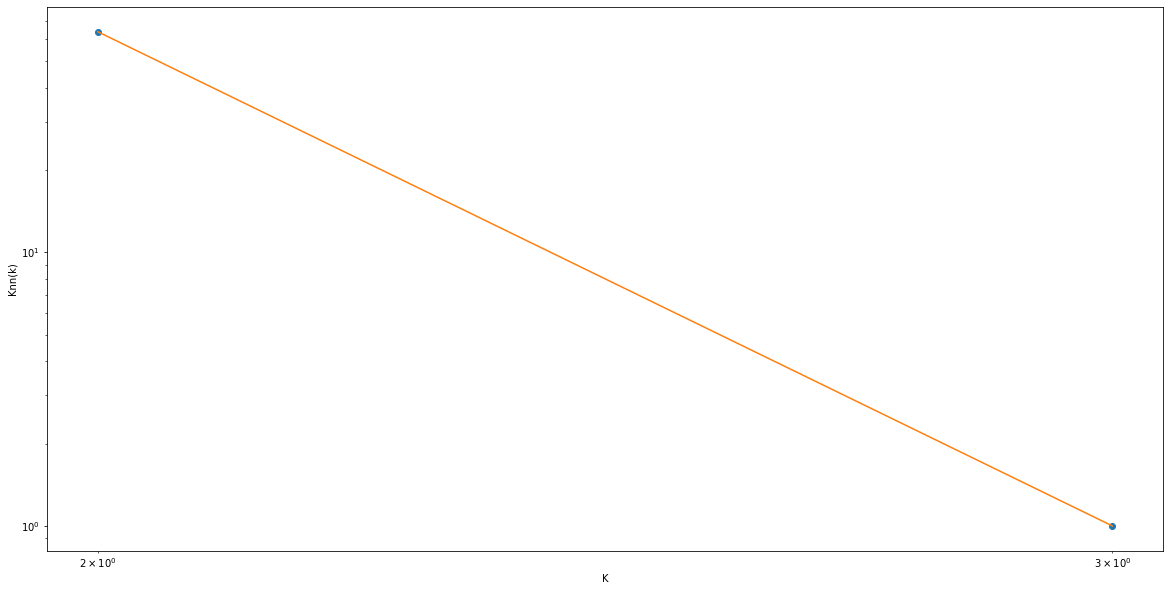

Correlation exponent and intercept:  -10.257067748108723 4.893865033722213
Degree correlation between genre groups:  Country Rock


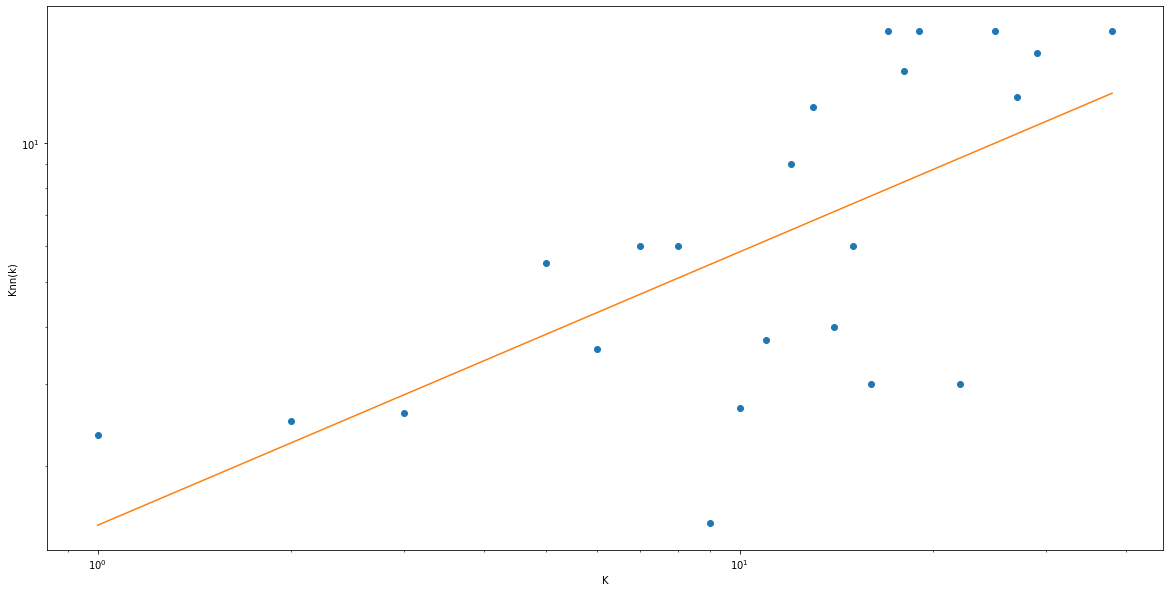

Correlation exponent and intercept:  0.5928654842414947 0.17173841789666597
Degree correlation between genre groups:  Country Hip-hop


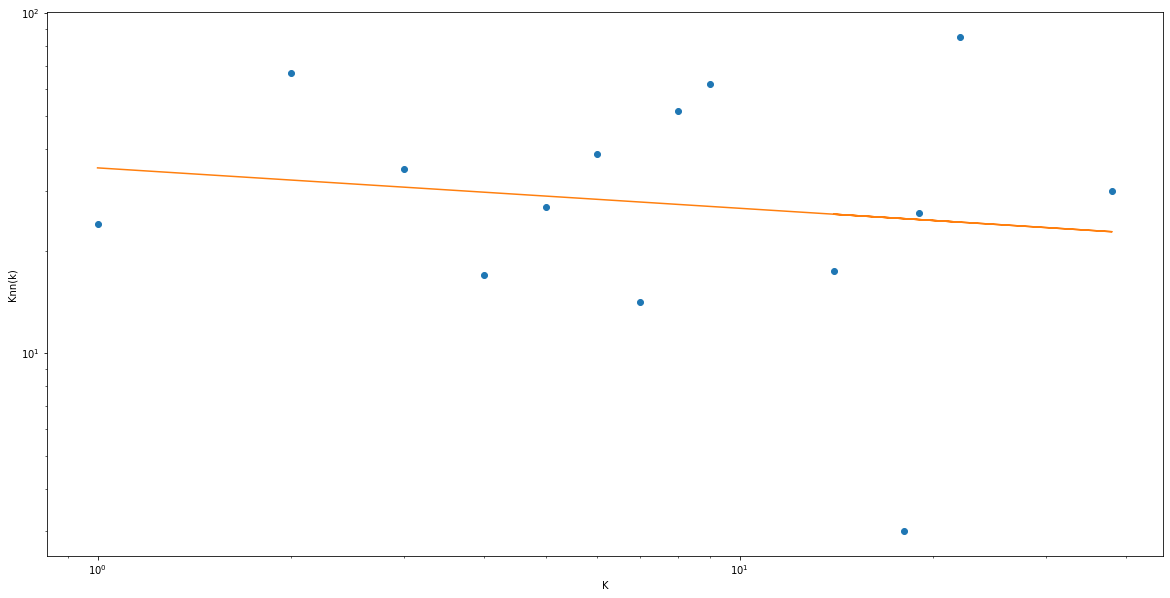

Correlation exponent and intercept:  -0.1187760704961443 1.5451230670728795
Degree correlation between genre groups:  Country Rap


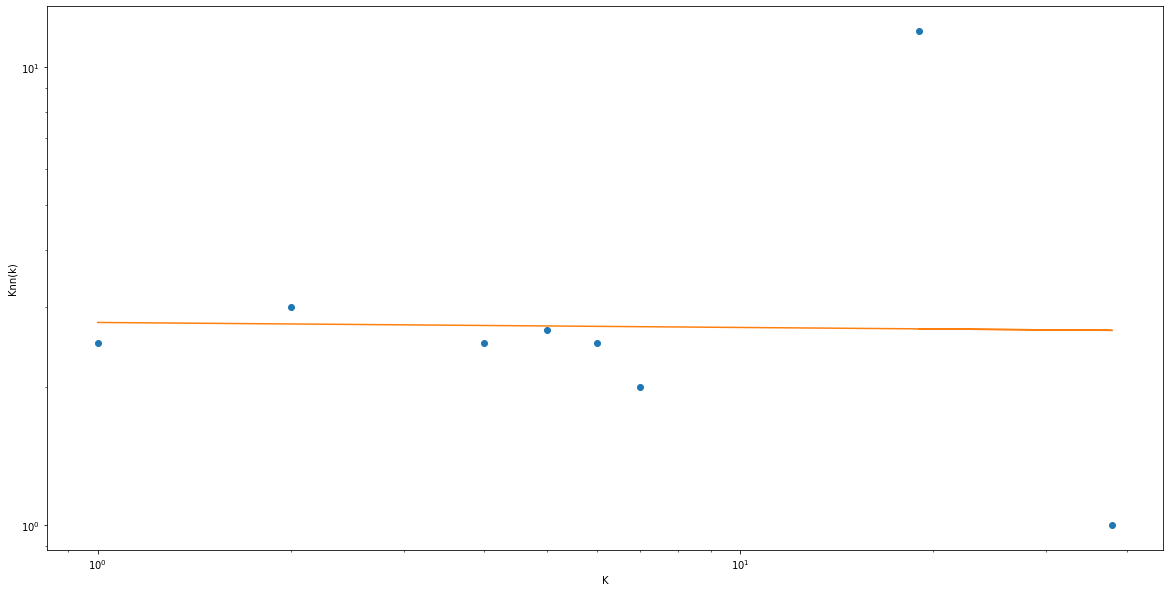

Correlation exponent and intercept:  -0.01091317767327533 0.44293941903564304
Degree correlation between genre groups:  Country R&B
No collaboration found
Degree correlation between genre groups:  Indie Oldies


C:\Users\Ayan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


<Figure size 1440x720 with 0 Axes>

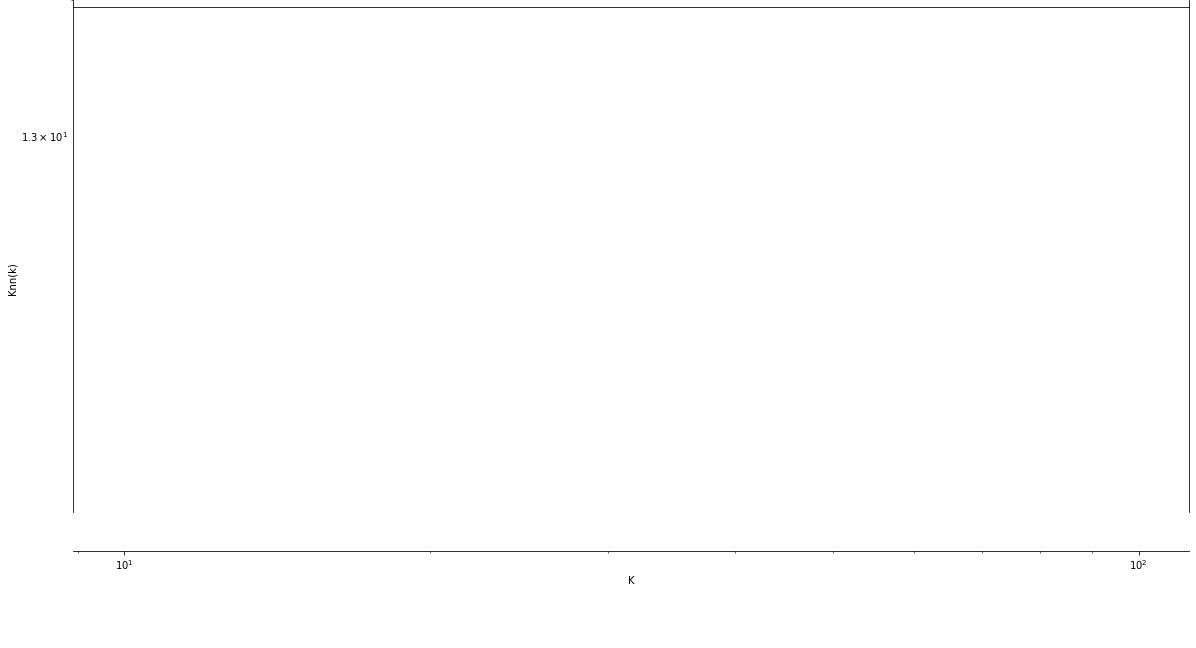

Correlation exponent and intercept:  0.5161057775913562 0.5569716761534182
Degree correlation between genre groups:  Indie EDM


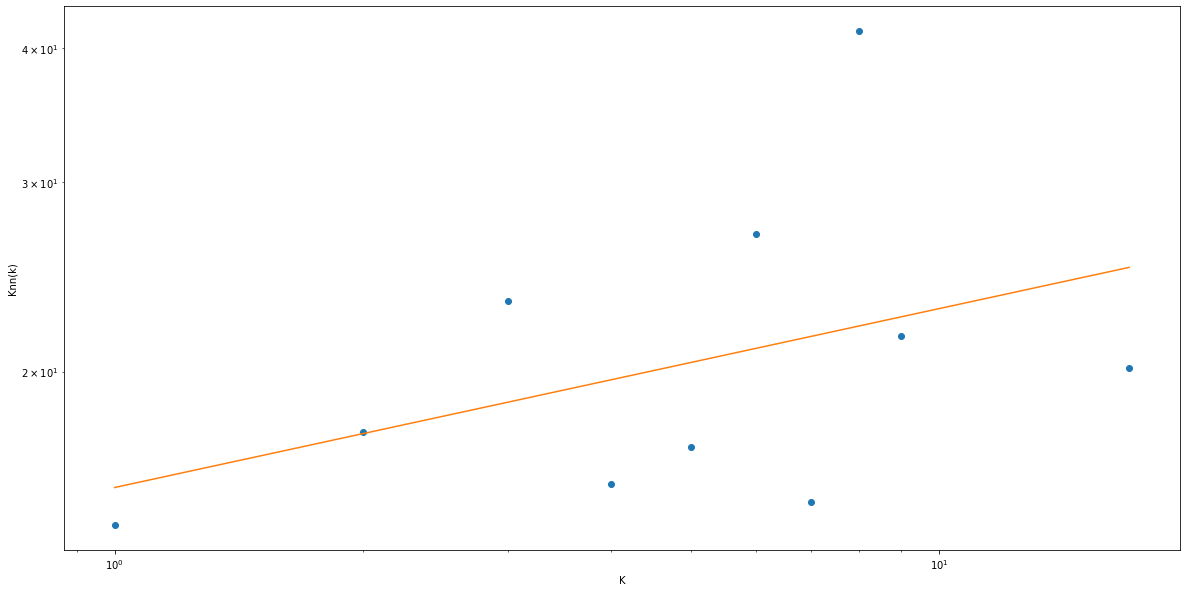

Correlation exponent and intercept:  0.16658747120551845 1.19306922509272
Degree correlation between genre groups:  Indie Classical


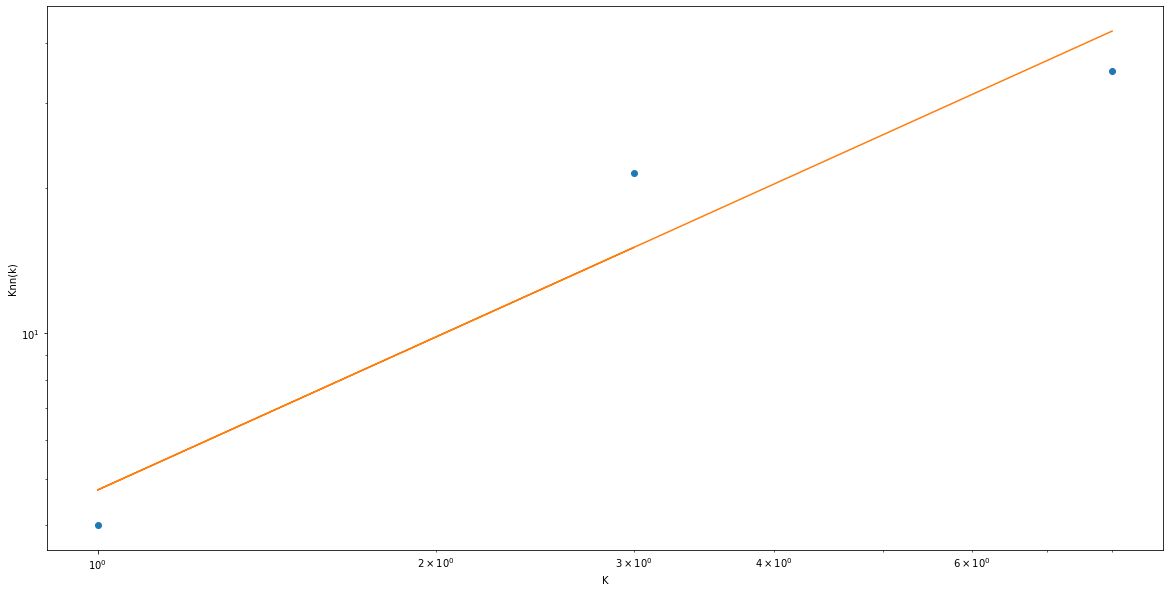

Correlation exponent and intercept:  1.0528137162641813 0.6751537229926158
Degree correlation between genre groups:  Indie Rock


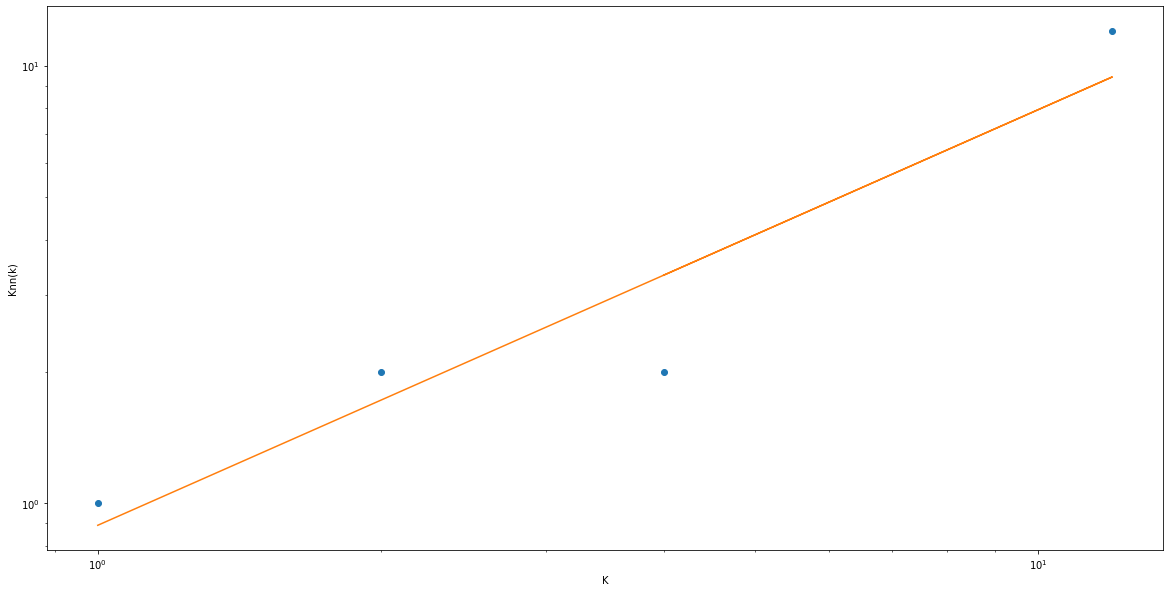

Correlation exponent and intercept:  0.949546003445777 -0.050254122425667125
Degree correlation between genre groups:  Indie Hip-hop


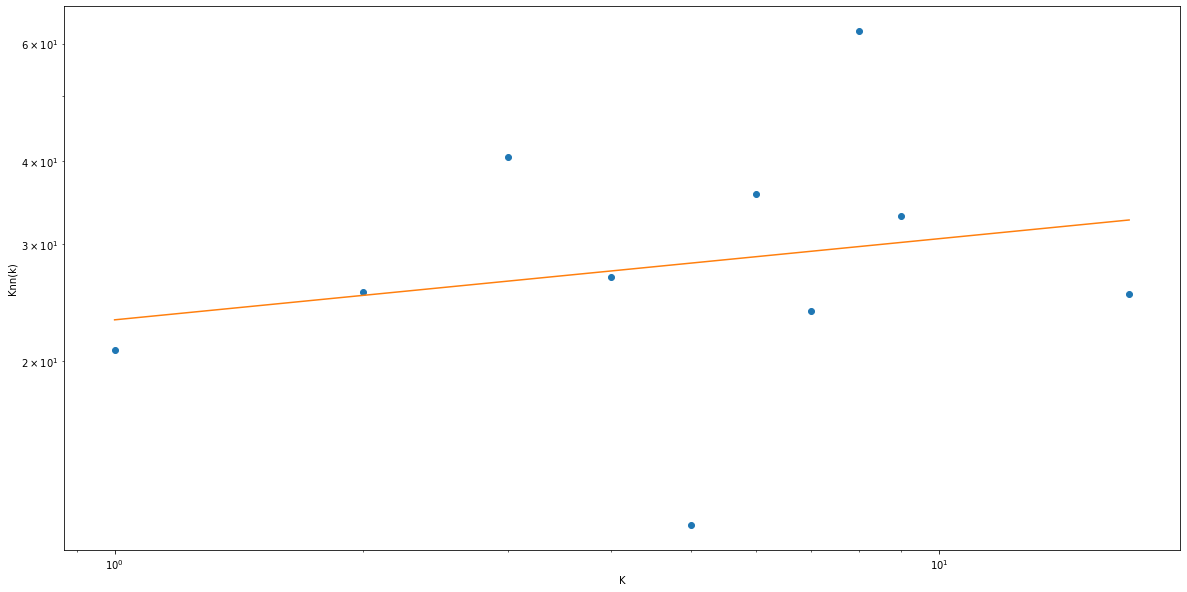

Correlation exponent and intercept:  0.12196281052688256 1.3631281096810262
Degree correlation between genre groups:  Indie Rap


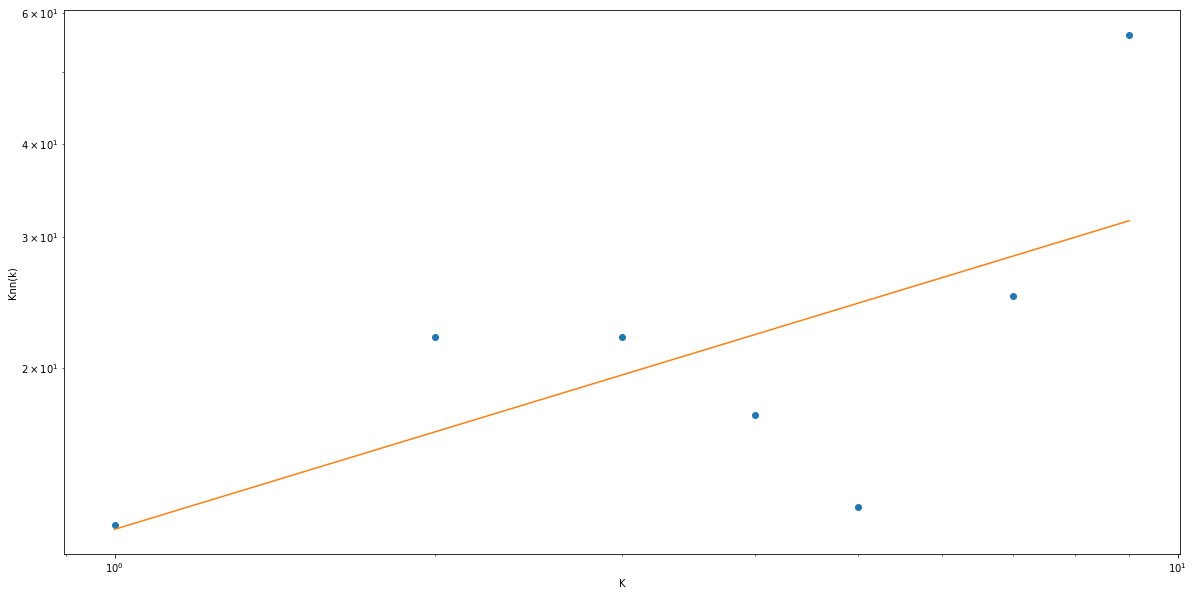

Correlation exponent and intercept:  0.4349081885162374 1.083472196009417
Degree correlation between genre groups:  Indie R&B
No collaboration found
Degree correlation between genre groups:  Oldies EDM


<Figure size 1440x720 with 0 Axes>

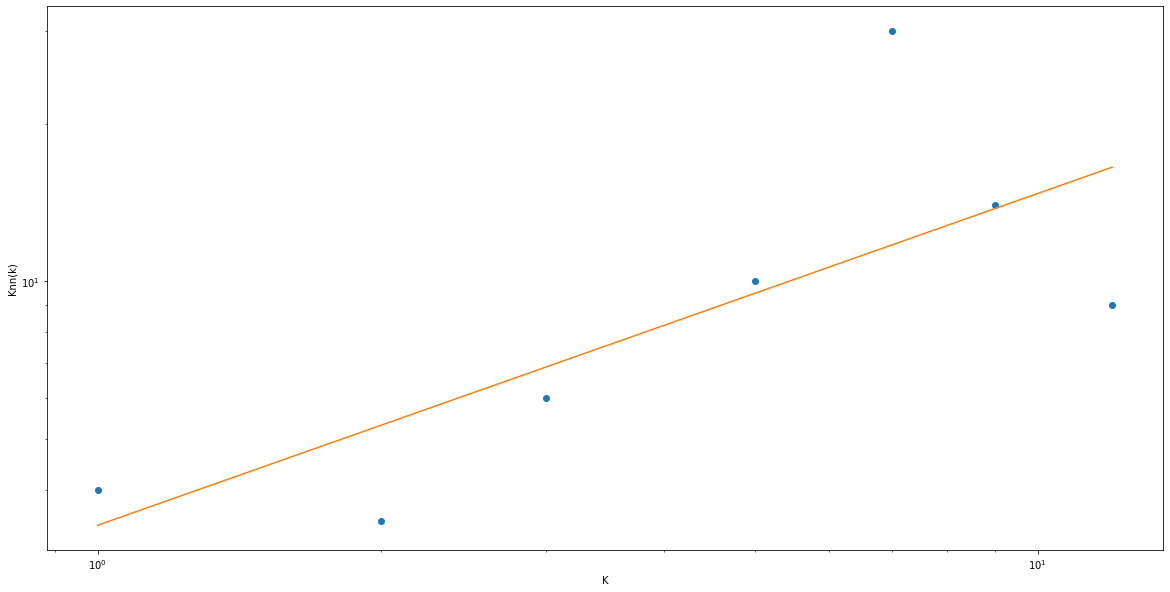

Correlation exponent and intercept:  0.6322771664362533 0.5353996342996713
Degree correlation between genre groups:  Oldies Classical


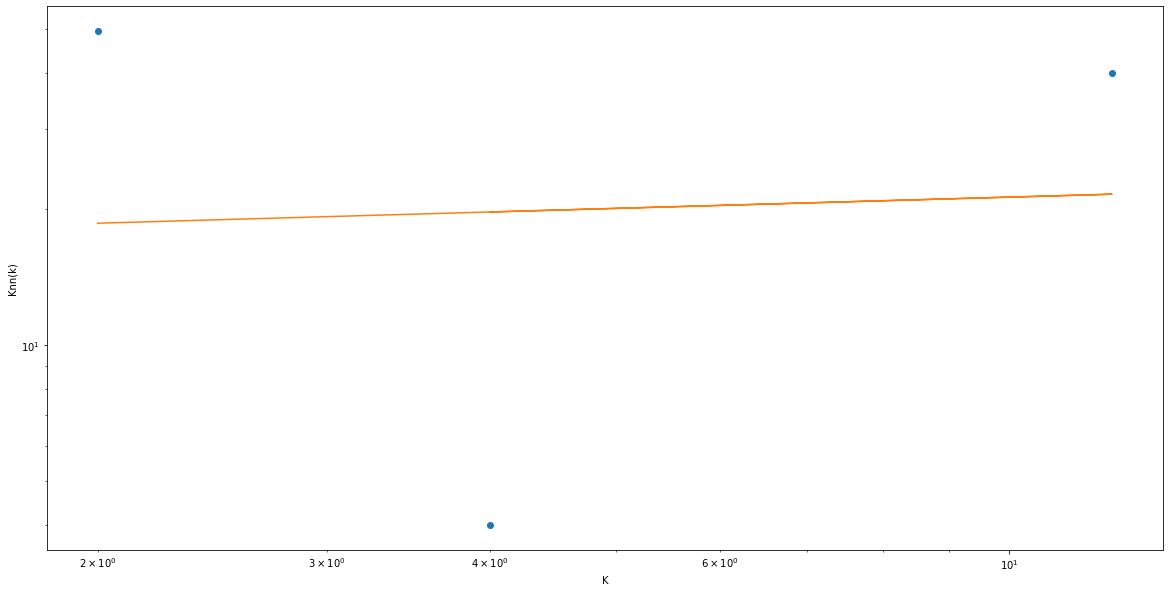

Correlation exponent and intercept:  0.08250660254811613 1.2450582389408447
Degree correlation between genre groups:  Oldies Rock


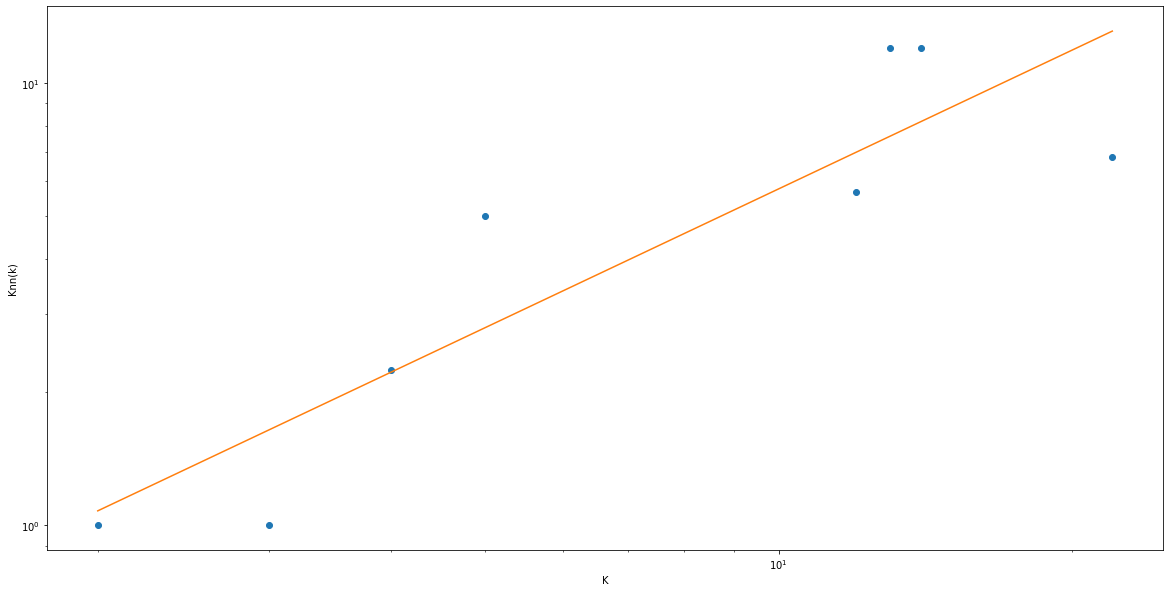

Correlation exponent and intercept:  1.0416944239103525 -0.2809243733053014
Degree correlation between genre groups:  Oldies Hip-hop


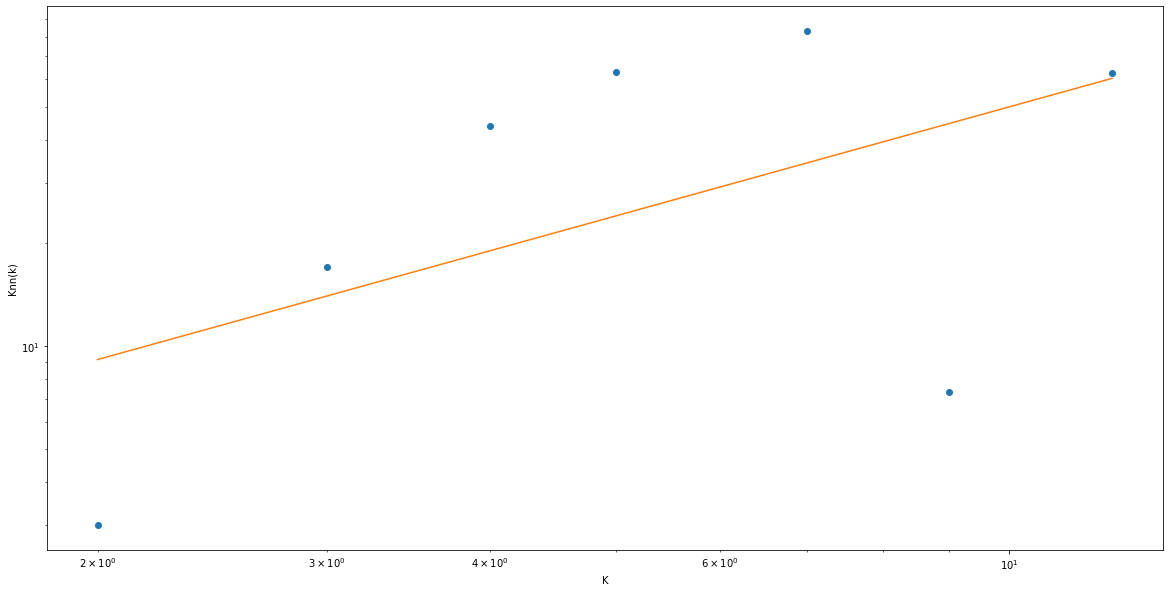

Correlation exponent and intercept:  1.0544222168405182 0.6433015294790712
Degree correlation between genre groups:  Oldies Rap


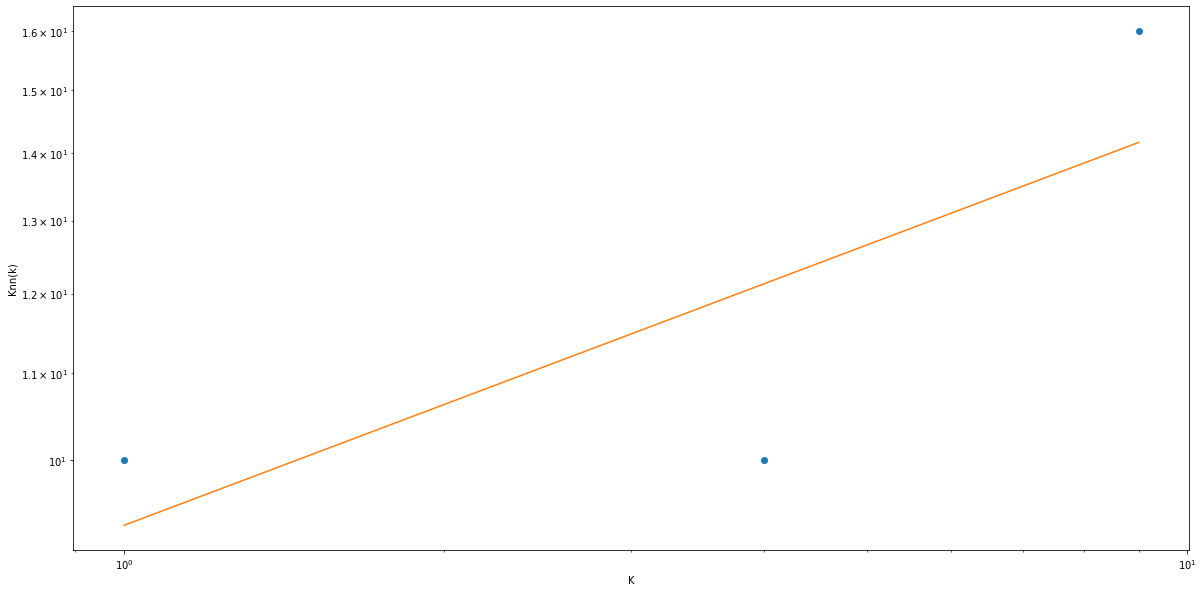

Correlation exponent and intercept:  0.1908738350276185 0.9690208519571335
Degree correlation between genre groups:  Oldies R&B
No collaboration found
Degree correlation between genre groups:  EDM Classical


<Figure size 1440x720 with 0 Axes>

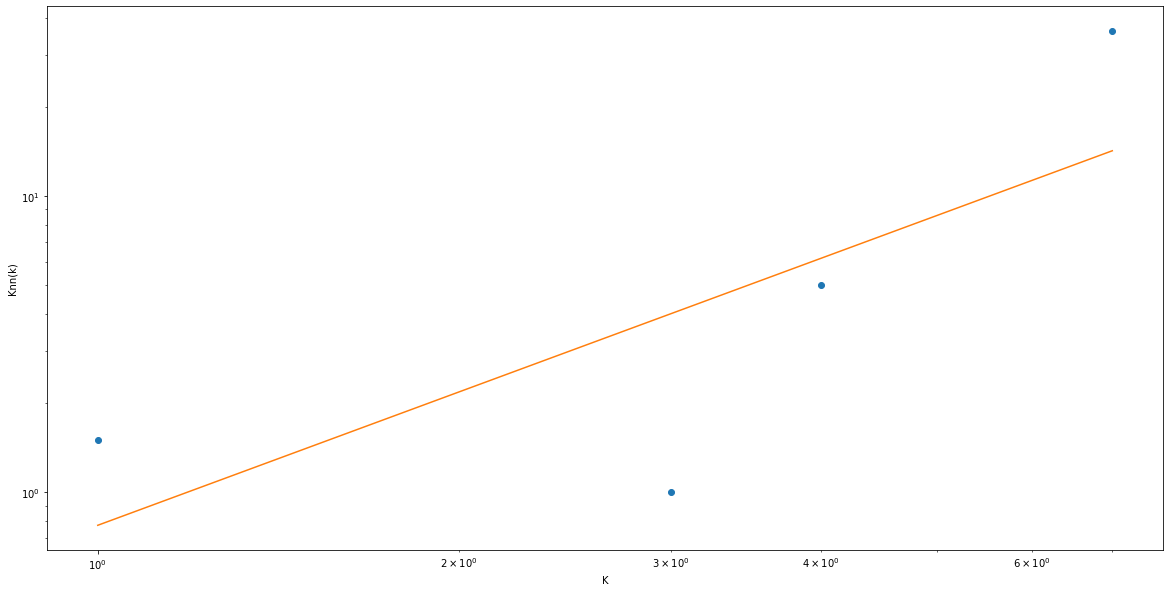

Correlation exponent and intercept:  1.4960273042511878 -0.11185264719864205
Degree correlation between genre groups:  EDM Rock


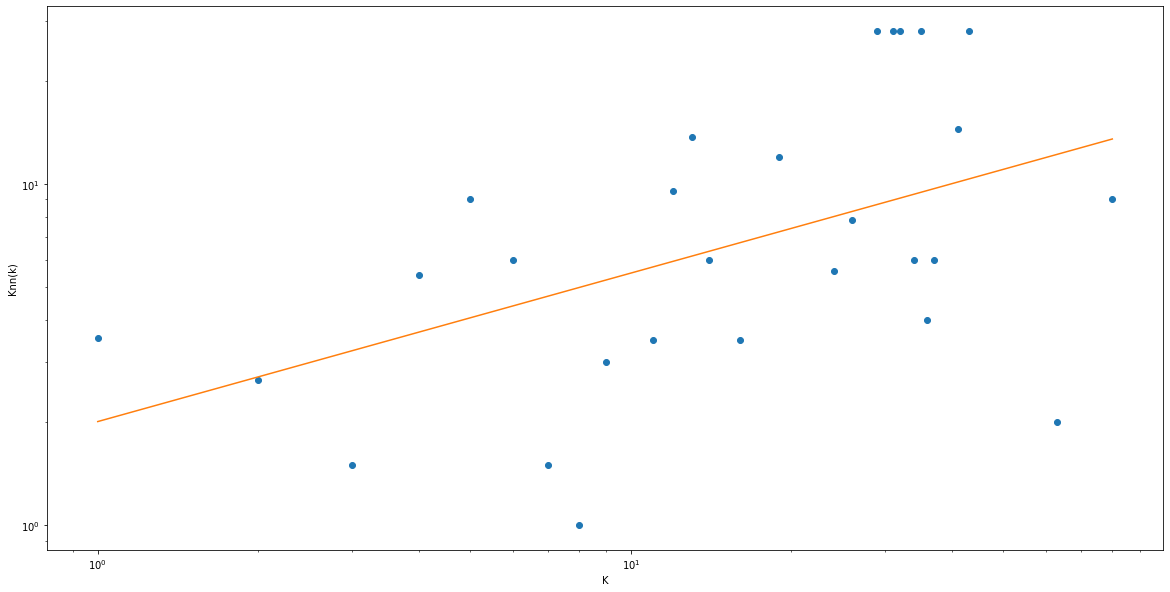

Correlation exponent and intercept:  0.43481250968147206 0.30374466518849585
Degree correlation between genre groups:  EDM Hip-hop


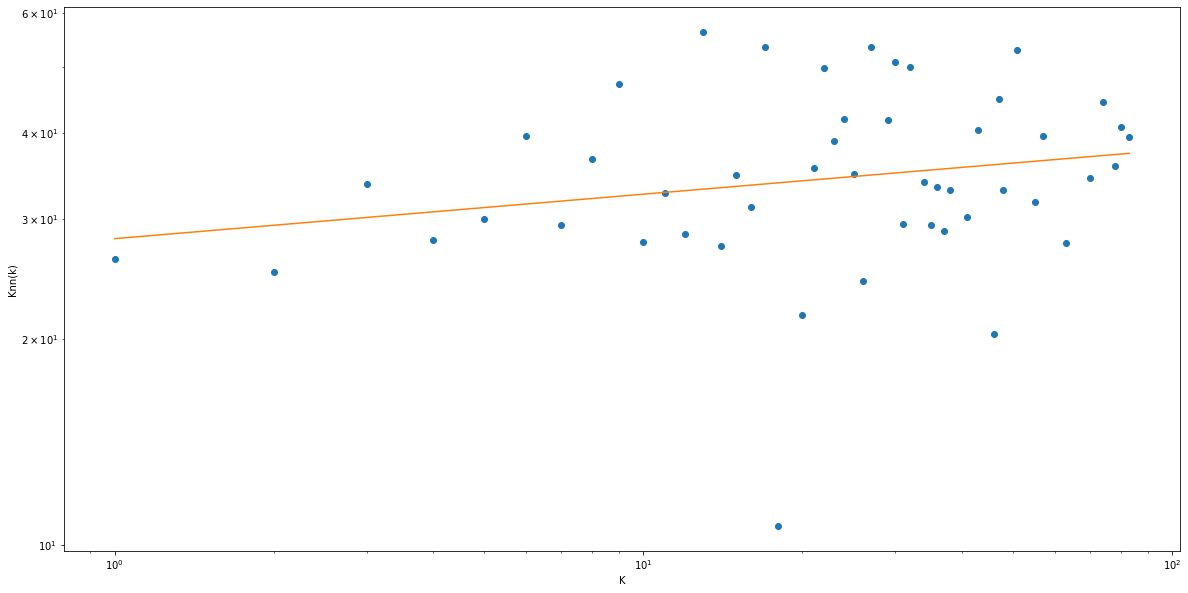

Correlation exponent and intercept:  0.06504789181457918 1.4481467393881524
Degree correlation between genre groups:  EDM Rap


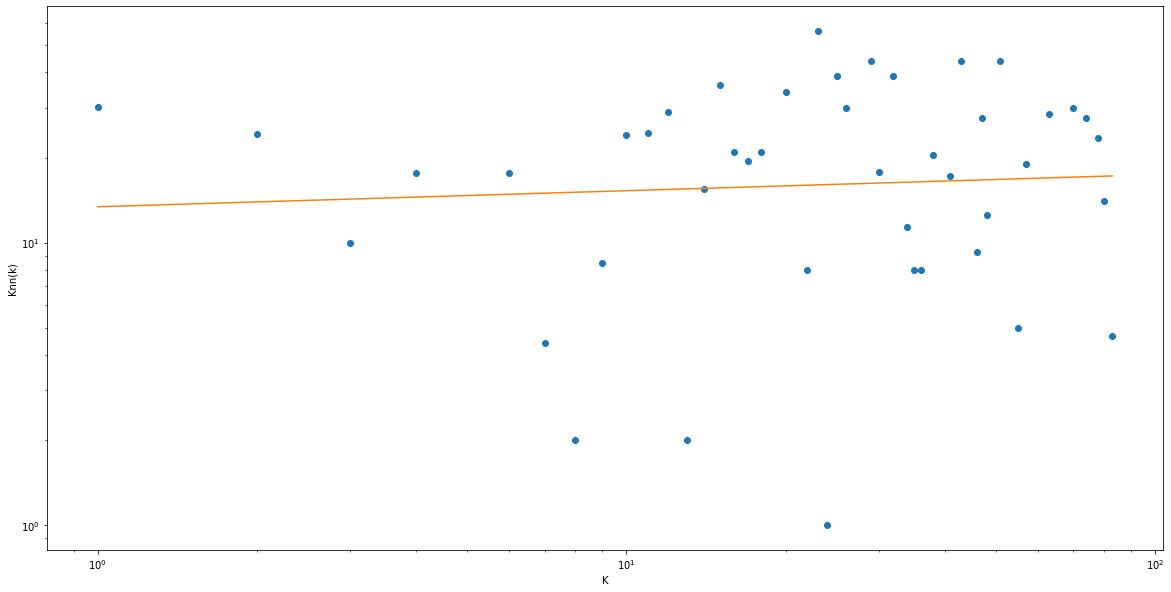

Correlation exponent and intercept:  0.05680628831932177 1.1268522161546448
Degree correlation between genre groups:  EDM R&B
No collaboration found
Degree correlation between genre groups:  Classical Rock


<Figure size 1440x720 with 0 Axes>

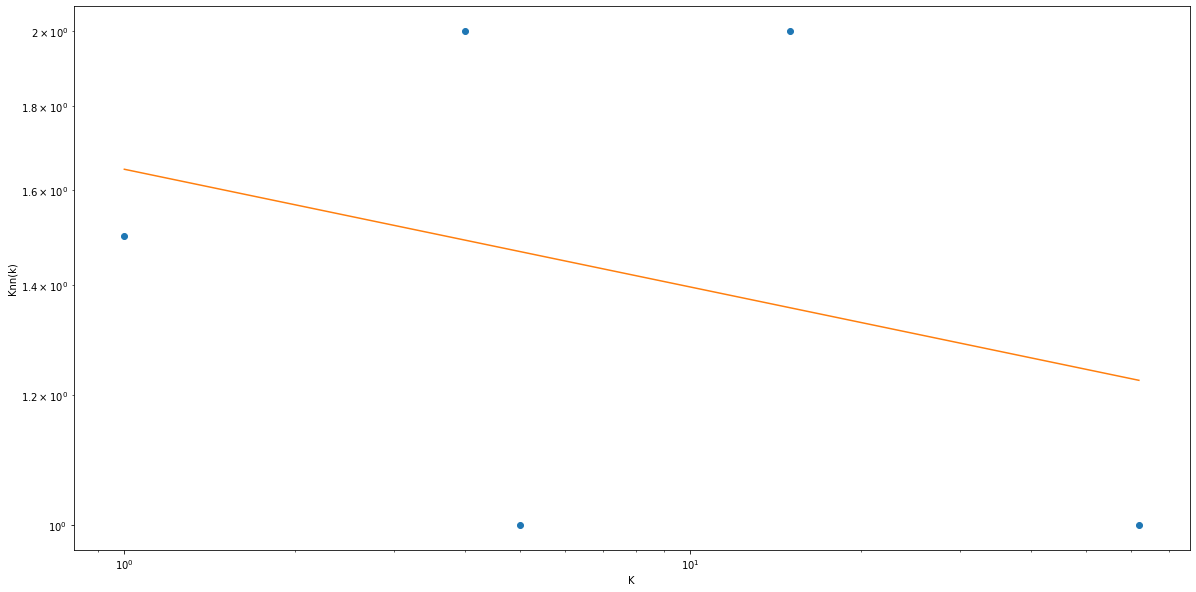

Correlation exponent and intercept:  -0.07172573521570165 0.21687704106412575
Degree correlation between genre groups:  Classical Hip-hop


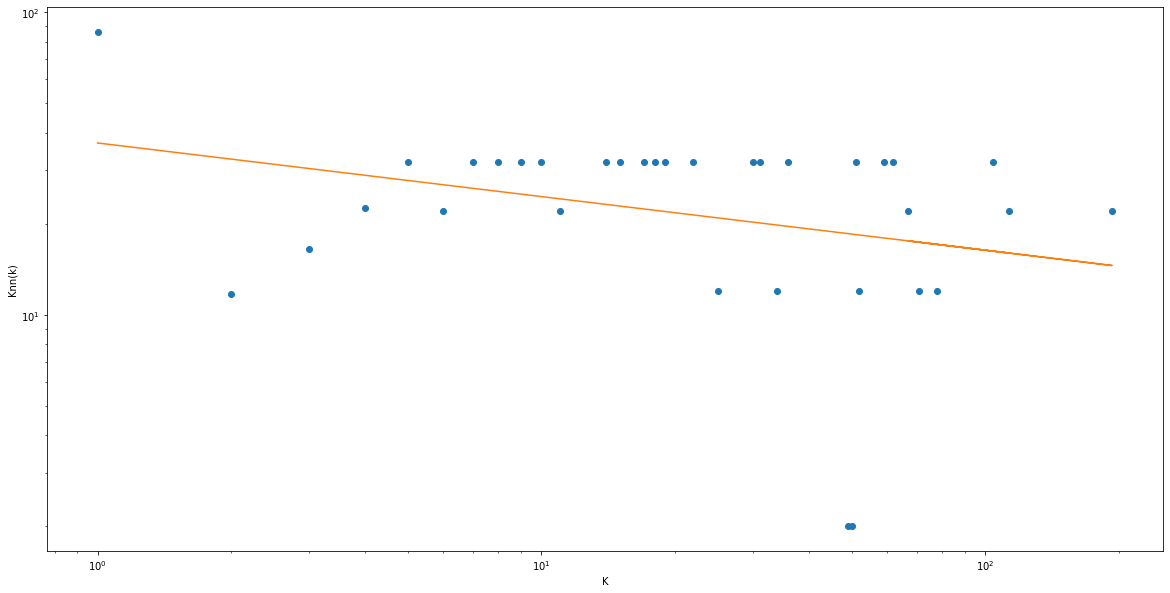

Correlation exponent and intercept:  -0.1772173874625142 1.5680518078533388
Degree correlation between genre groups:  Classical Rap


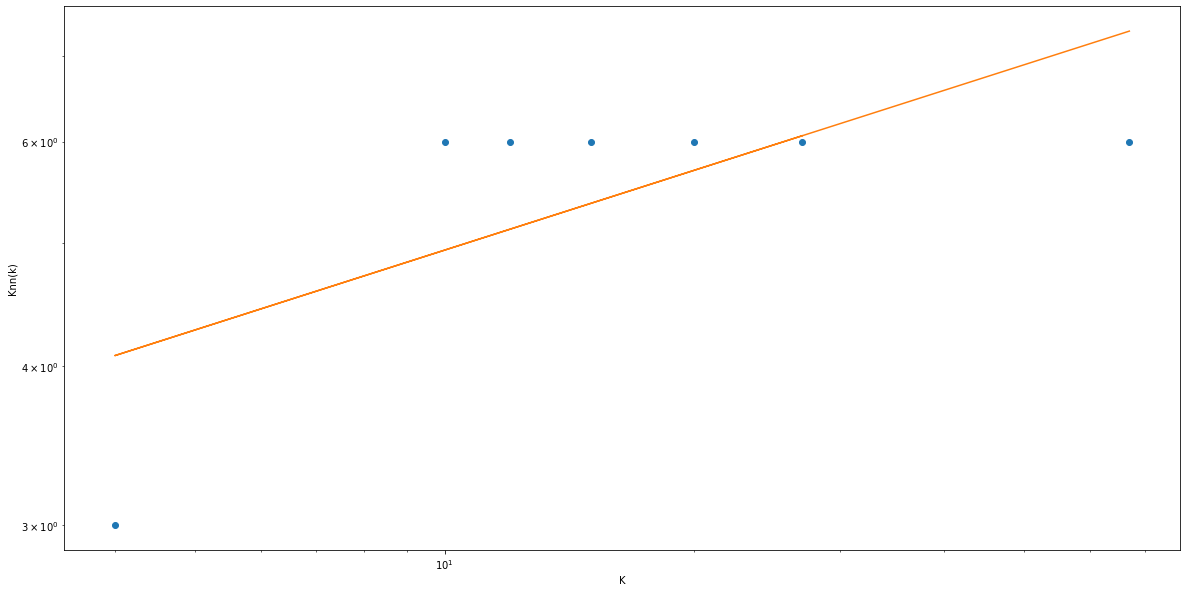

Correlation exponent and intercept:  0.20806467509730375 0.4849996920009278
Degree correlation between genre groups:  Classical R&B
No collaboration found
Degree correlation between genre groups:  Rock Hip-hop


<Figure size 1440x720 with 0 Axes>

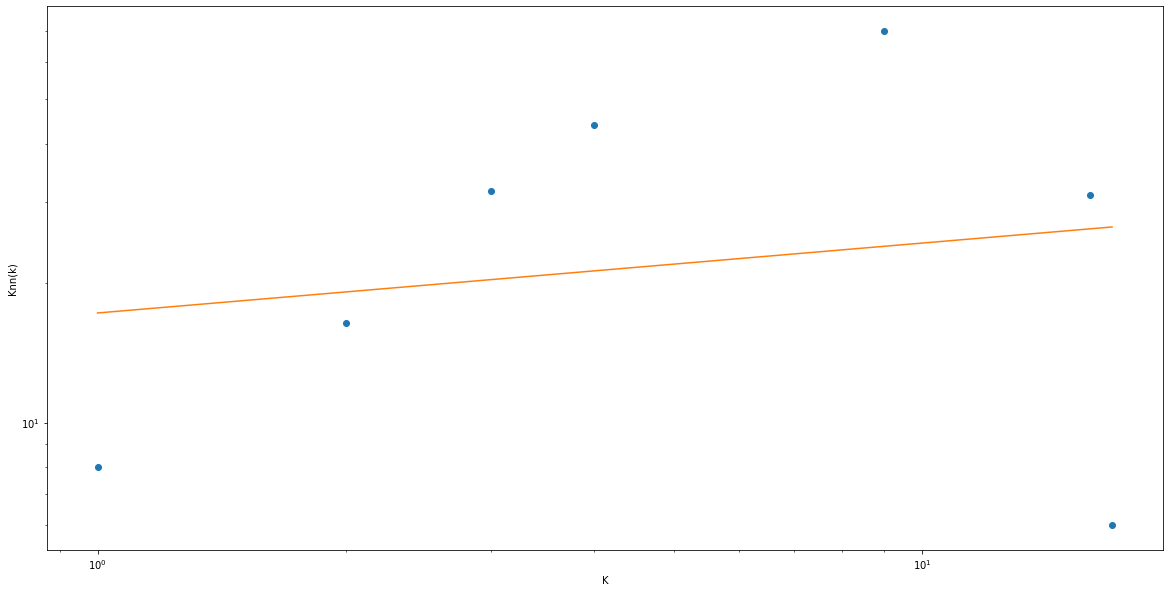

Correlation exponent and intercept:  0.15091375233259044 1.2365349079750465
Degree correlation between genre groups:  Rock Rap


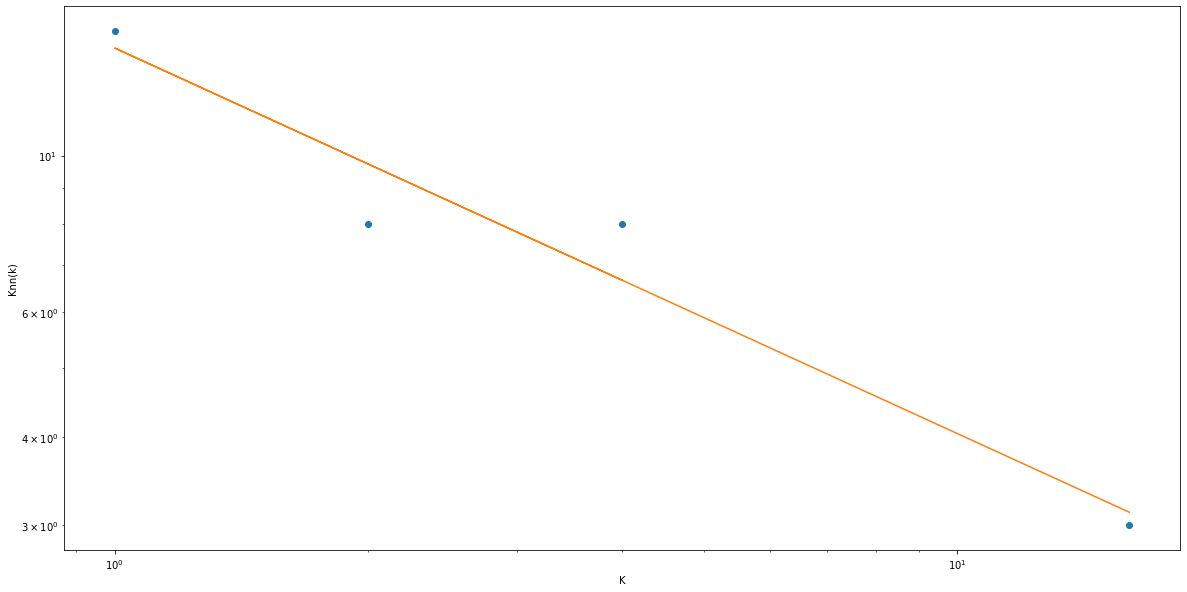

Correlation exponent and intercept:  -0.5452449046505501 1.1520844966846424
Degree correlation between genre groups:  Rock R&B


C:\Users\Ayan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


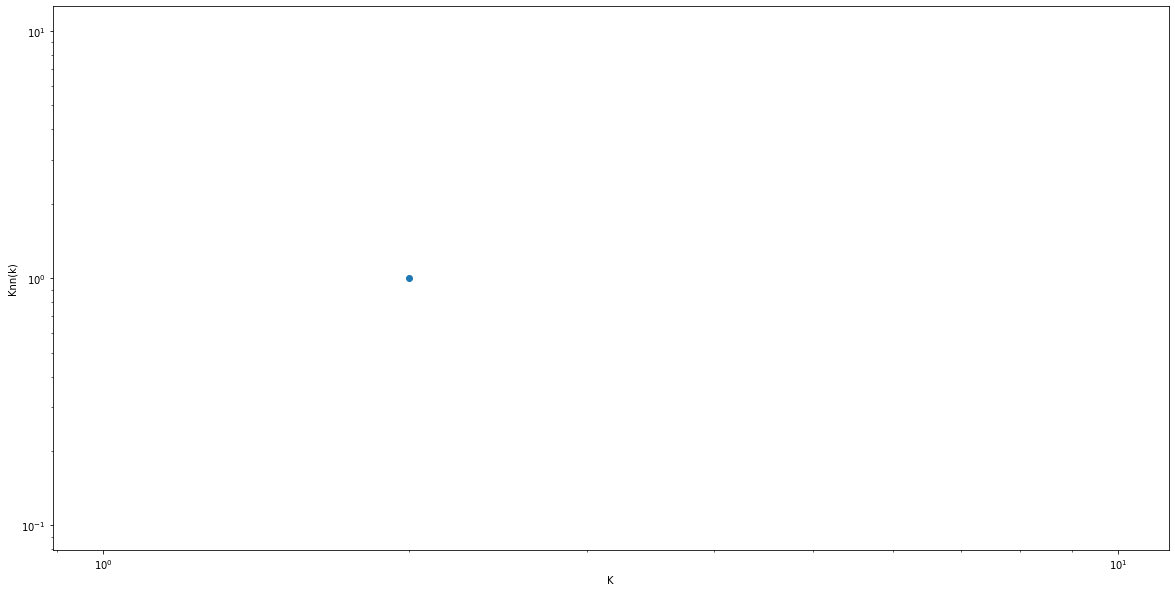

Correlation exponent and intercept:  -0.0 0.0
Degree correlation between genre groups:  Hip-hop Rap


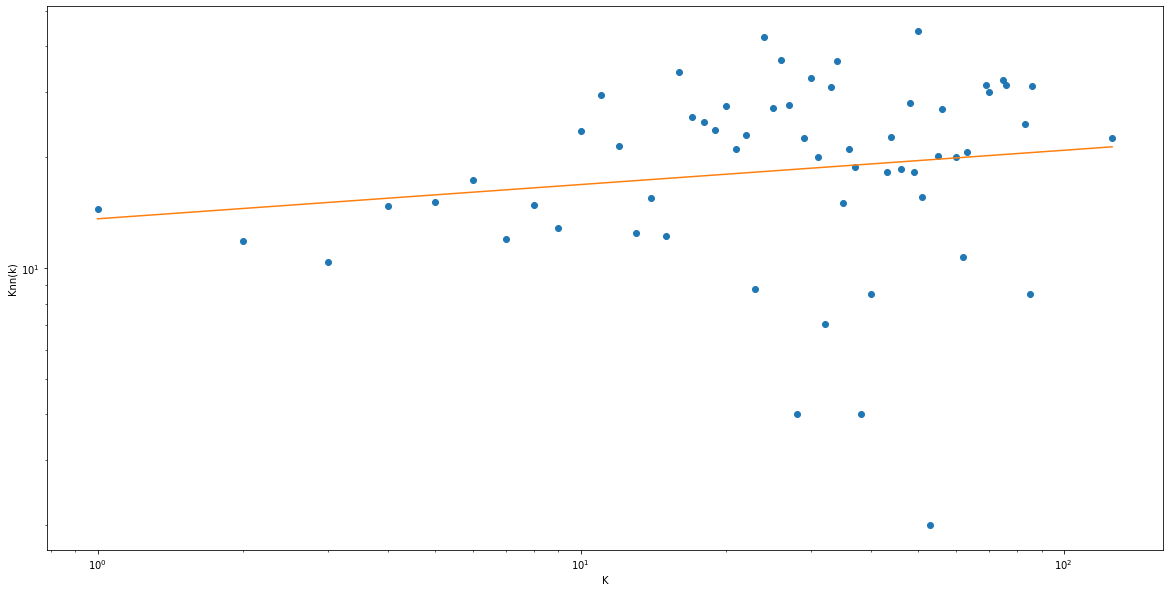

Correlation exponent and intercept:  0.09308613406342317 1.1335781190250855
Degree correlation between genre groups:  Hip-hop R&B
No collaboration found
Degree correlation between genre groups:  Rap R&B
No collaboration found


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [39]:
for i, j in itertools.combinations(distinct_genres, 2):
    index_i = distinct_genres.index(i)
    index_j = distinct_genres.index(j)
    print('Degree correlation between genre groups: ', i, j)
    try:
        assortativity_in_two_groups(G,all_genre_groups[index_i],all_genre_groups[index_j])
    except:
        print('No collaboration found')

Populairty correlation between genre groups:  Metal Jazz


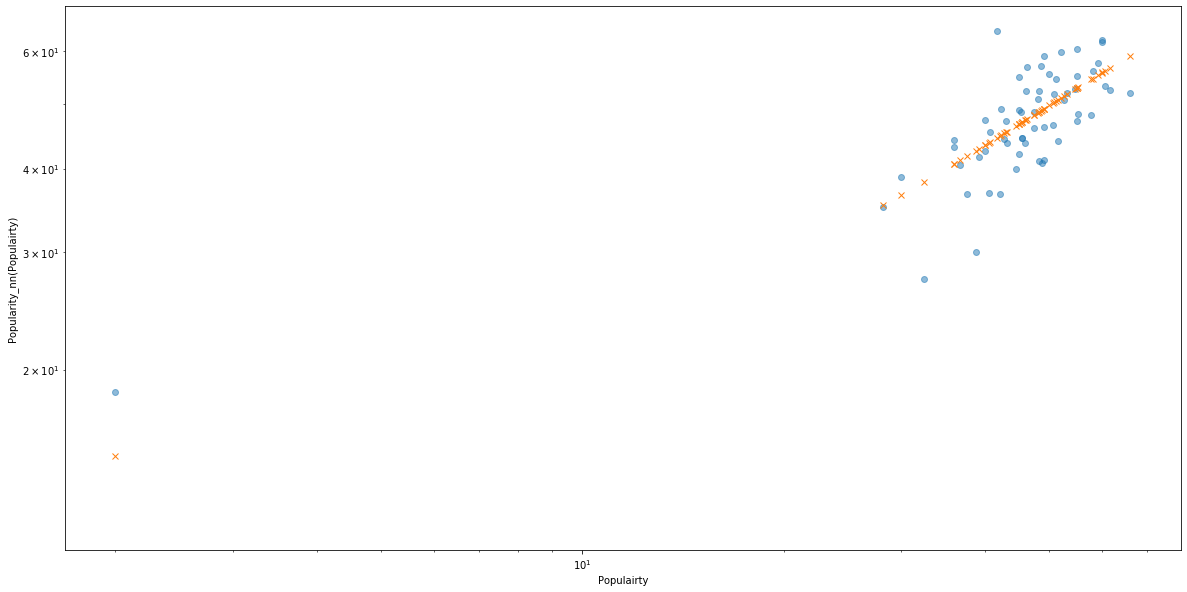

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal Pop


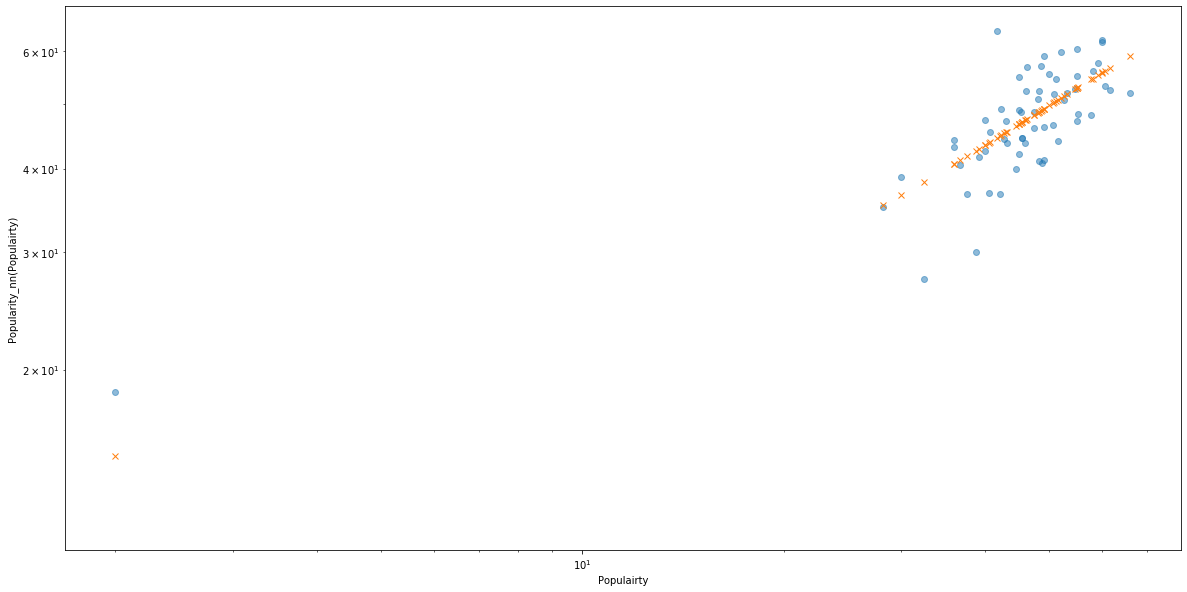

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal Country


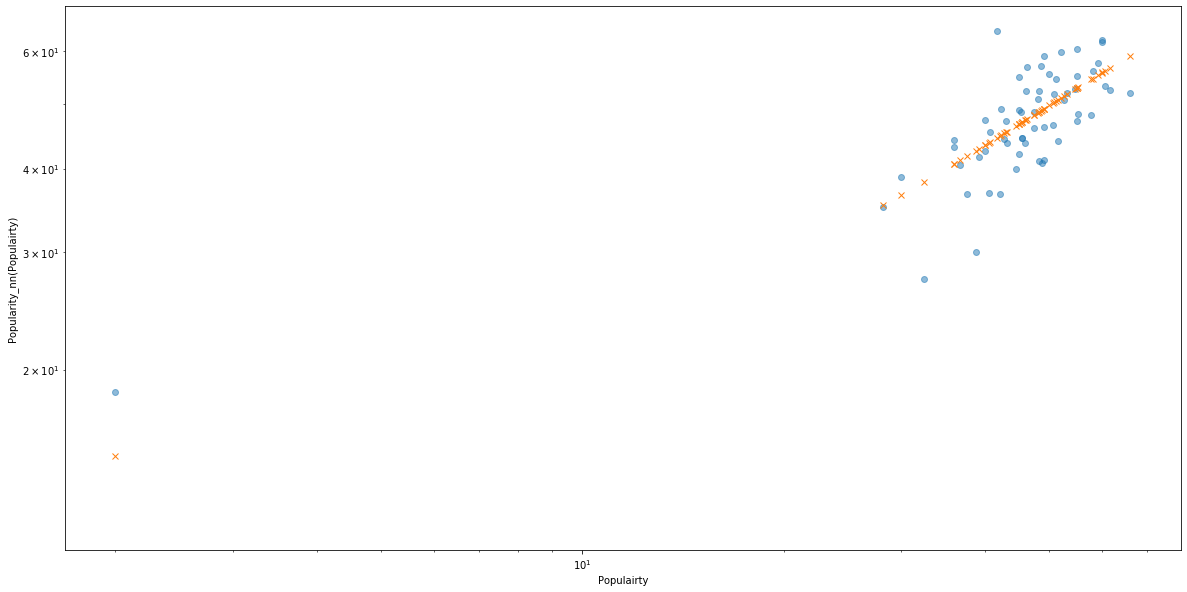

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal Indie


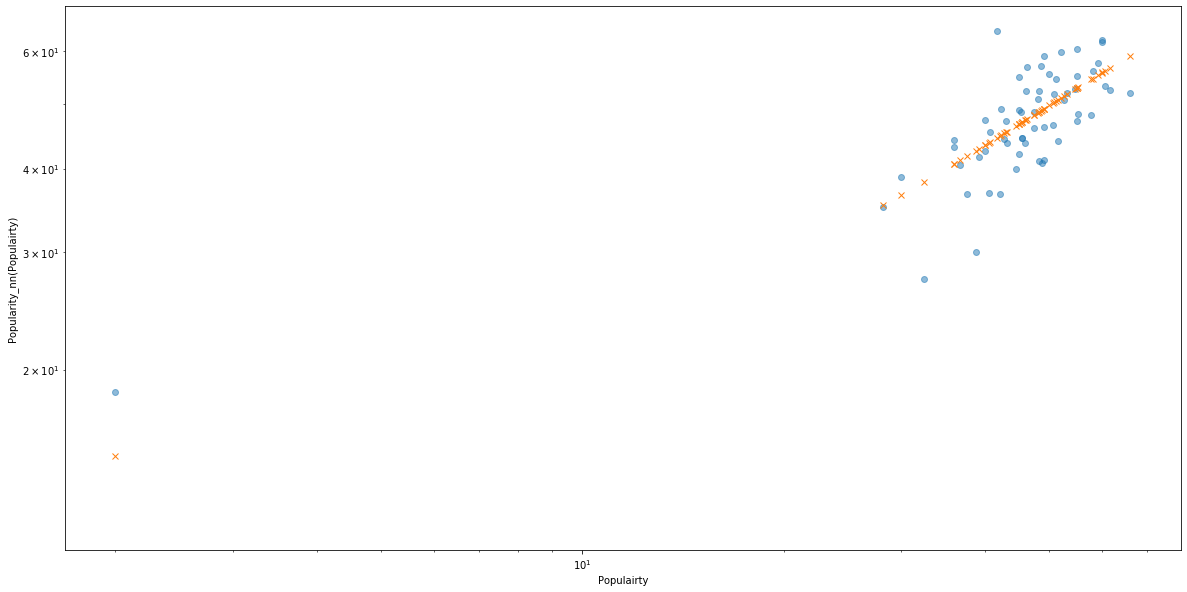

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal Oldies


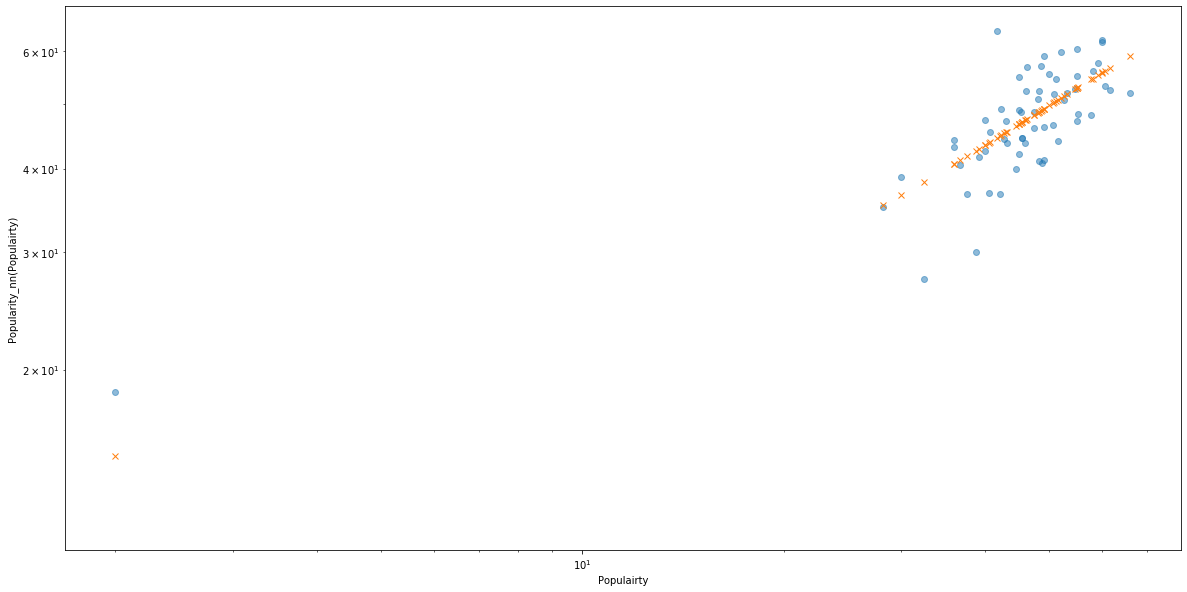

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal EDM


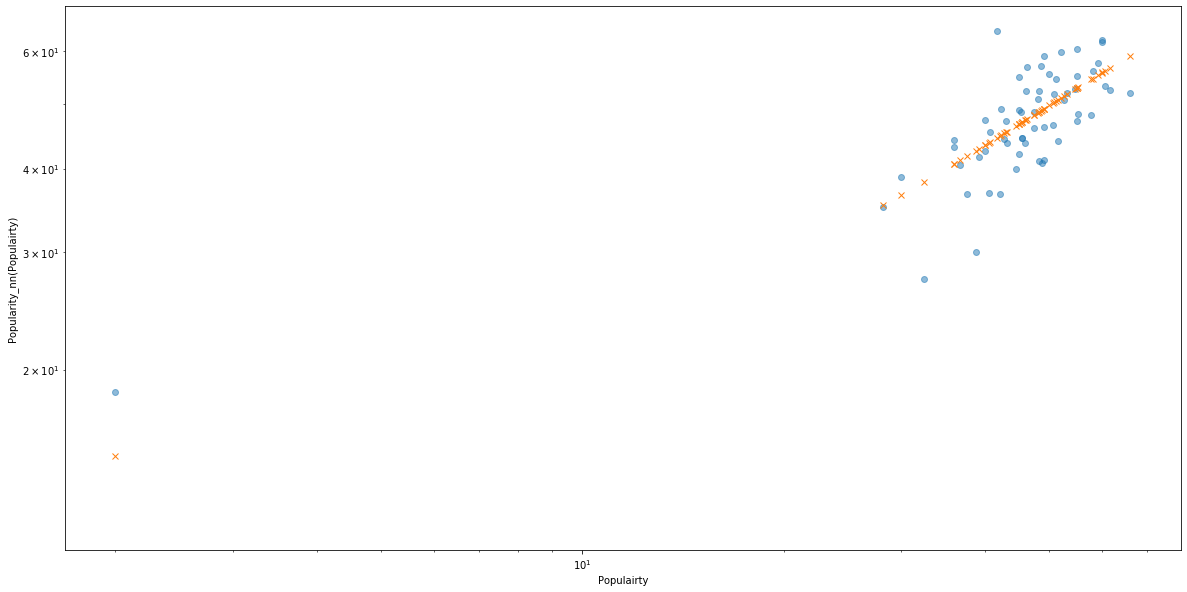

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal Classical


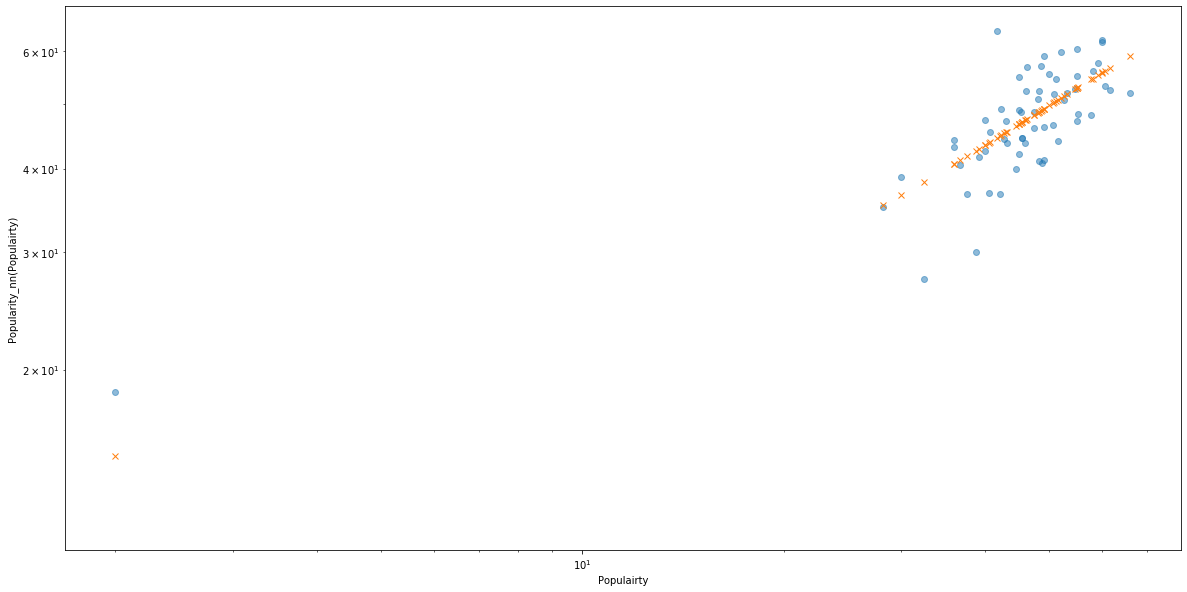

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal Rock


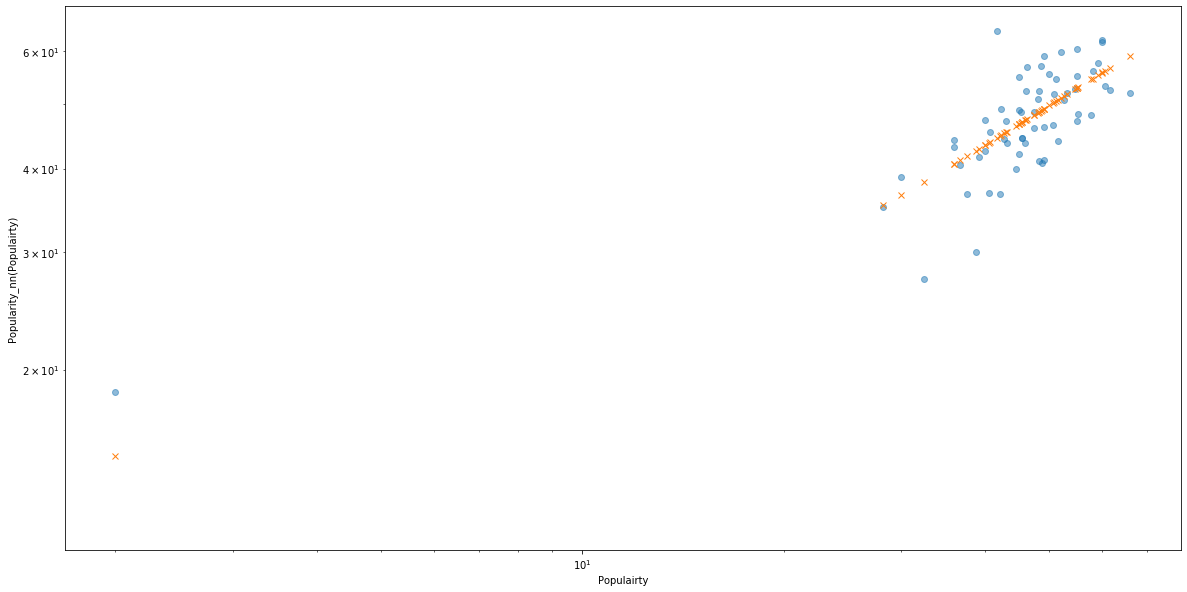

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal Hip-hop


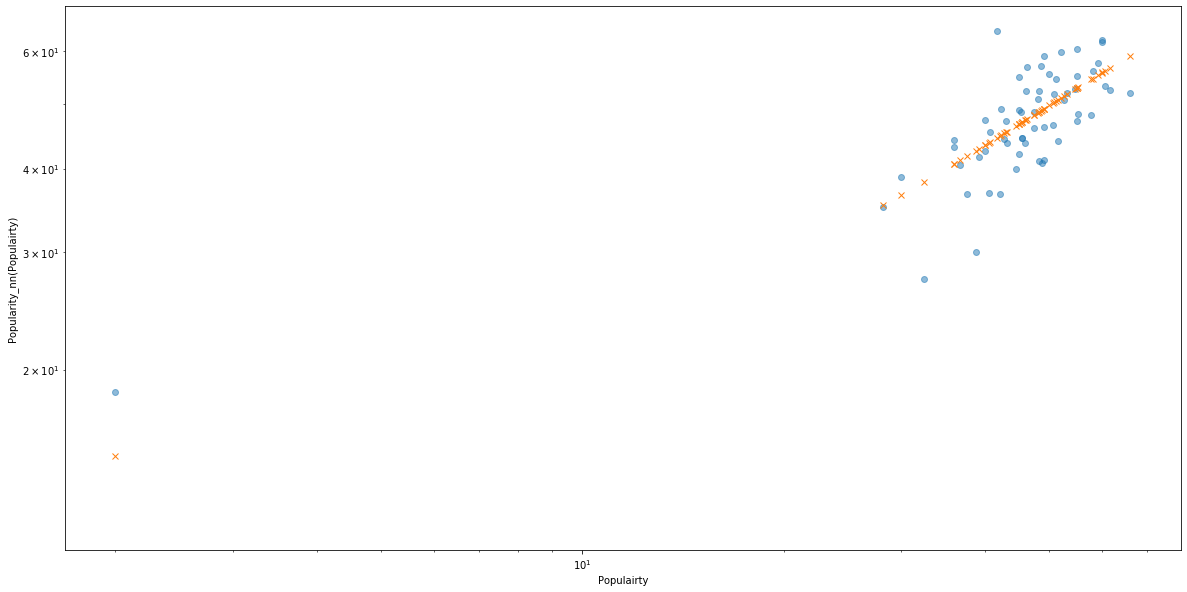

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal Rap


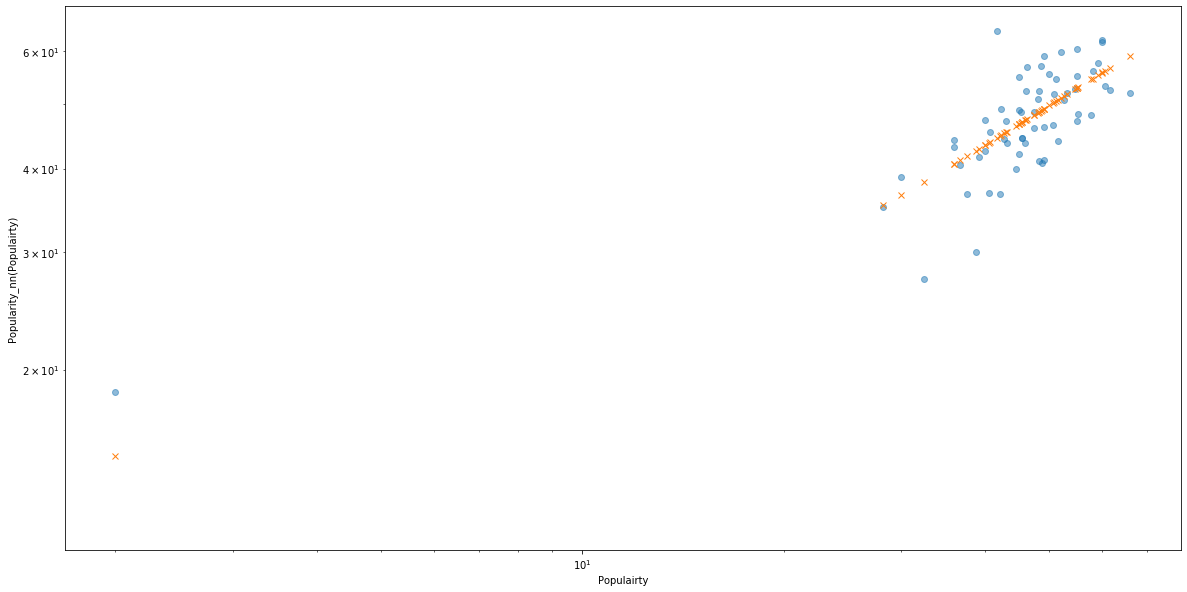

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Metal R&B


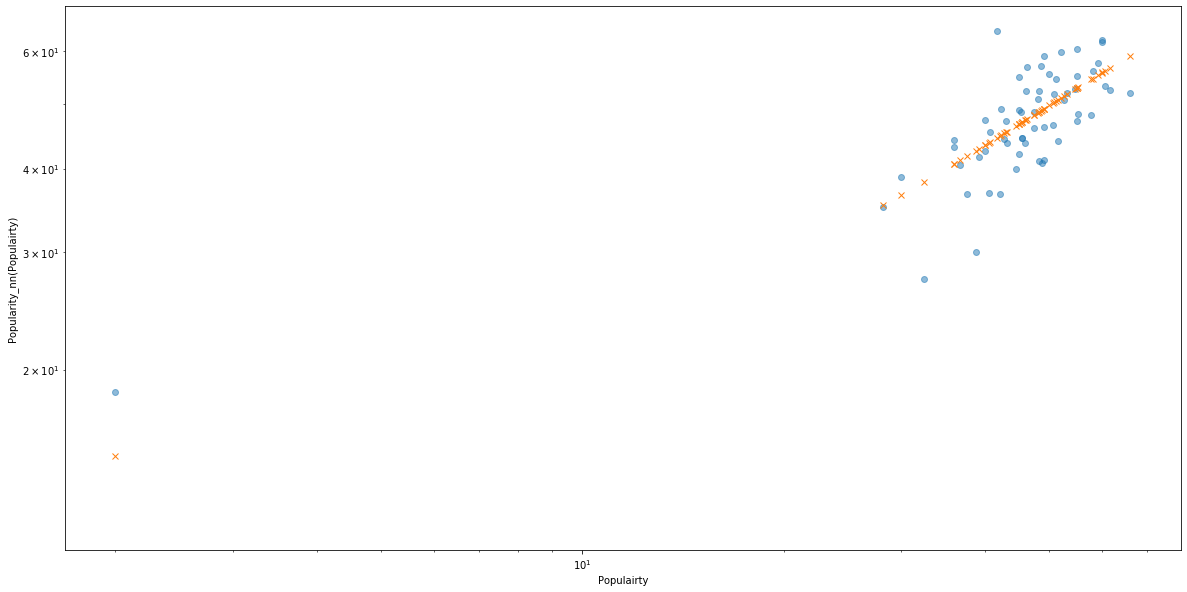

Correlation exponent and intercept:  -0.002288130637539737 0.8460326960237881 13.186052538005217
Populairty correlation between genre groups:  Jazz Pop


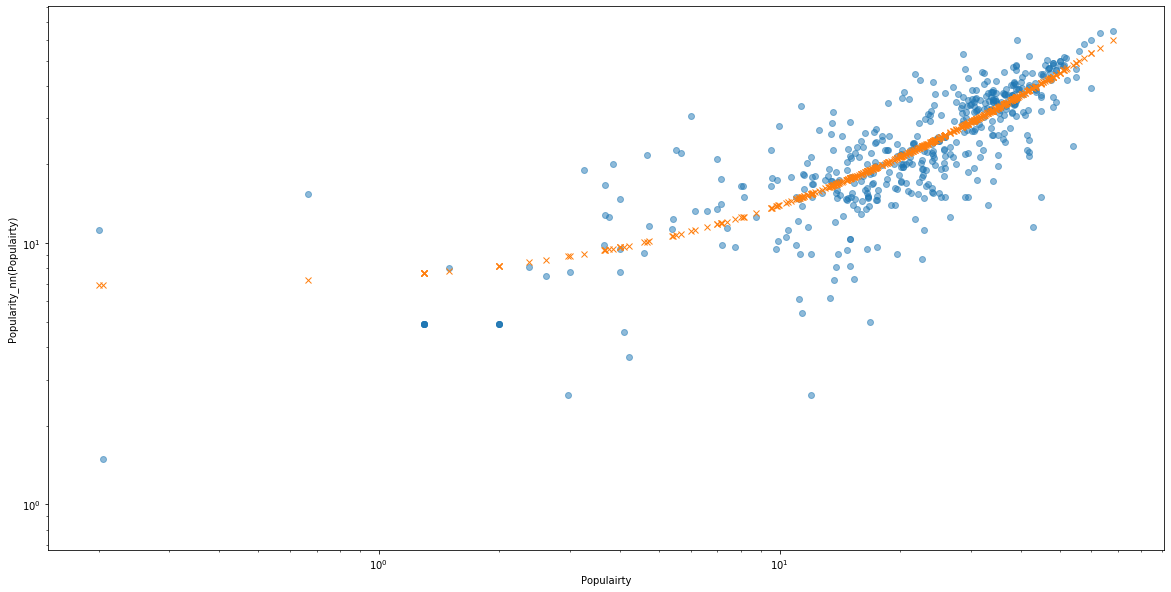

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz Country


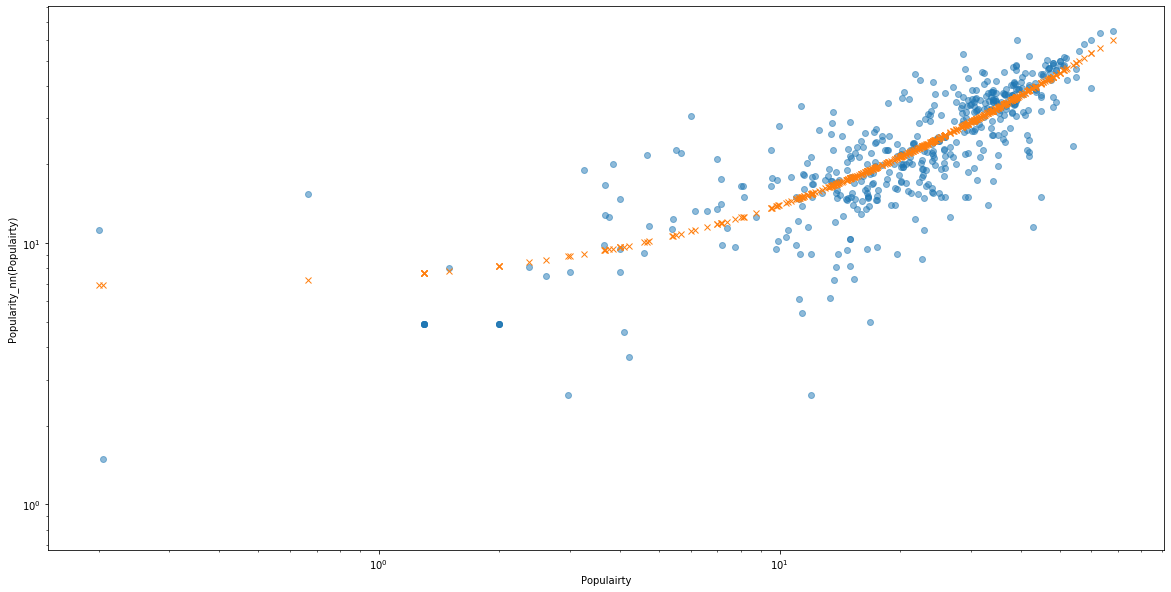

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz Indie


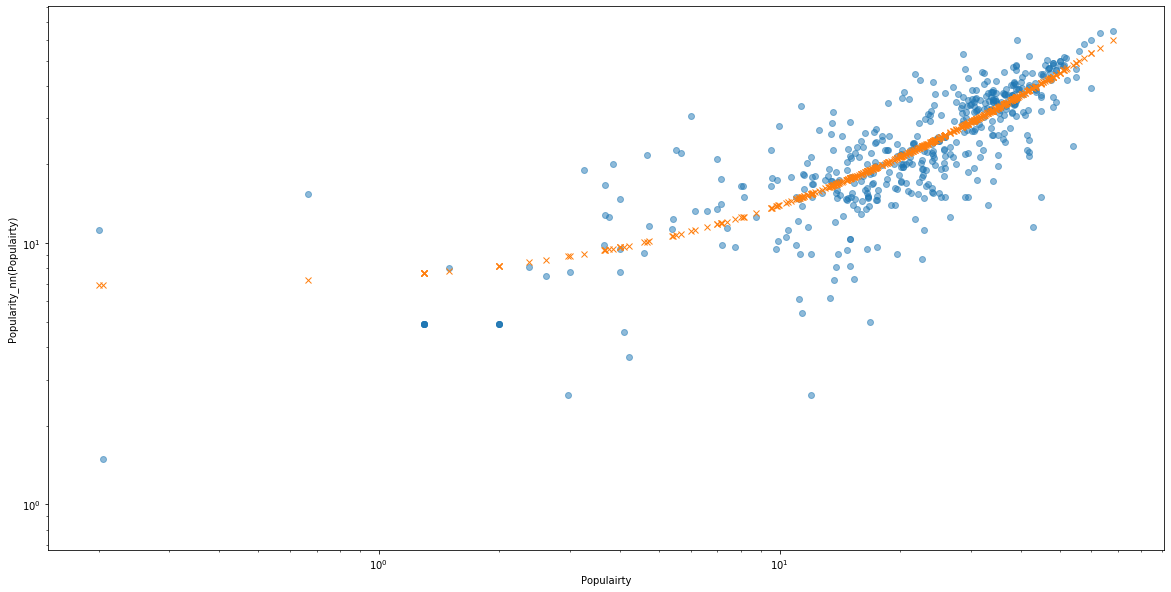

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz Oldies


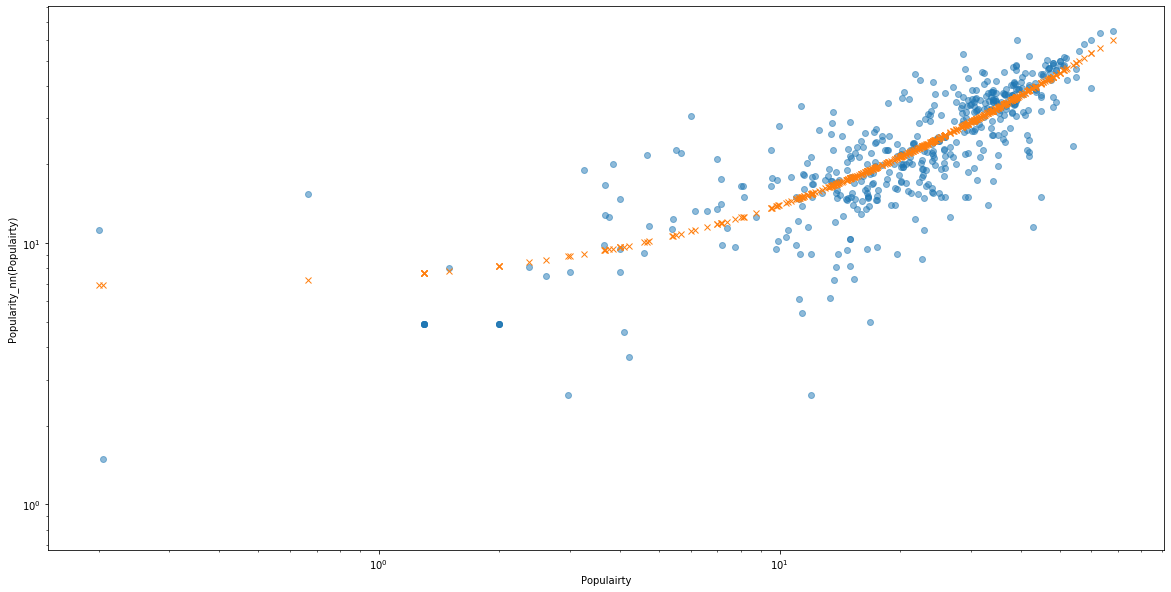

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz EDM


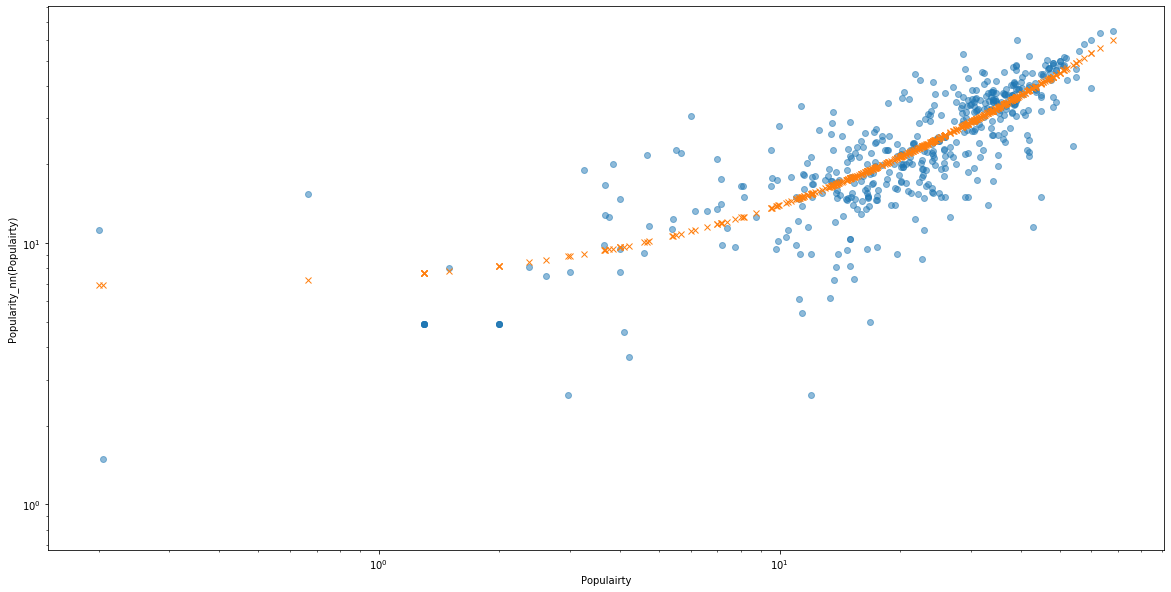

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz Classical


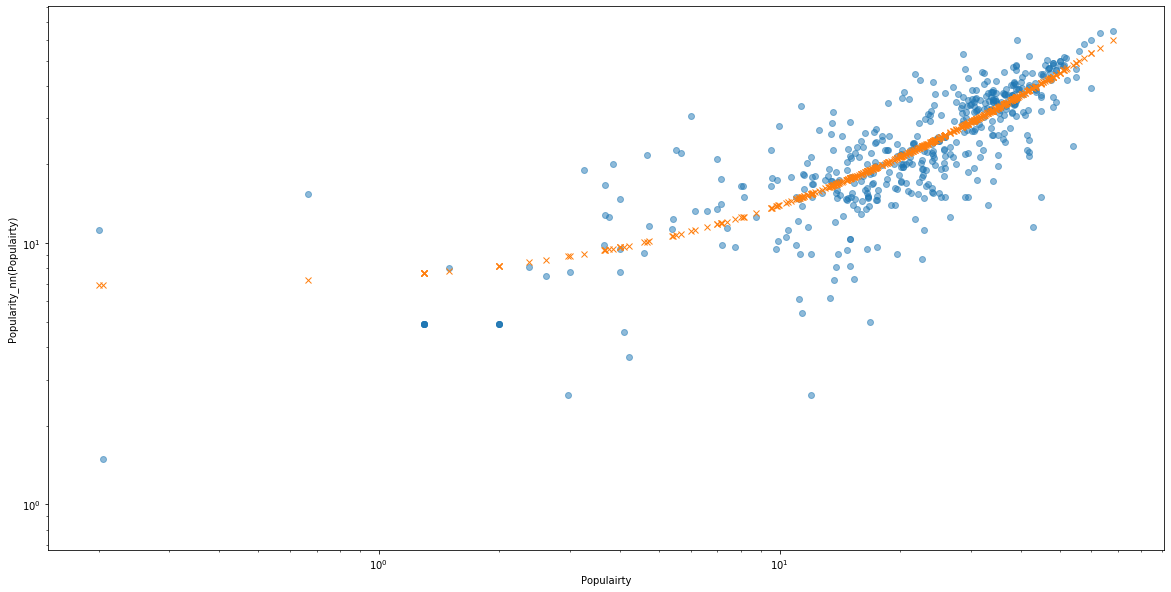

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz Rock


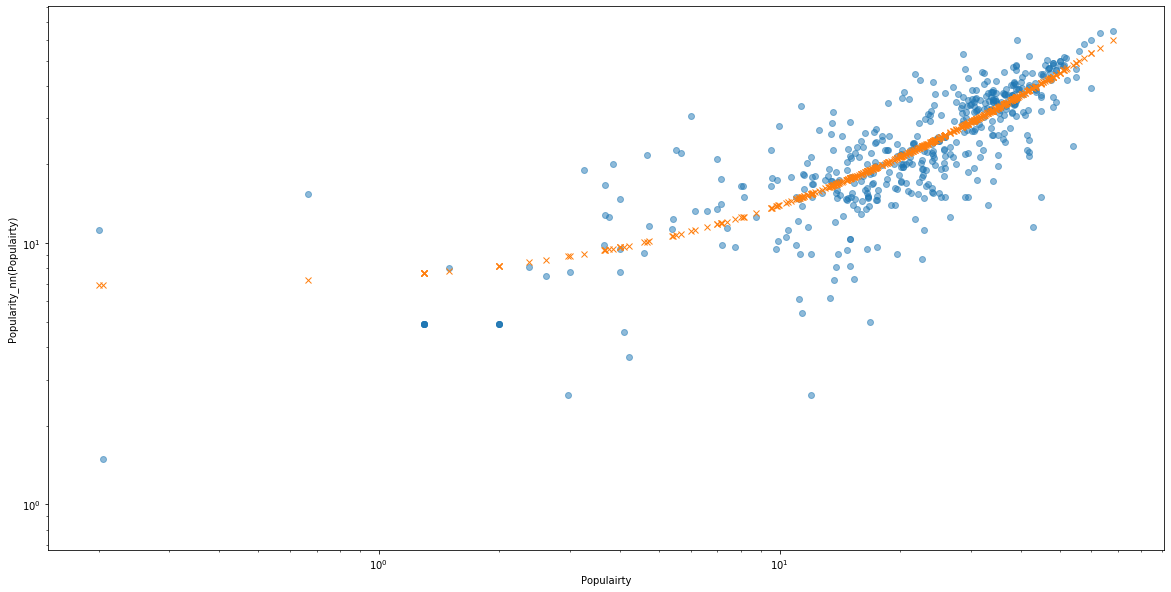

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz Hip-hop


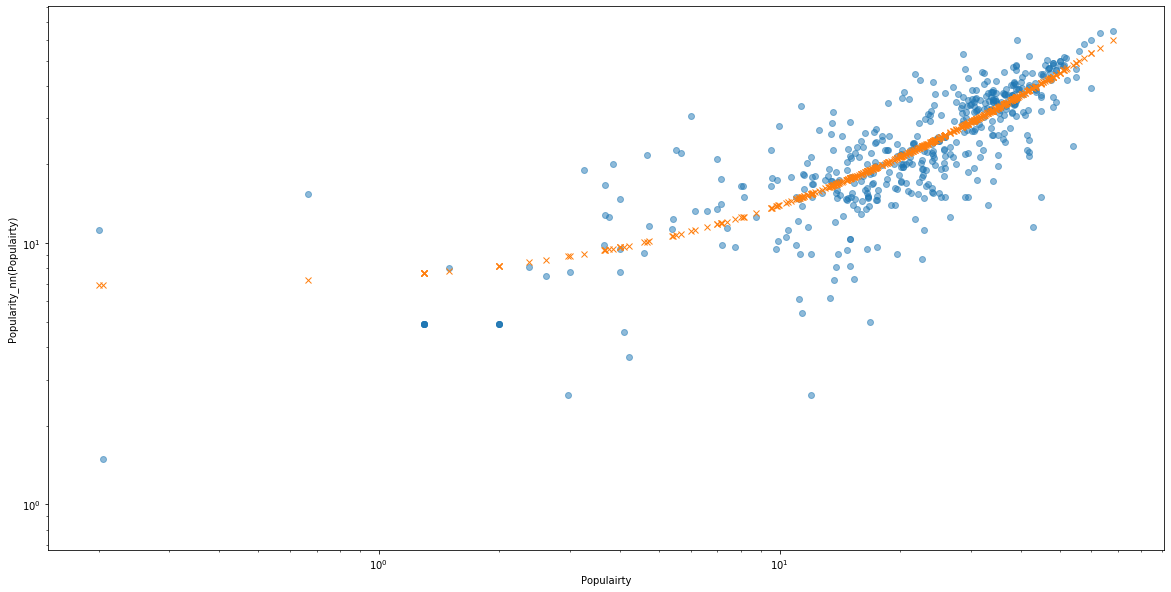

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz Rap


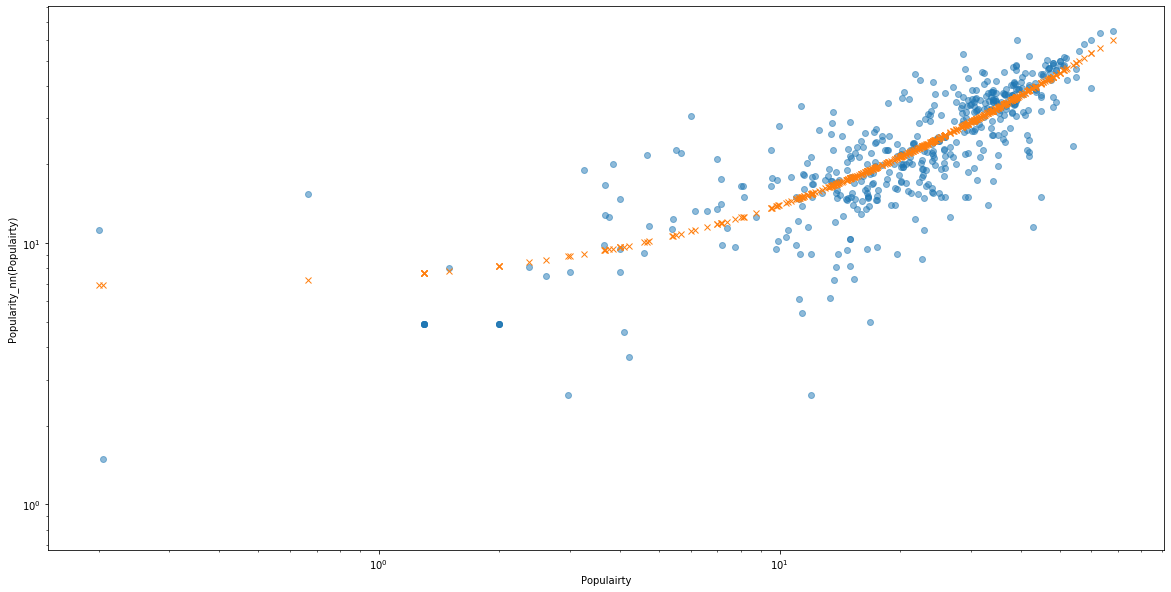

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Jazz R&B


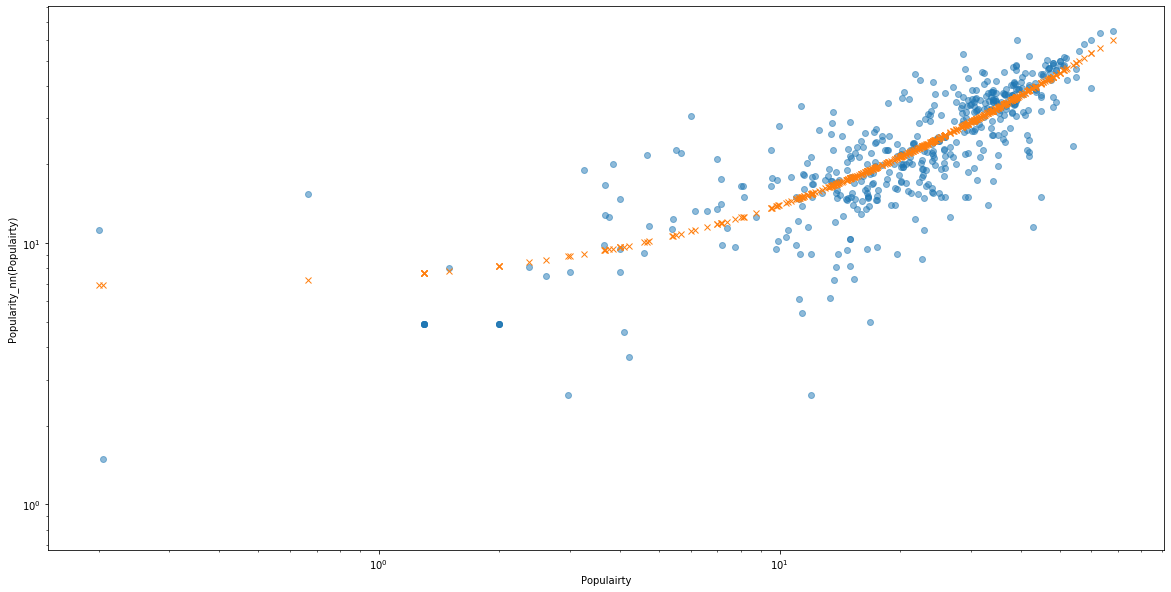

Correlation exponent and intercept:  0.0010495481209751667 0.7115731963044906 6.777057106882403
Populairty correlation between genre groups:  Pop Country


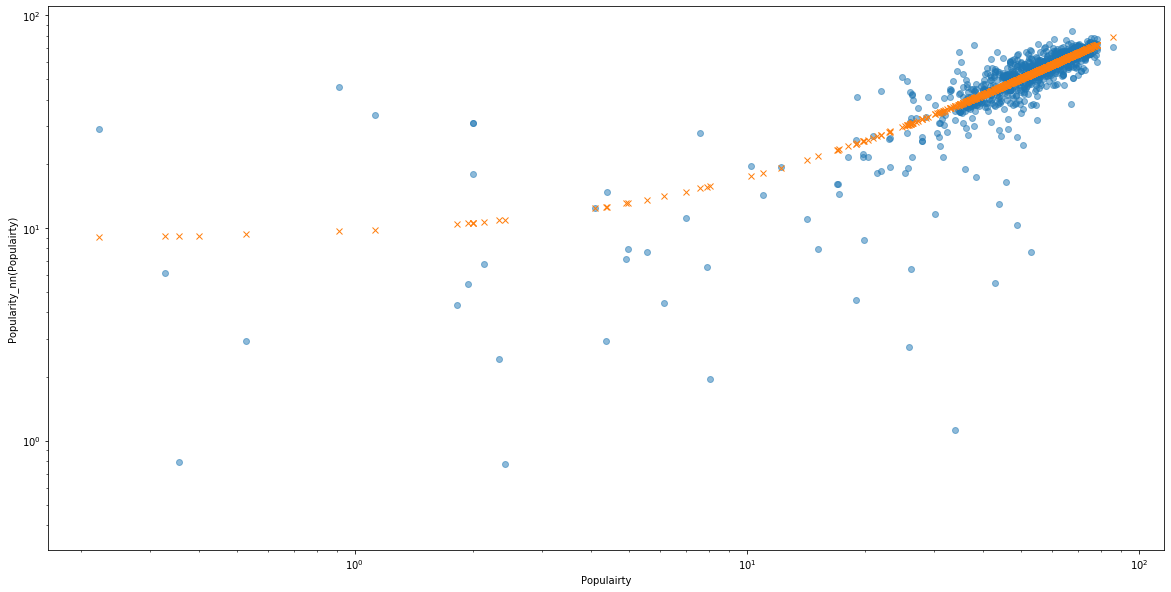

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Pop Indie


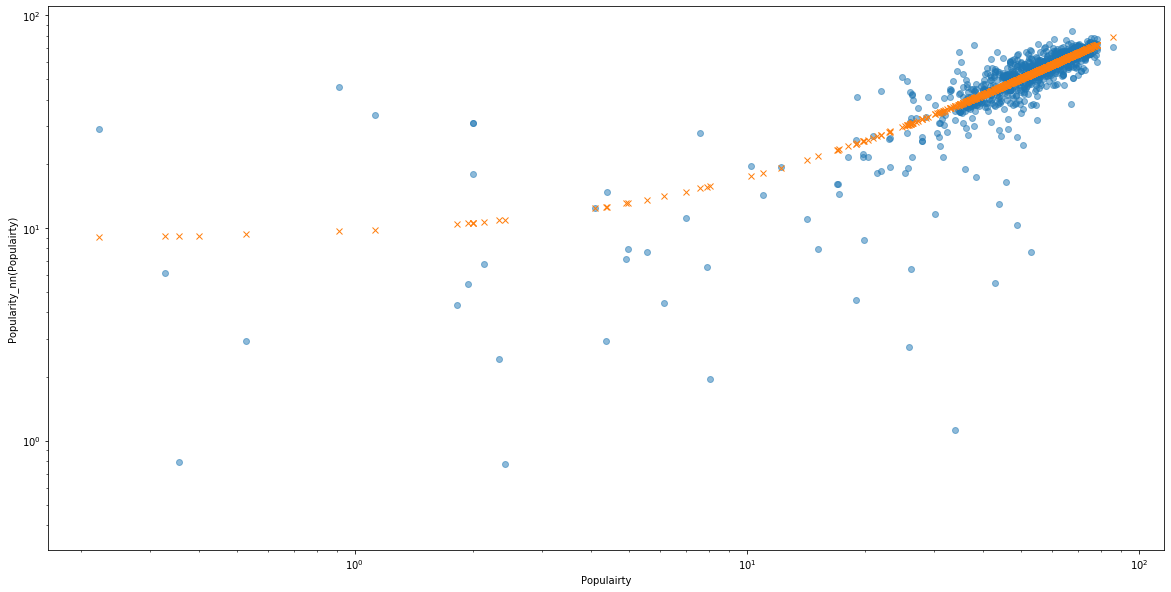

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Pop Oldies


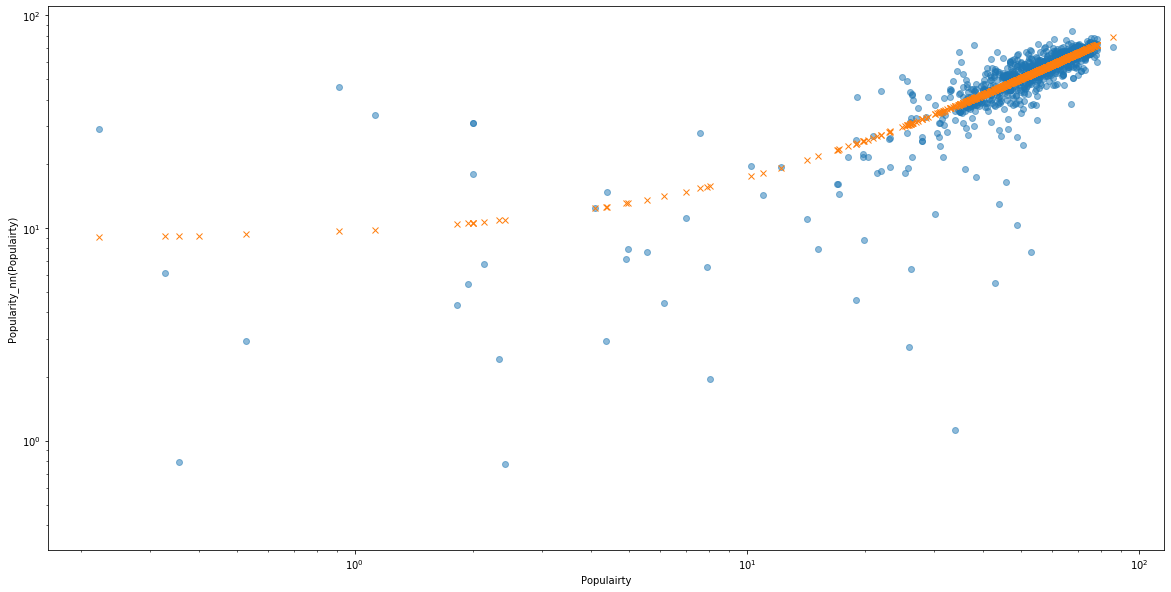

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Pop EDM


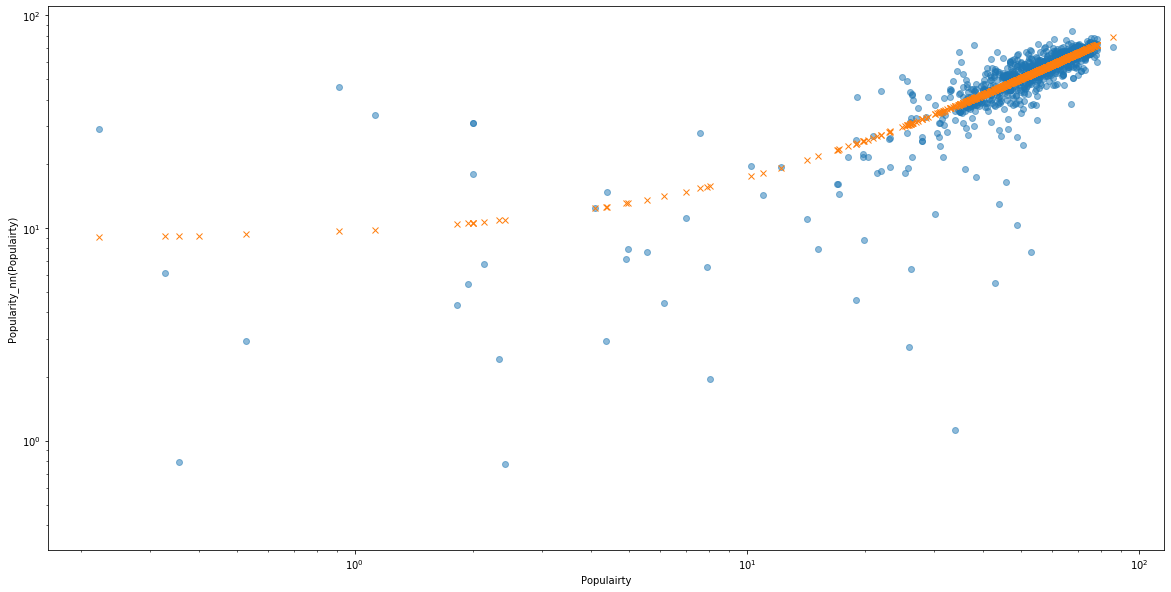

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Pop Classical


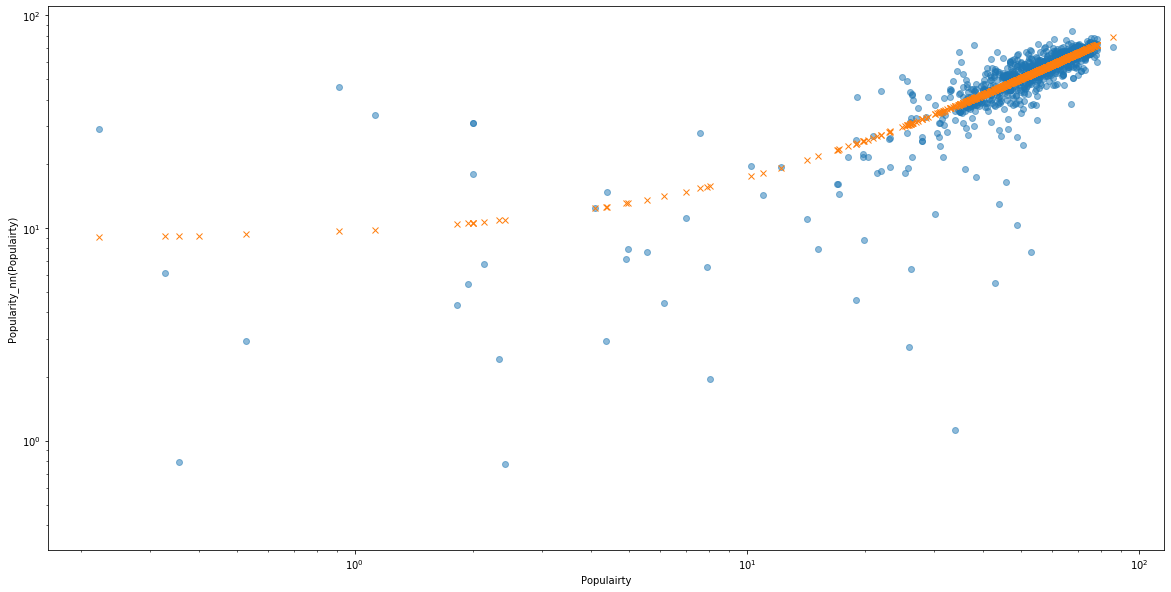

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Pop Rock


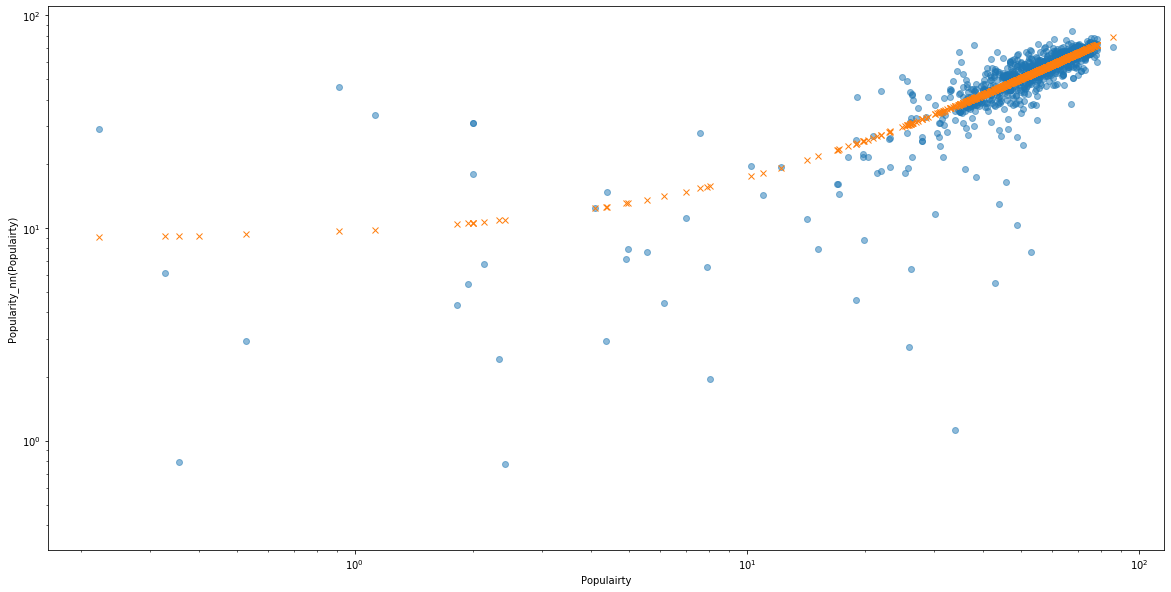

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Pop Hip-hop


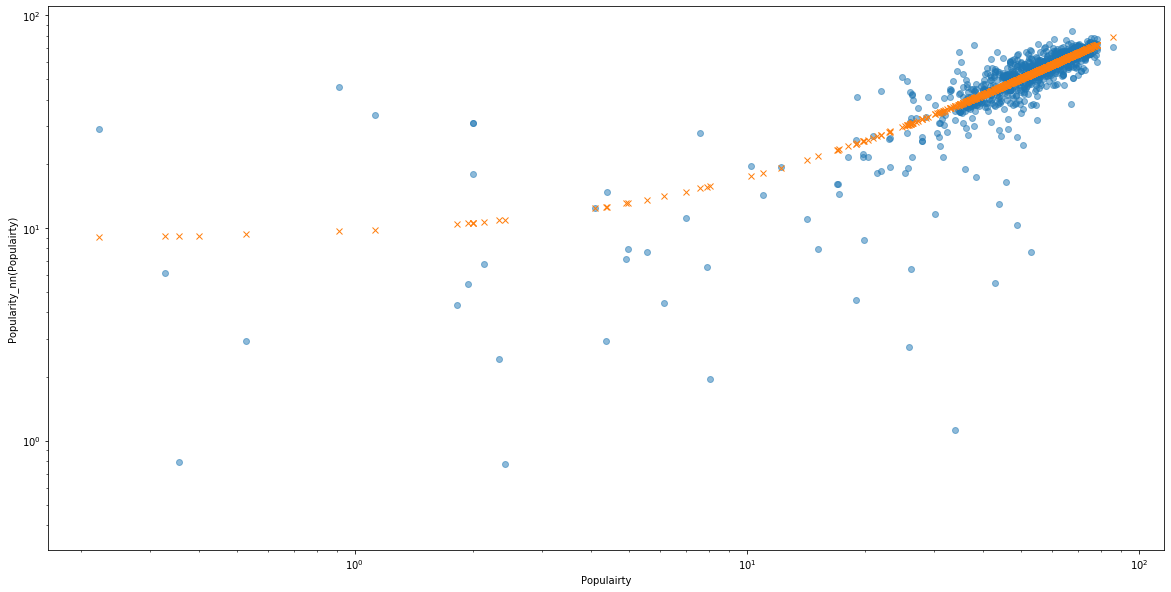

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Pop Rap


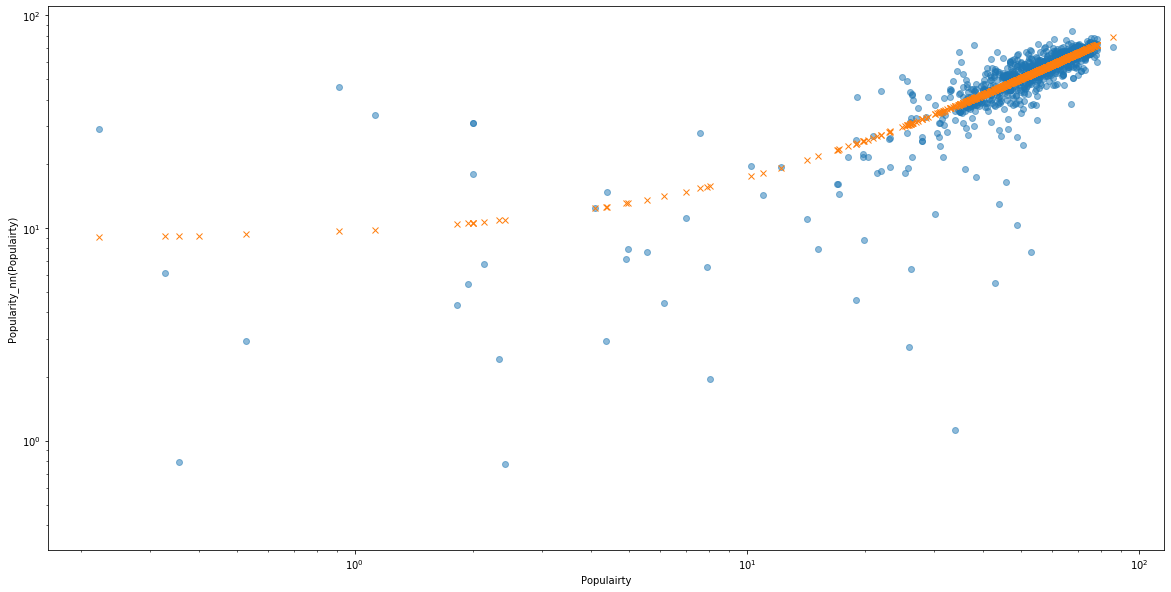

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Pop R&B


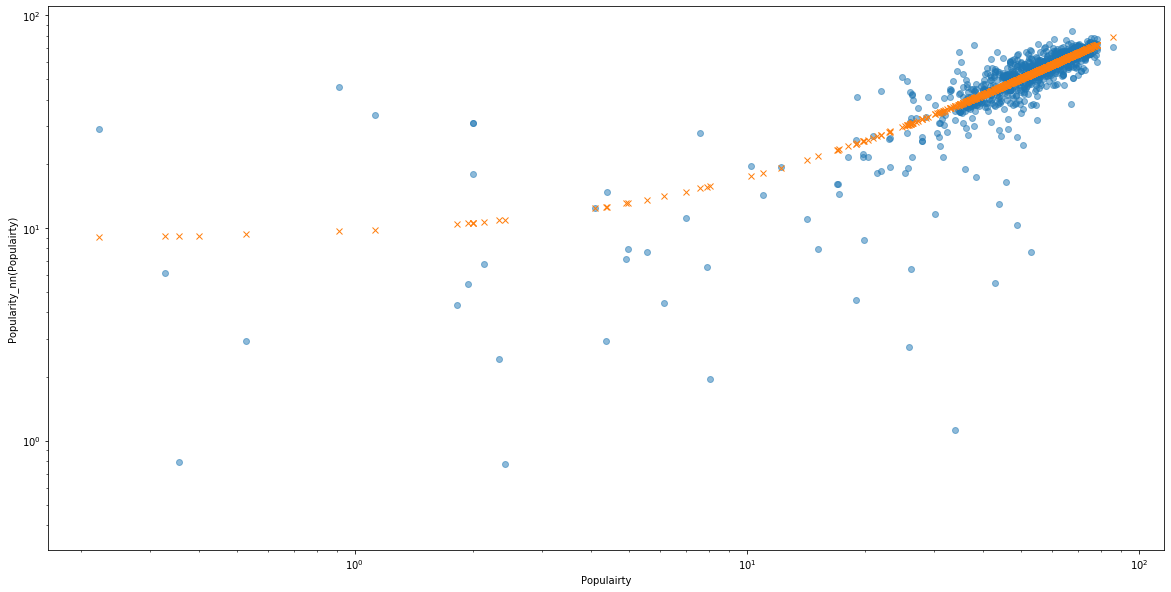

Correlation exponent and intercept:  -0.0004249308959485205 0.8506657574277164 8.851894017584325
Populairty correlation between genre groups:  Country Indie


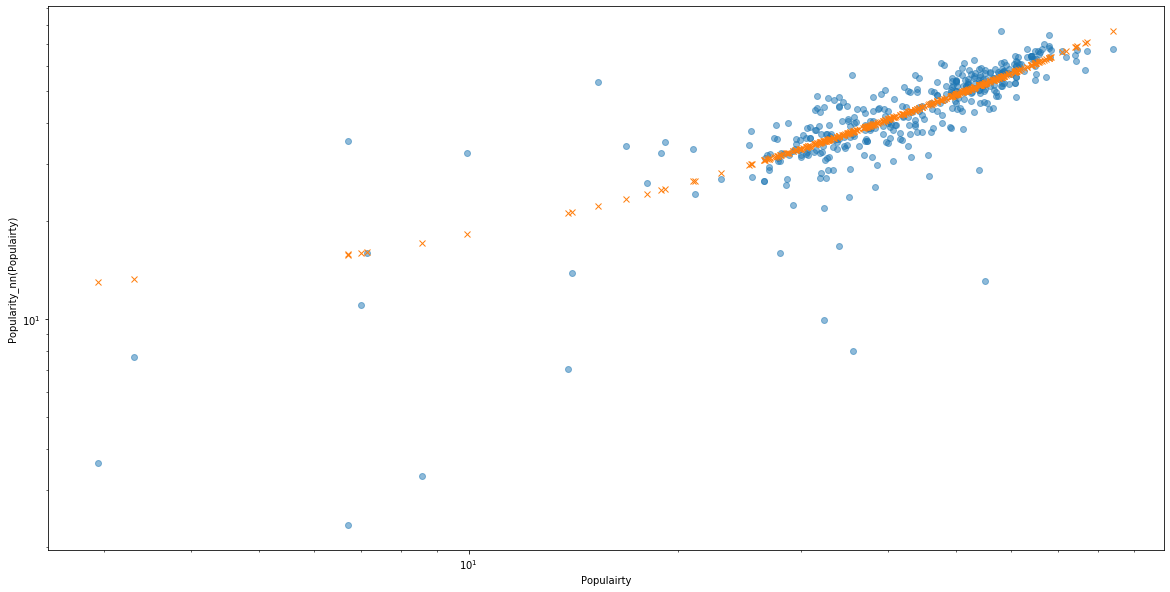

Correlation exponent and intercept:  0.0005557578259500657 0.7342585311798036 10.847192531972002
Populairty correlation between genre groups:  Country Oldies


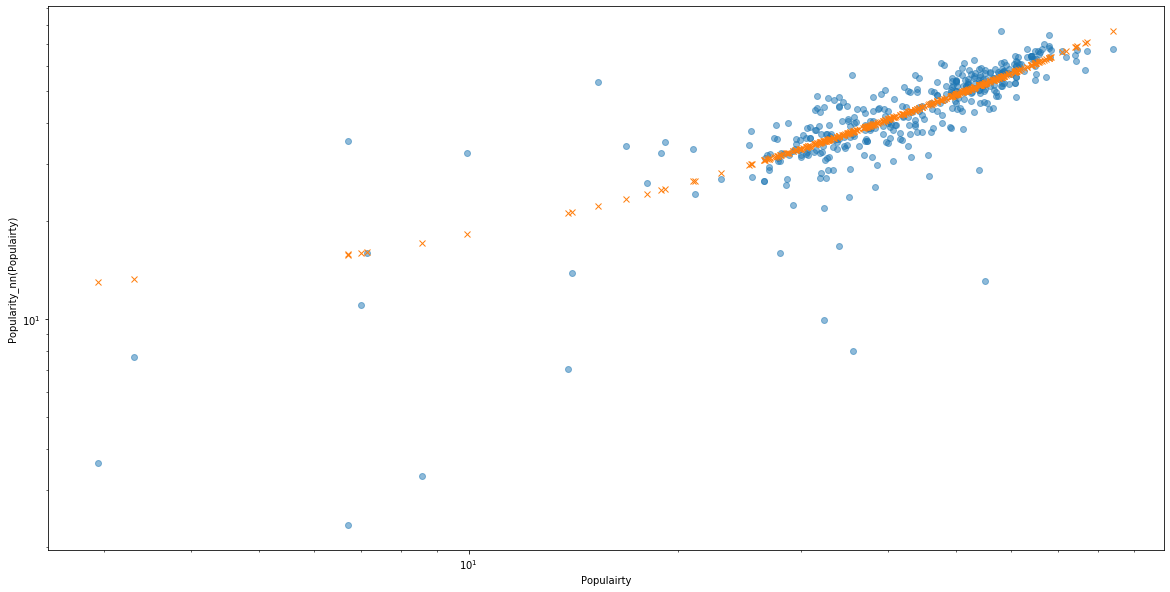

Correlation exponent and intercept:  0.0005557578259500657 0.7342585311798036 10.847192531972002
Populairty correlation between genre groups:  Country EDM


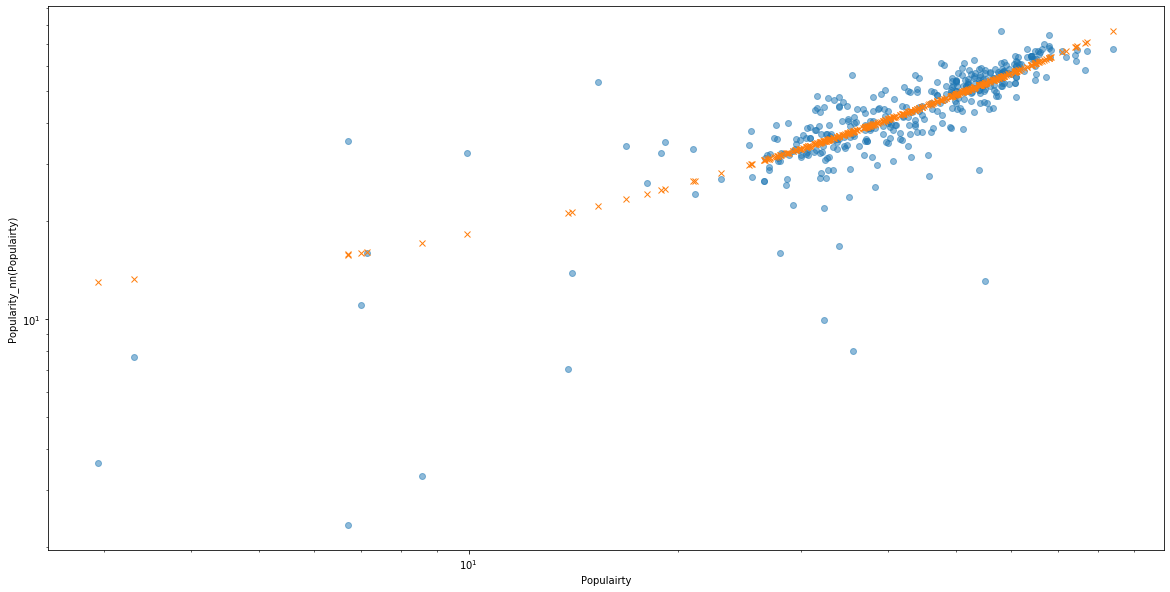

Correlation exponent and intercept:  0.0005557578259500657 0.7342585311798036 10.847192531972002
Populairty correlation between genre groups:  Country Classical


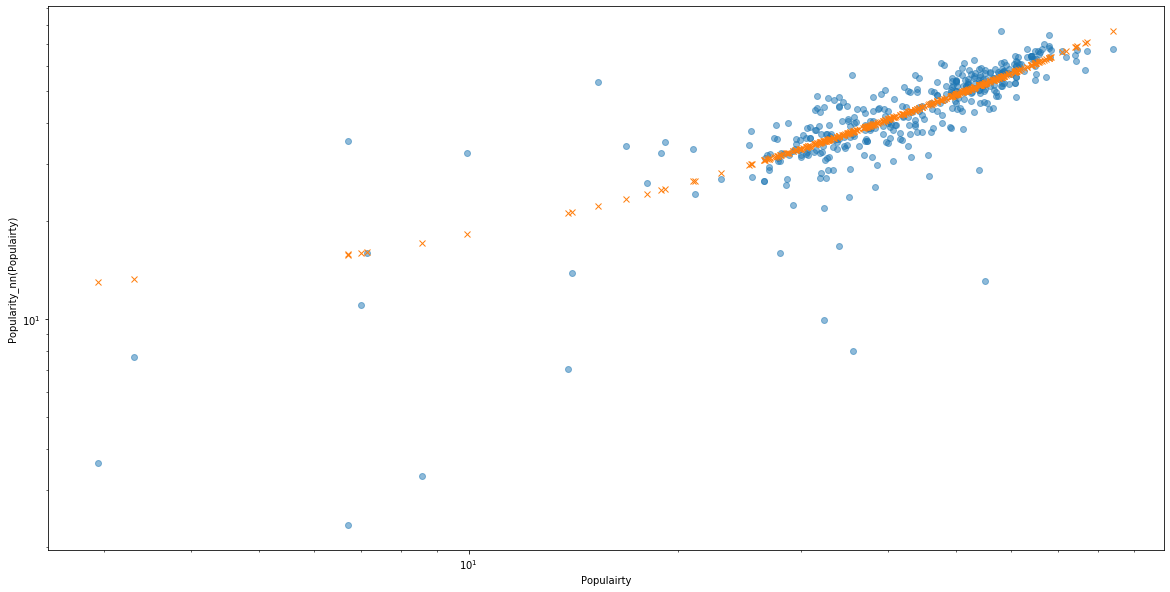

Correlation exponent and intercept:  0.0005557578259500657 0.7342585311798036 10.847192531972002
Populairty correlation between genre groups:  Country Rock


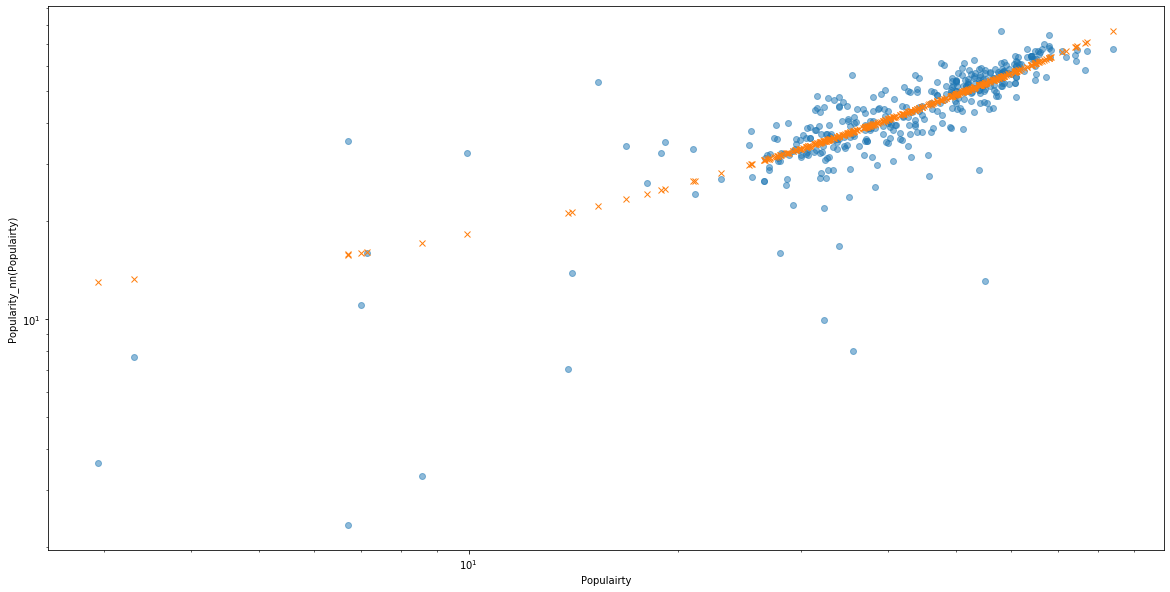

Correlation exponent and intercept:  0.0005557578259500657 0.7342585311798036 10.847192531972002
Populairty correlation between genre groups:  Country Hip-hop


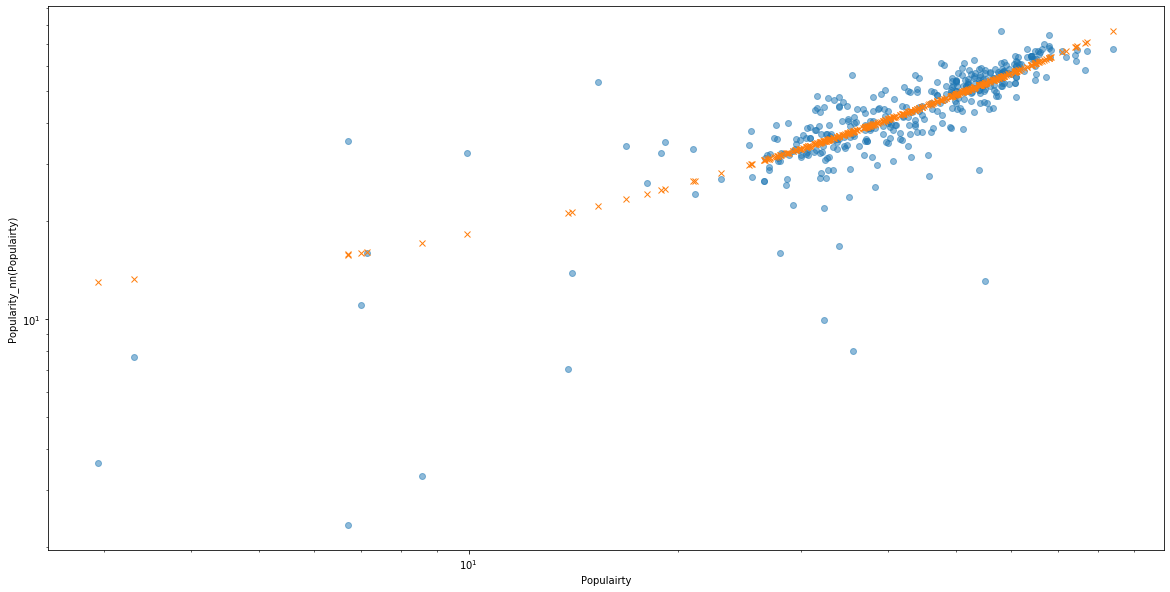

Correlation exponent and intercept:  0.0005557578259500657 0.7342585311798036 10.847192531972002
Populairty correlation between genre groups:  Country Rap


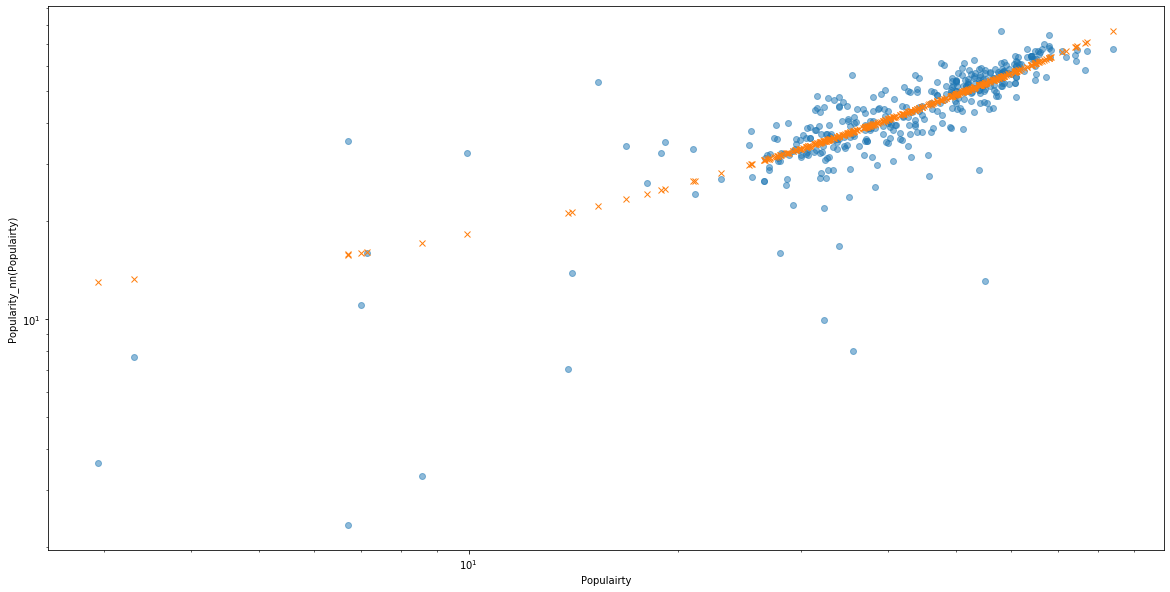

Correlation exponent and intercept:  0.0005557578259500657 0.7342585311798036 10.847192531972002
Populairty correlation between genre groups:  Country R&B


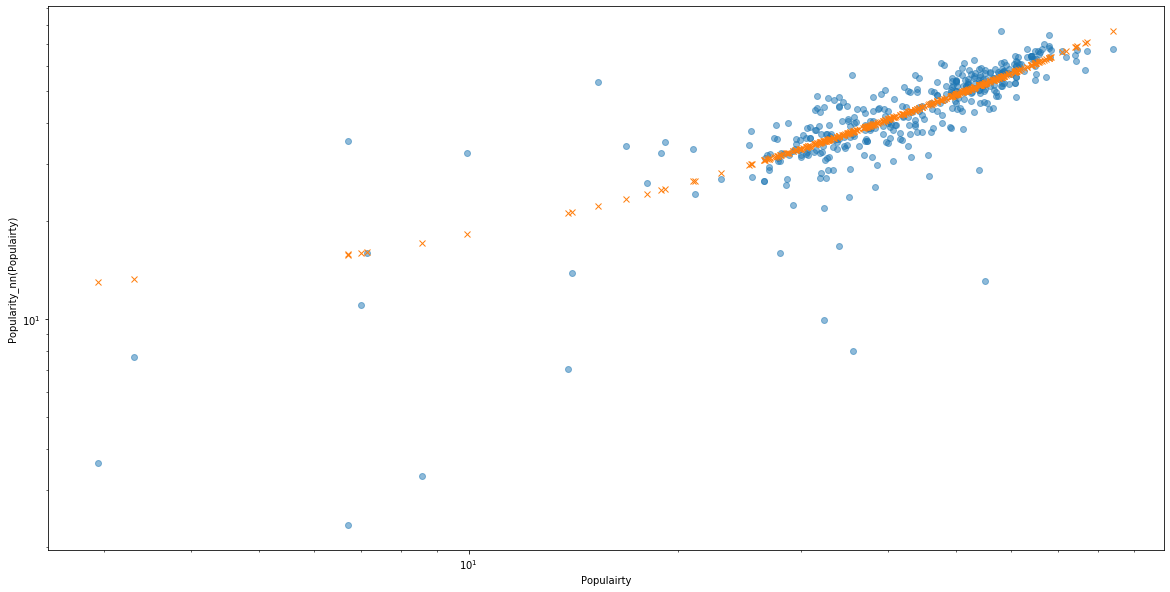

Correlation exponent and intercept:  0.0005557578259500657 0.7342585311798036 10.847192531972002
Populairty correlation between genre groups:  Indie Oldies


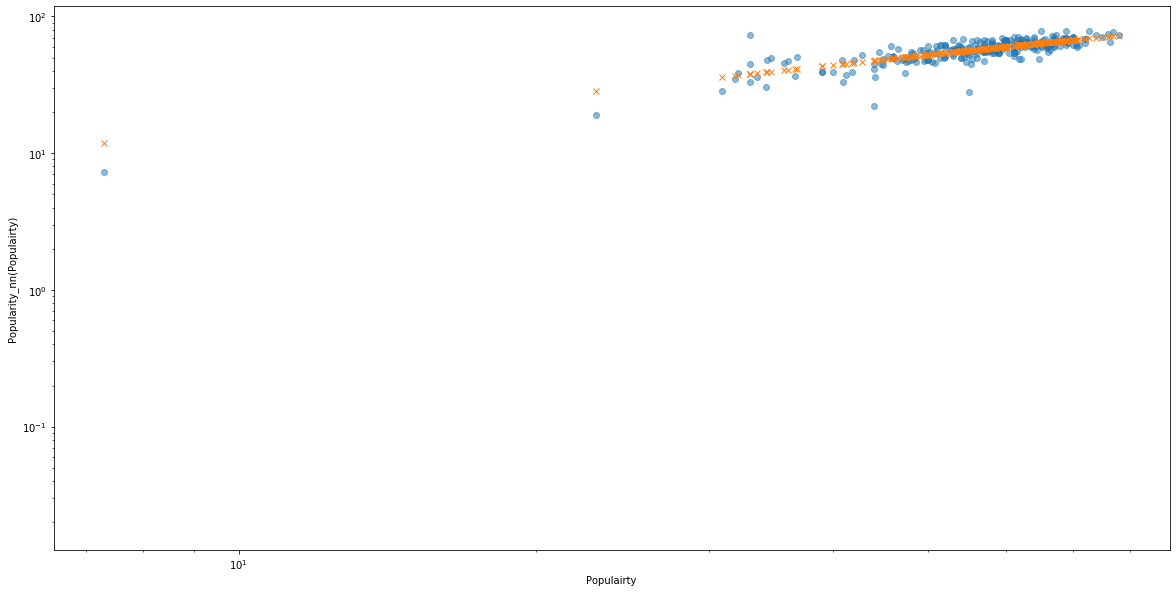

Correlation exponent and intercept:  -0.0034368497435773764 1.1472344809368071 3.6986934237748734
Populairty correlation between genre groups:  Indie EDM


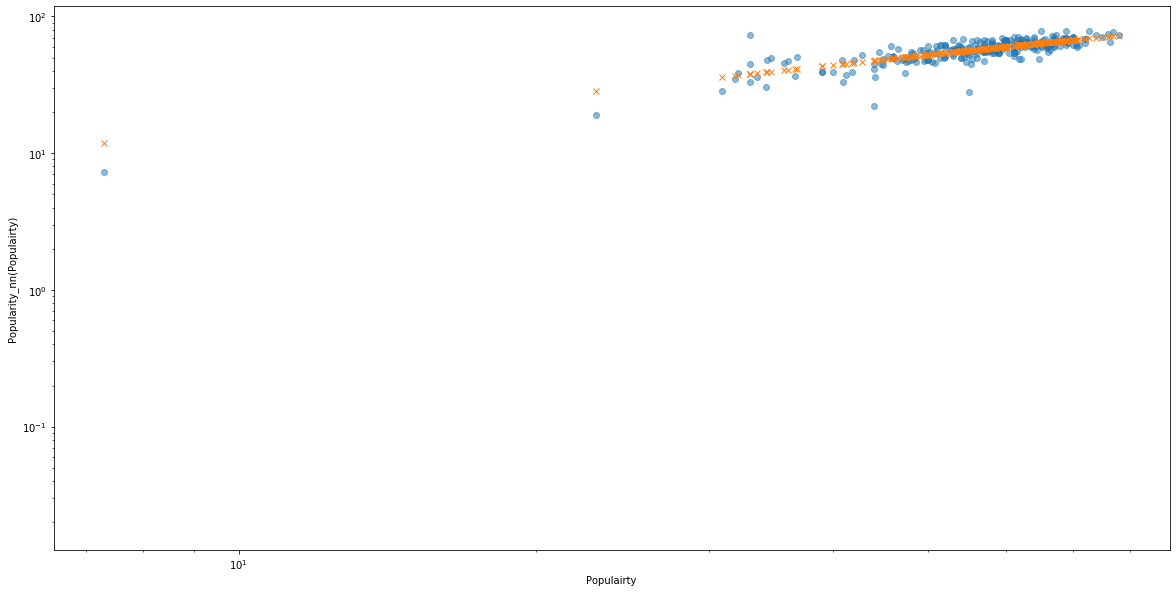

Correlation exponent and intercept:  -0.0034368497435773764 1.1472344809368071 3.6986934237748734
Populairty correlation between genre groups:  Indie Classical


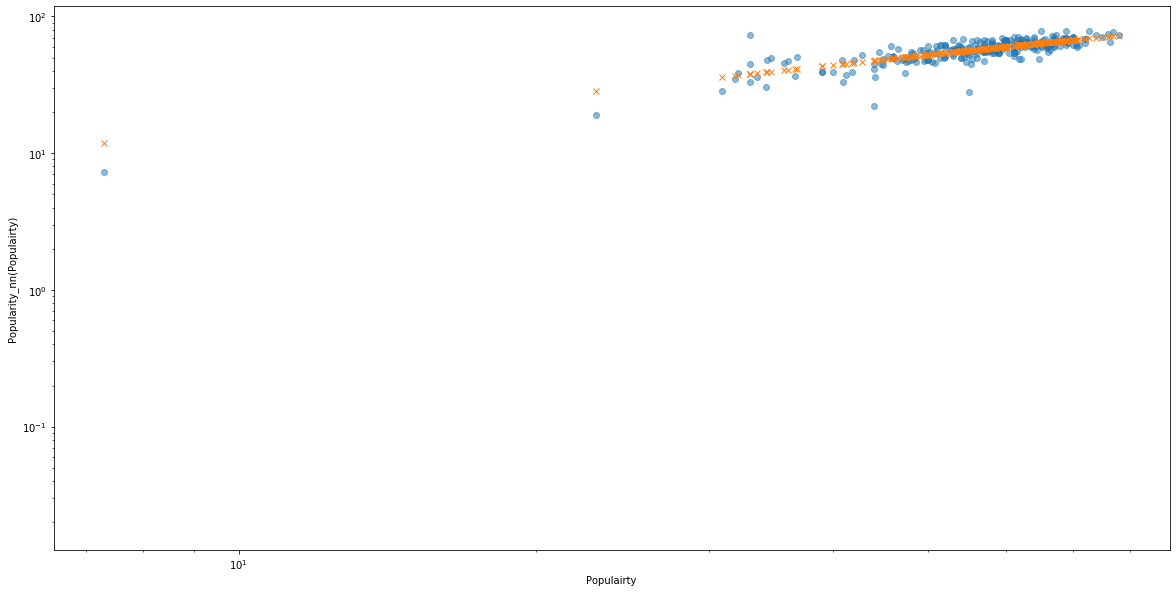

Correlation exponent and intercept:  -0.0034368497435773764 1.1472344809368071 3.6986934237748734
Populairty correlation between genre groups:  Indie Rock


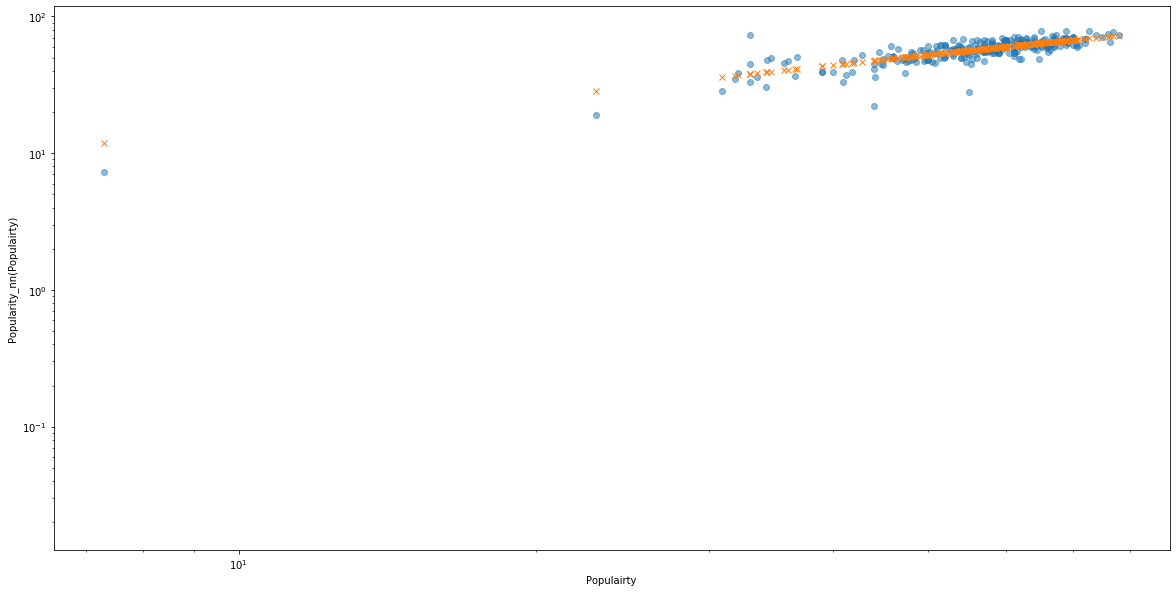

Correlation exponent and intercept:  -0.0034368497435773764 1.1472344809368071 3.6986934237748734
Populairty correlation between genre groups:  Indie Hip-hop


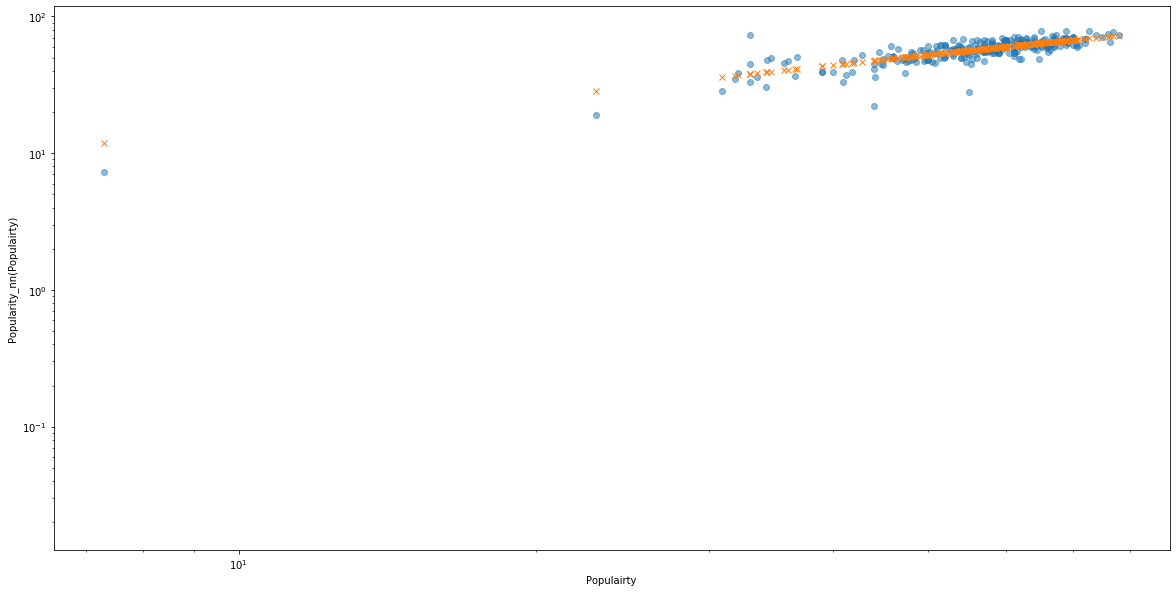

Correlation exponent and intercept:  -0.0034368497435773764 1.1472344809368071 3.6986934237748734
Populairty correlation between genre groups:  Indie Rap


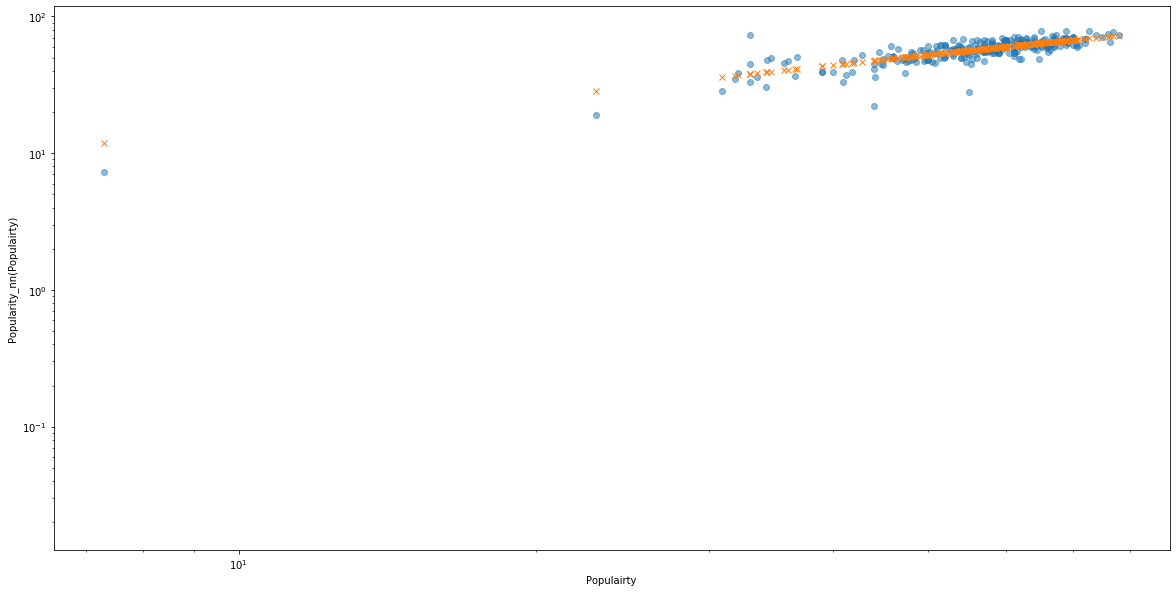

Correlation exponent and intercept:  -0.0034368497435773764 1.1472344809368071 3.6986934237748734
Populairty correlation between genre groups:  Indie R&B


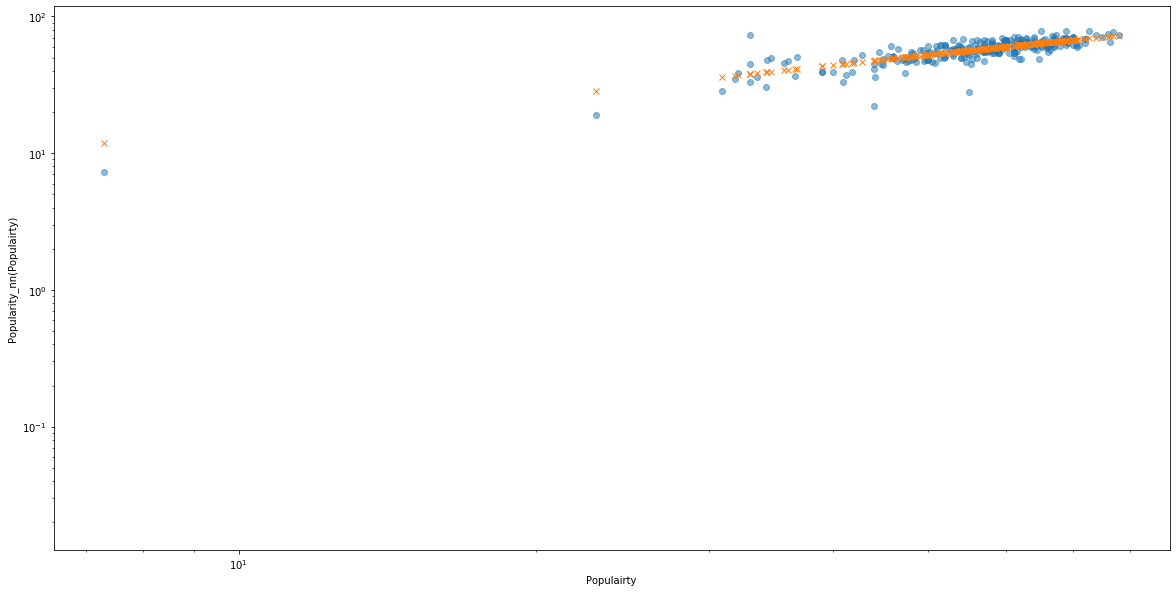

Correlation exponent and intercept:  -0.0034368497435773764 1.1472344809368071 3.6986934237748734
Populairty correlation between genre groups:  Oldies EDM


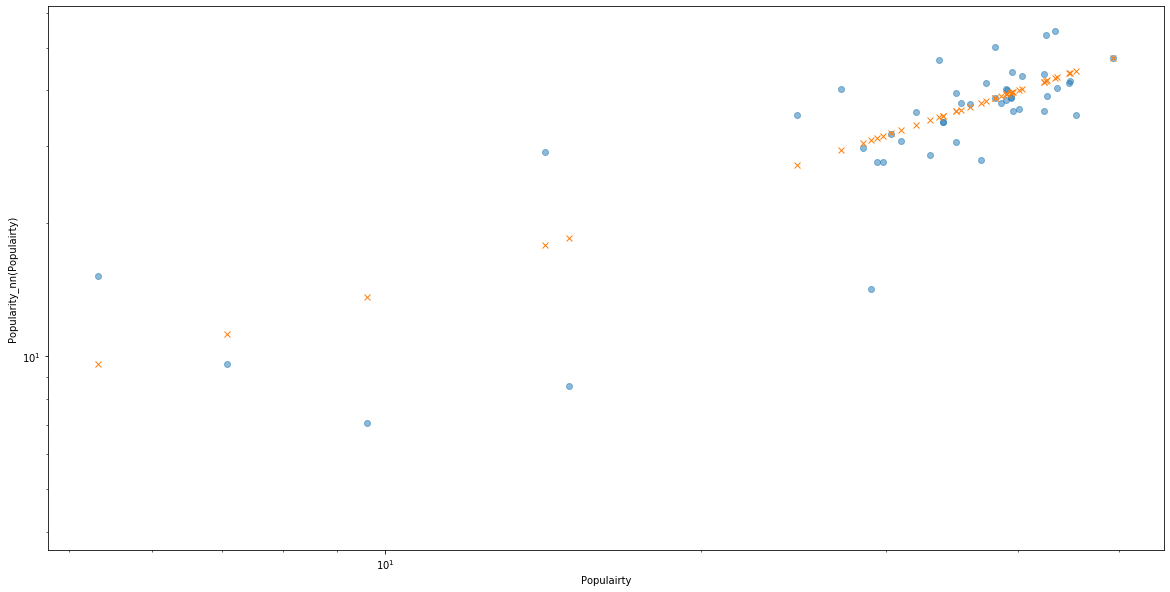

Correlation exponent and intercept:  -0.002137033945450929 0.9727073597597136 4.487930076168761
Populairty correlation between genre groups:  Oldies Classical


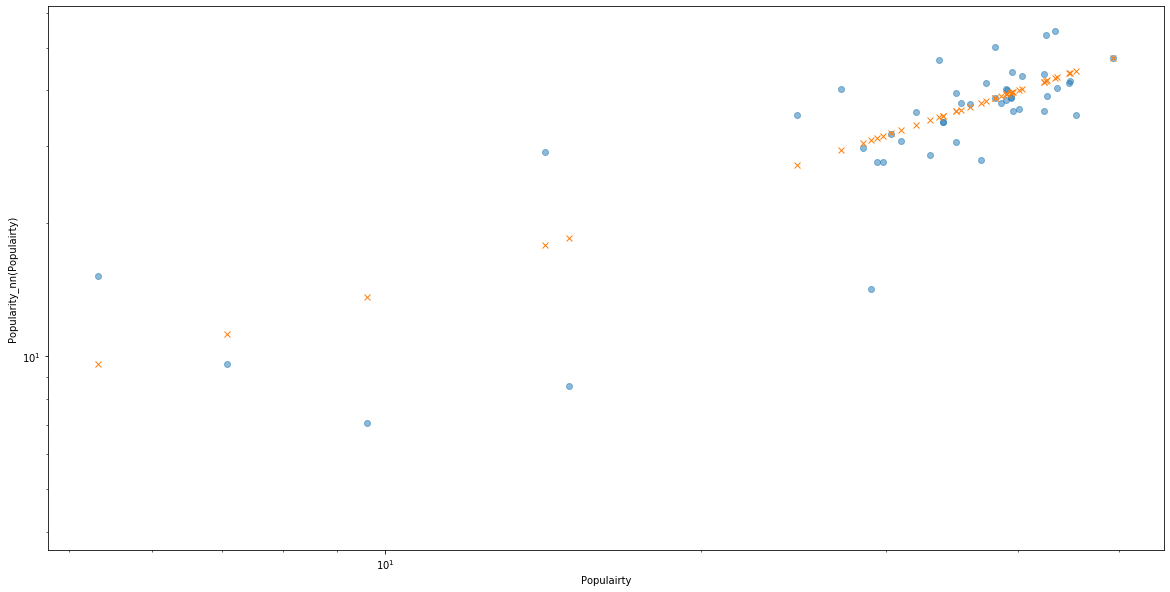

Correlation exponent and intercept:  -0.002137033945450929 0.9727073597597136 4.487930076168761
Populairty correlation between genre groups:  Oldies Rock


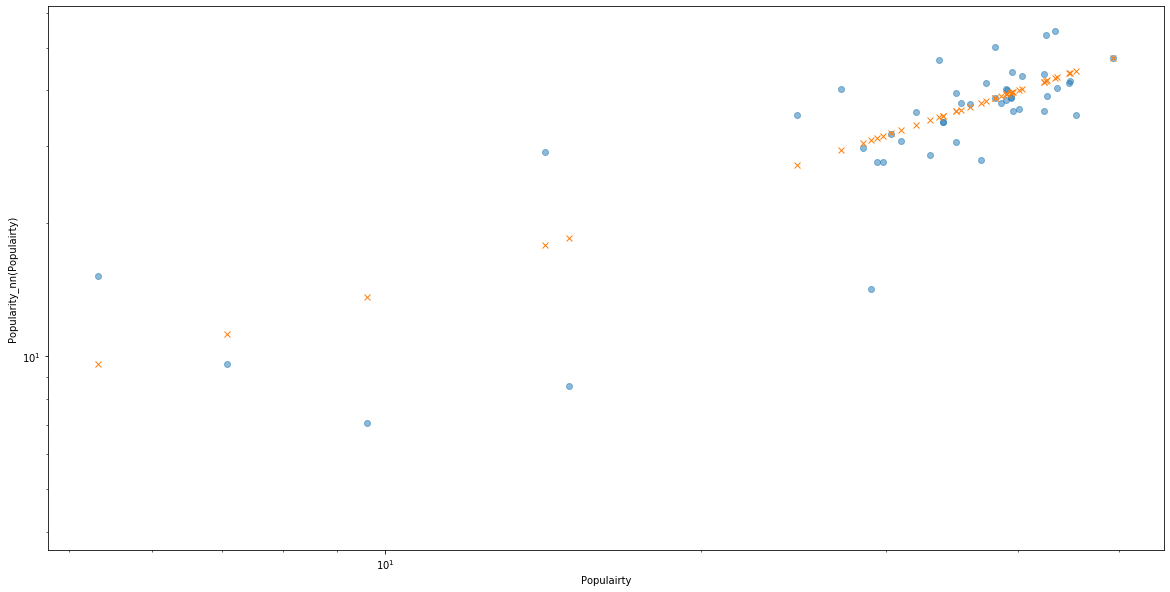

Correlation exponent and intercept:  -0.002137033945450929 0.9727073597597136 4.487930076168761
Populairty correlation between genre groups:  Oldies Hip-hop


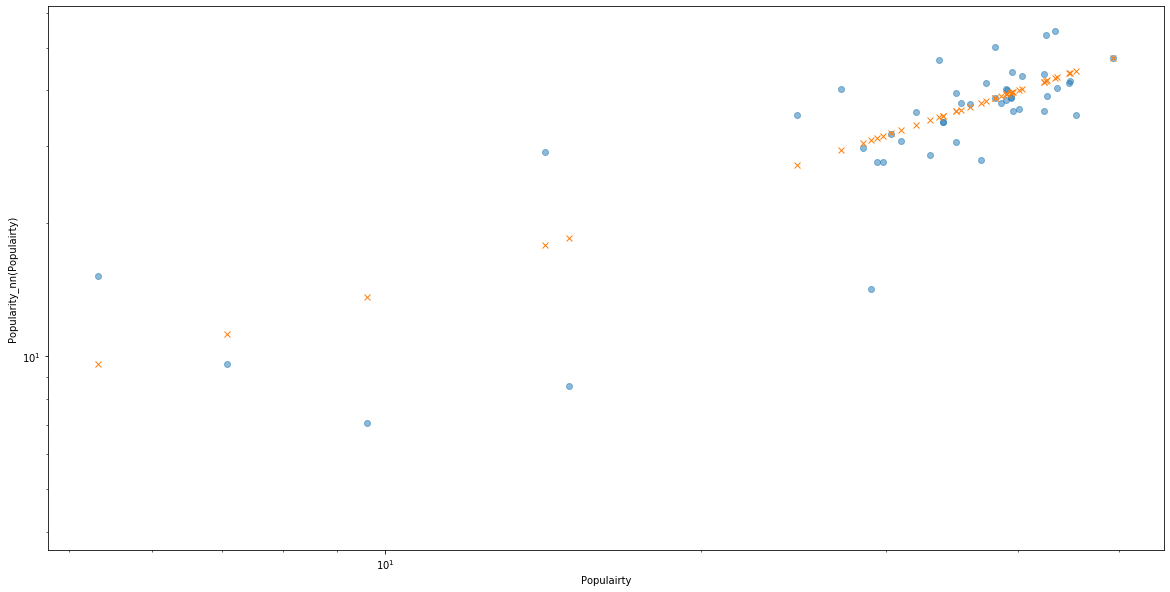

Correlation exponent and intercept:  -0.002137033945450929 0.9727073597597136 4.487930076168761
Populairty correlation between genre groups:  Oldies Rap


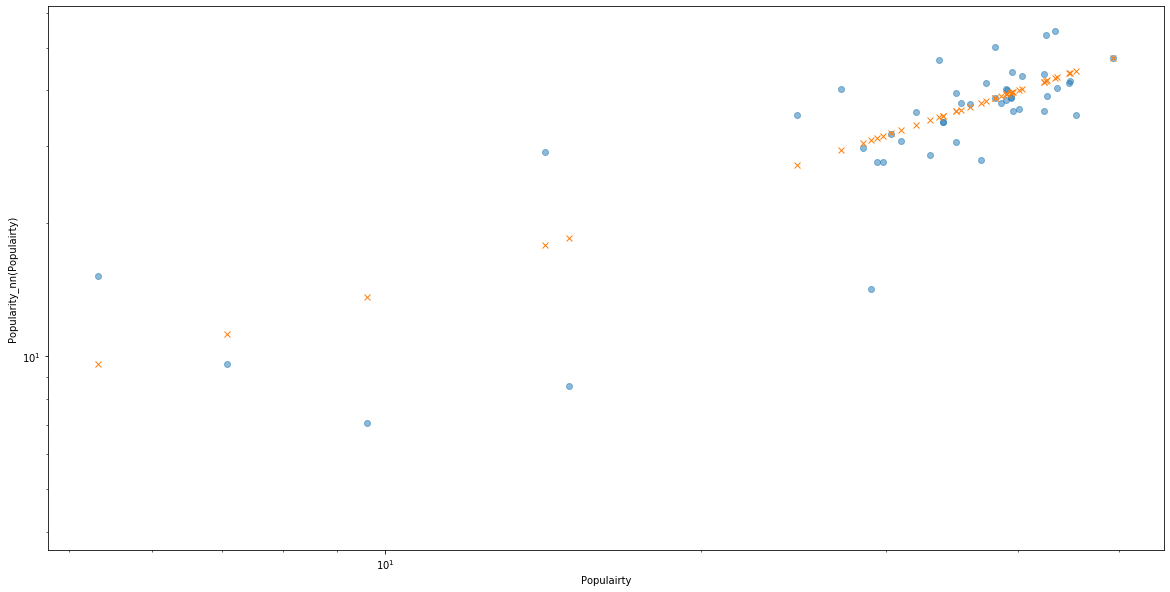

Correlation exponent and intercept:  -0.002137033945450929 0.9727073597597136 4.487930076168761
Populairty correlation between genre groups:  Oldies R&B


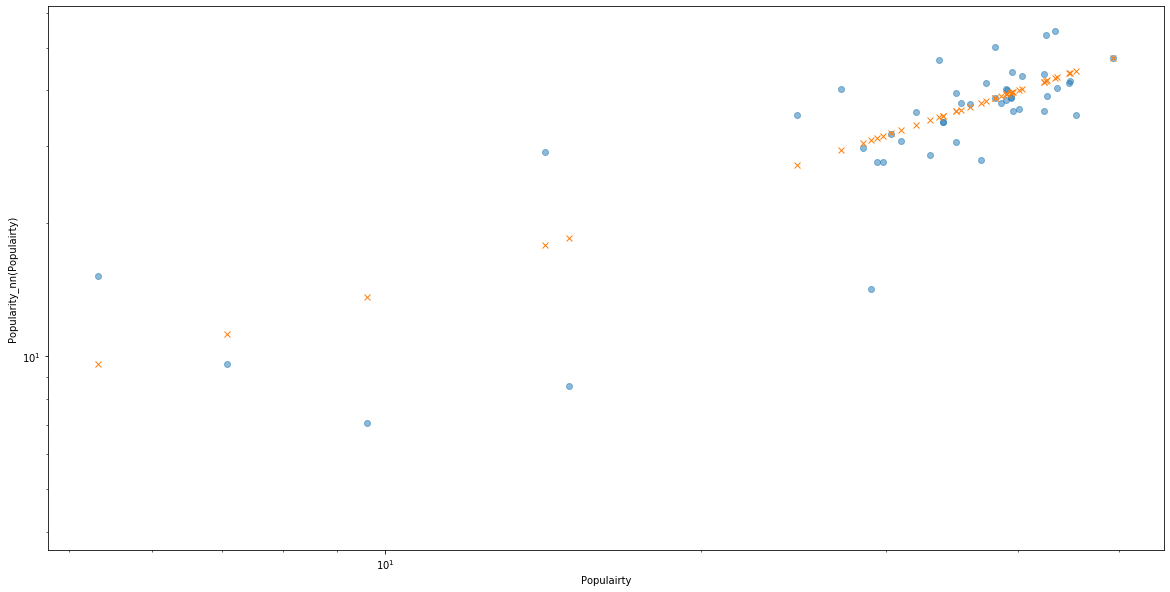

Correlation exponent and intercept:  -0.002137033945450929 0.9727073597597136 4.487930076168761
Populairty correlation between genre groups:  EDM Classical


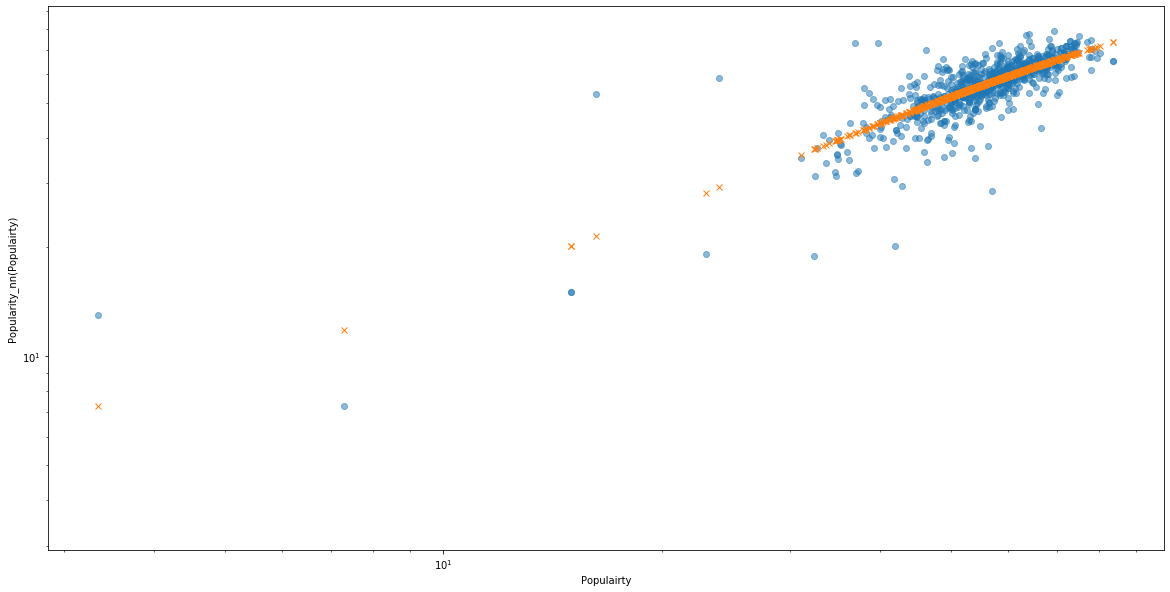

Correlation exponent and intercept:  -0.004022771061801786 1.1746541757558948 3.412527228339819
Populairty correlation between genre groups:  EDM Rock


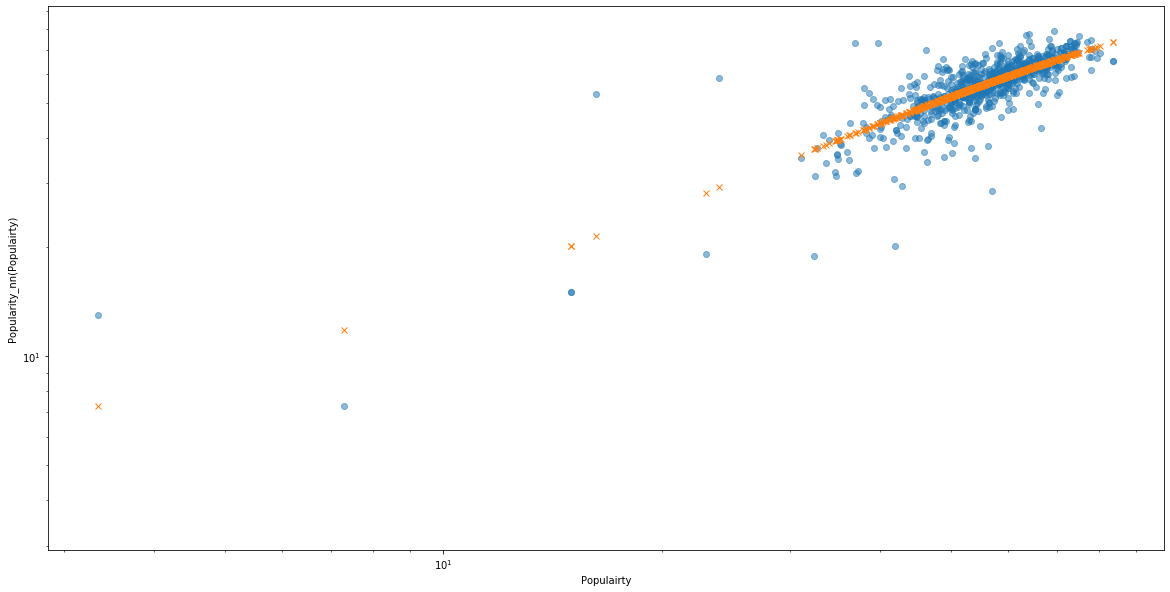

Correlation exponent and intercept:  -0.004022771061801786 1.1746541757558948 3.412527228339819
Populairty correlation between genre groups:  EDM Hip-hop


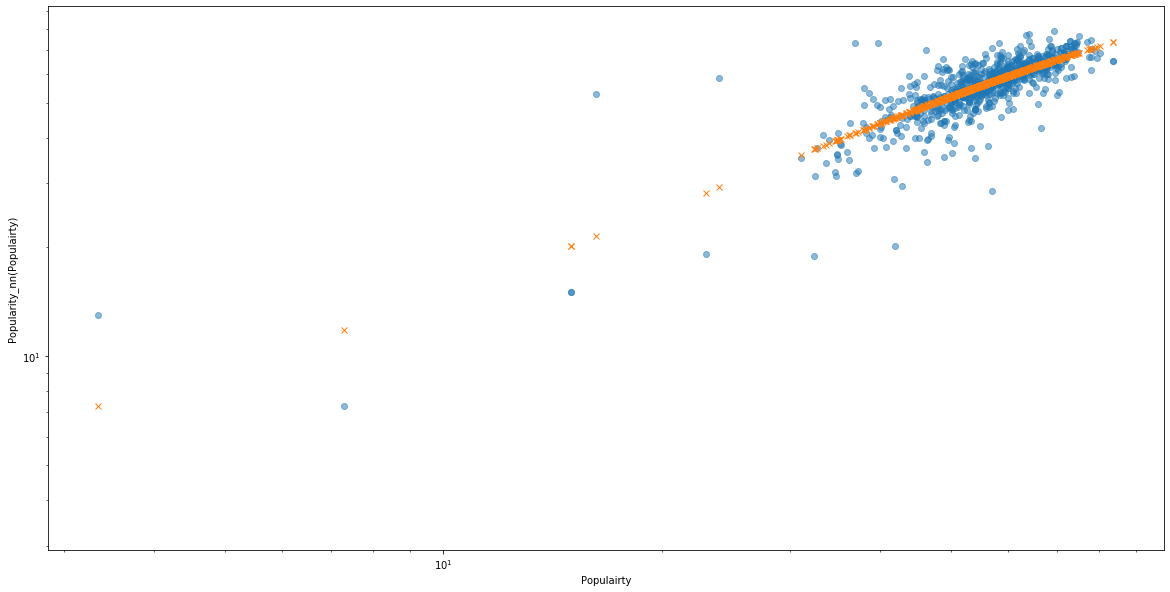

Correlation exponent and intercept:  -0.004022771061801786 1.1746541757558948 3.412527228339819
Populairty correlation between genre groups:  EDM Rap


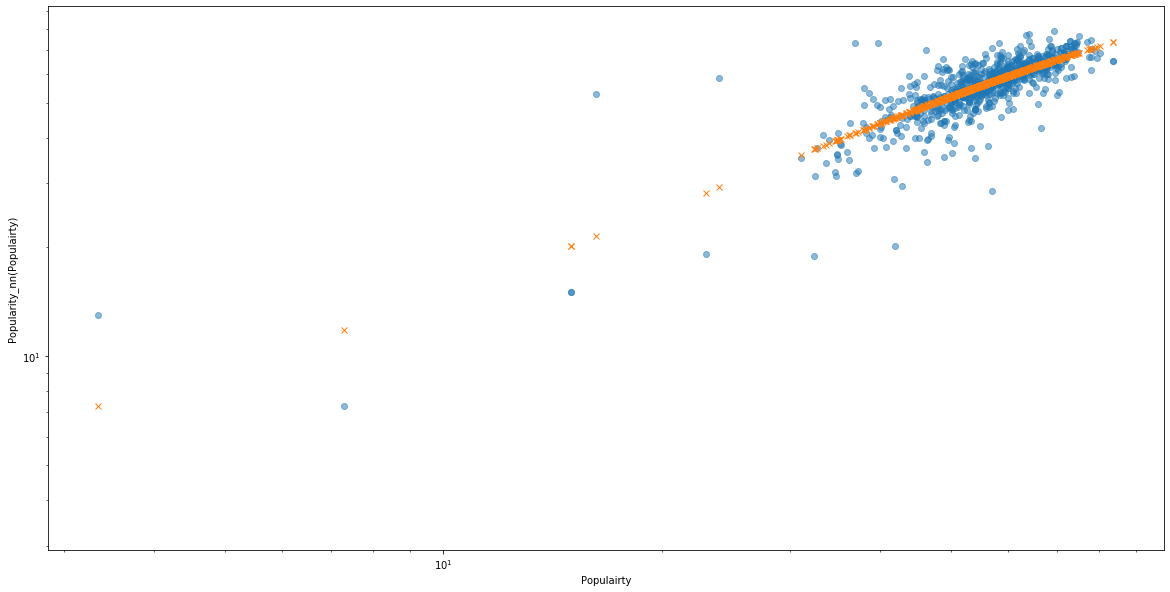

Correlation exponent and intercept:  -0.004022771061801786 1.1746541757558948 3.412527228339819
Populairty correlation between genre groups:  EDM R&B


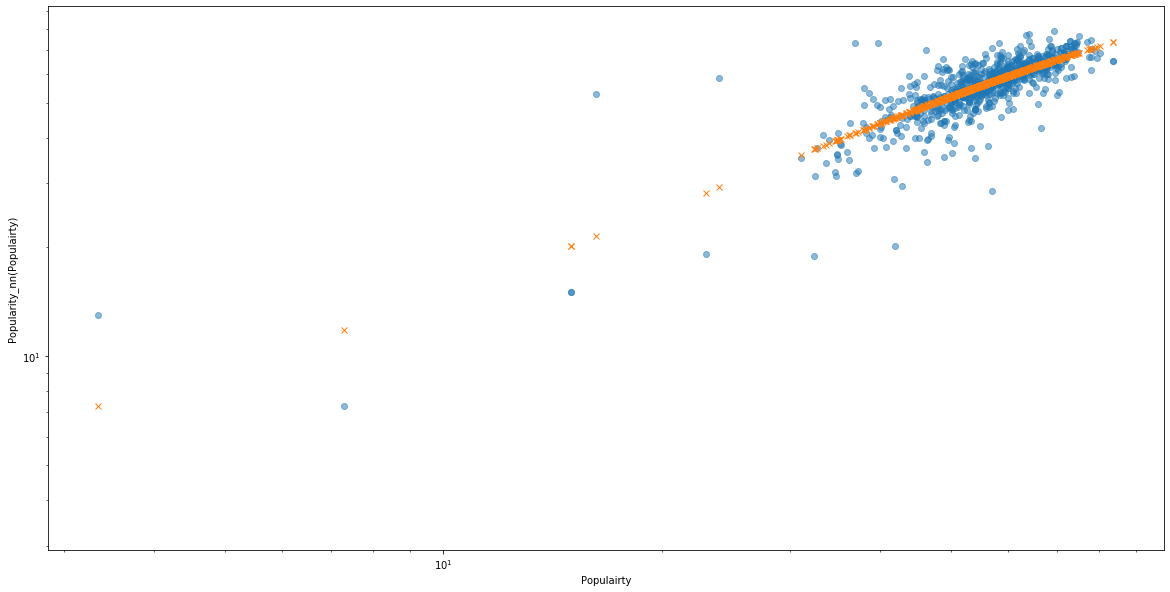

Correlation exponent and intercept:  -0.004022771061801786 1.1746541757558948 3.412527228339819
Populairty correlation between genre groups:  Classical Rock


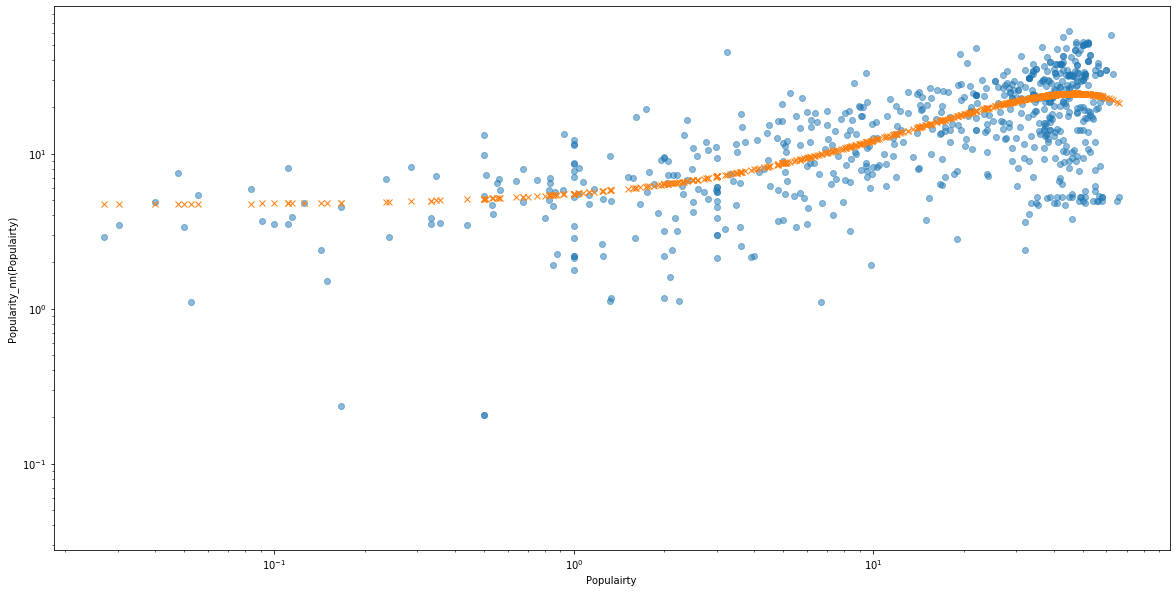

Correlation exponent and intercept:  -0.008920119063398818 0.839693116862924 4.698463599375539
Populairty correlation between genre groups:  Classical Hip-hop


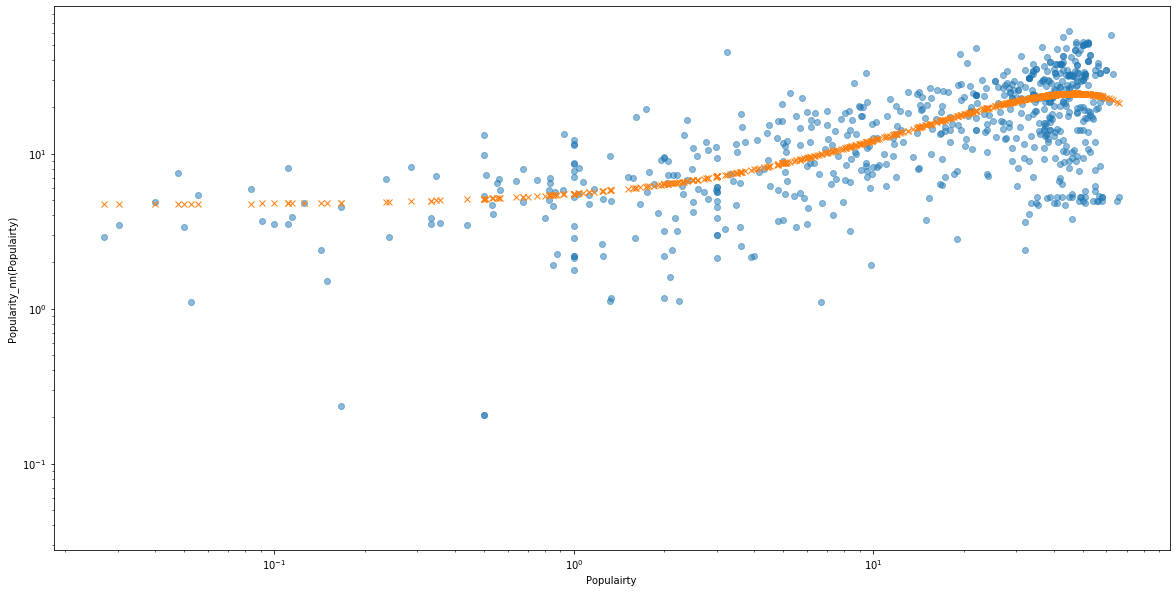

Correlation exponent and intercept:  -0.008920119063398818 0.839693116862924 4.698463599375539
Populairty correlation between genre groups:  Classical Rap


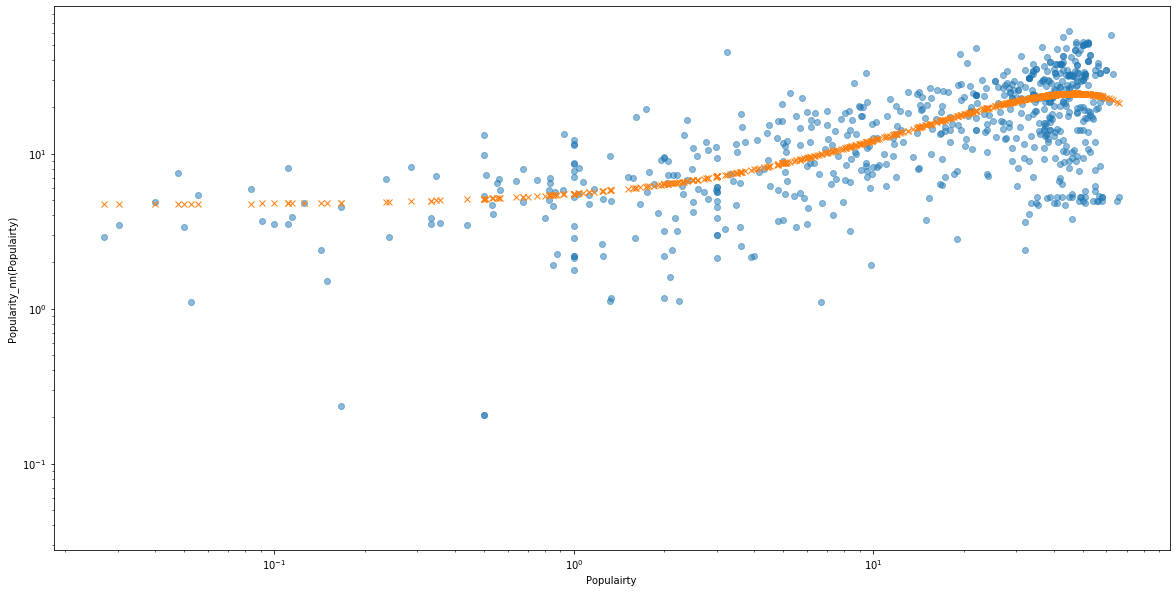

Correlation exponent and intercept:  -0.008920119063398818 0.839693116862924 4.698463599375539
Populairty correlation between genre groups:  Classical R&B


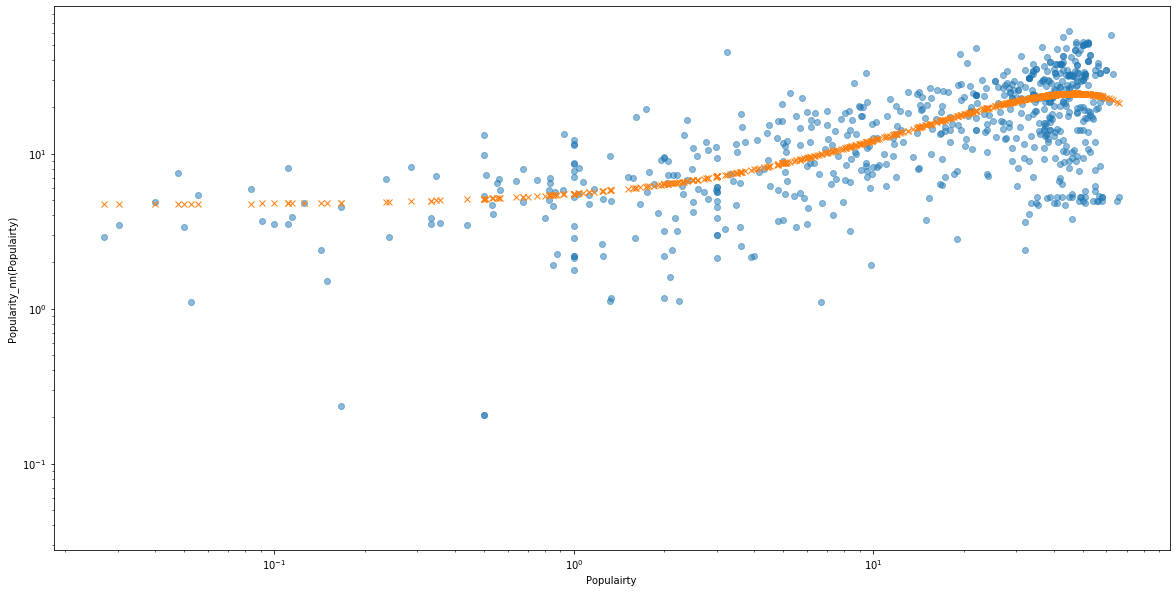

Correlation exponent and intercept:  -0.008920119063398818 0.839693116862924 4.698463599375539
Populairty correlation between genre groups:  Rock Hip-hop


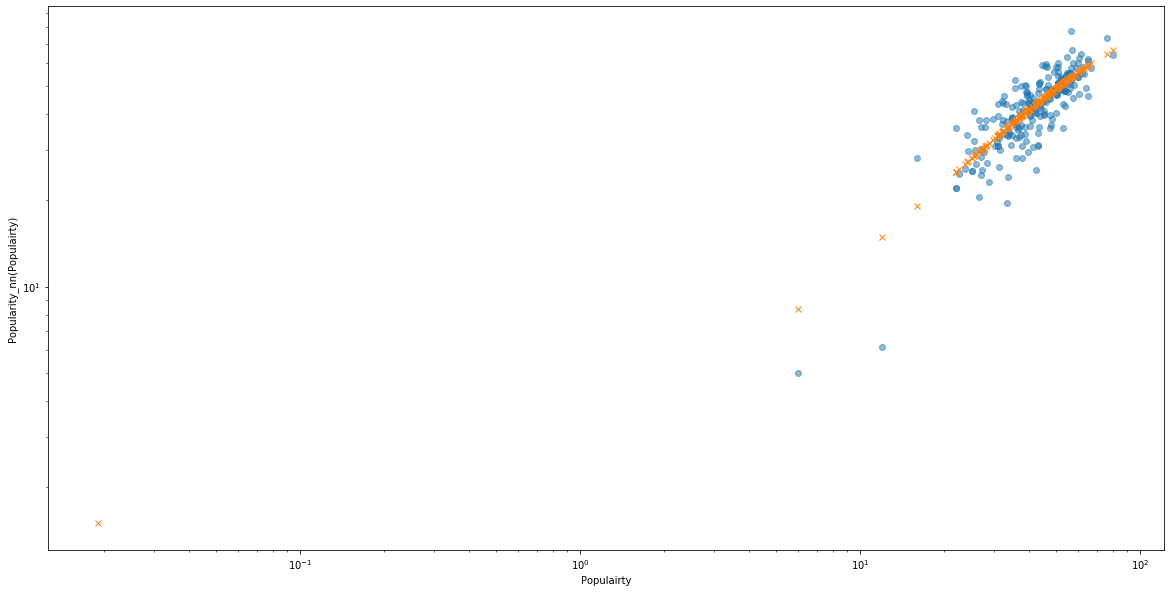

Correlation exponent and intercept:  -0.004508632454794755 1.1756486067876588 1.4771433221949783
Populairty correlation between genre groups:  Rock Rap


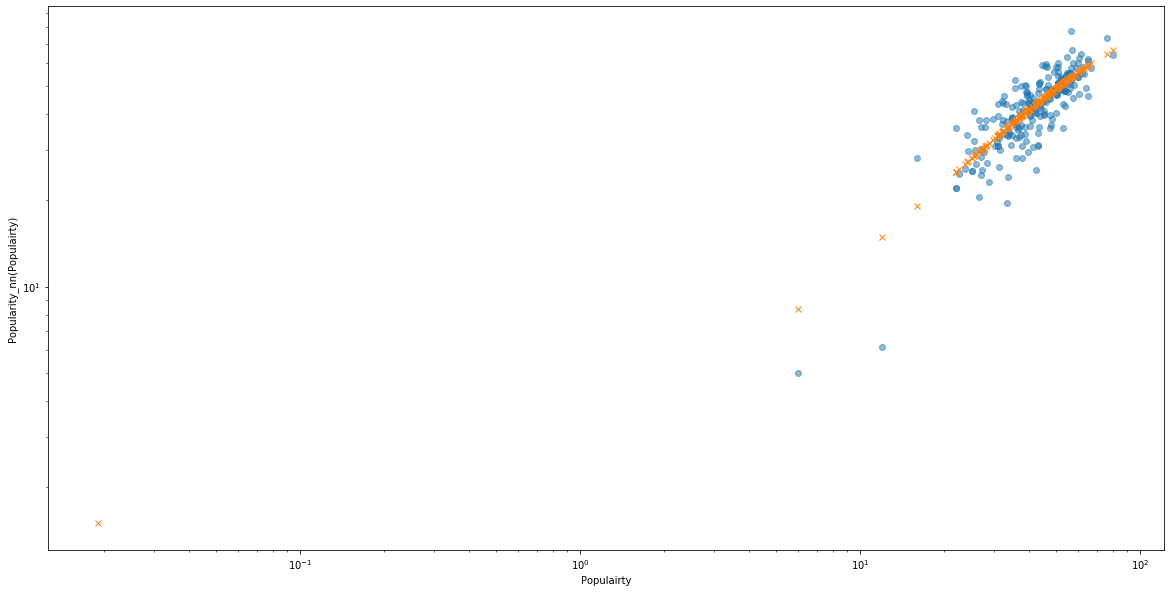

Correlation exponent and intercept:  -0.004508632454794755 1.1756486067876588 1.4771433221949783
Populairty correlation between genre groups:  Rock R&B


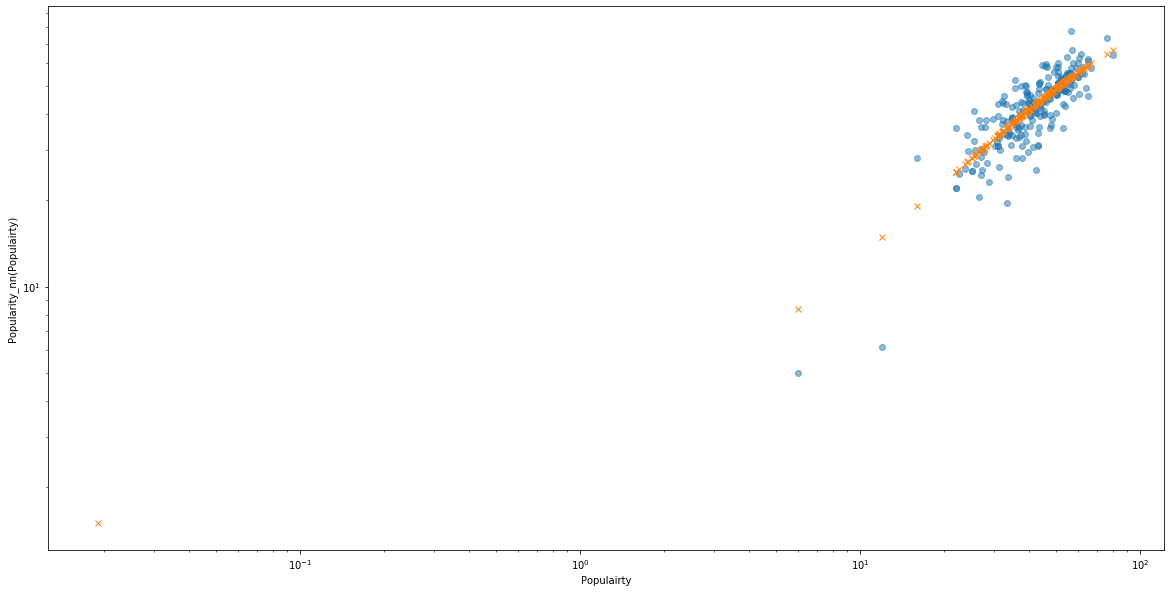

Correlation exponent and intercept:  -0.004508632454794755 1.1756486067876588 1.4771433221949783
Populairty correlation between genre groups:  Hip-hop Rap


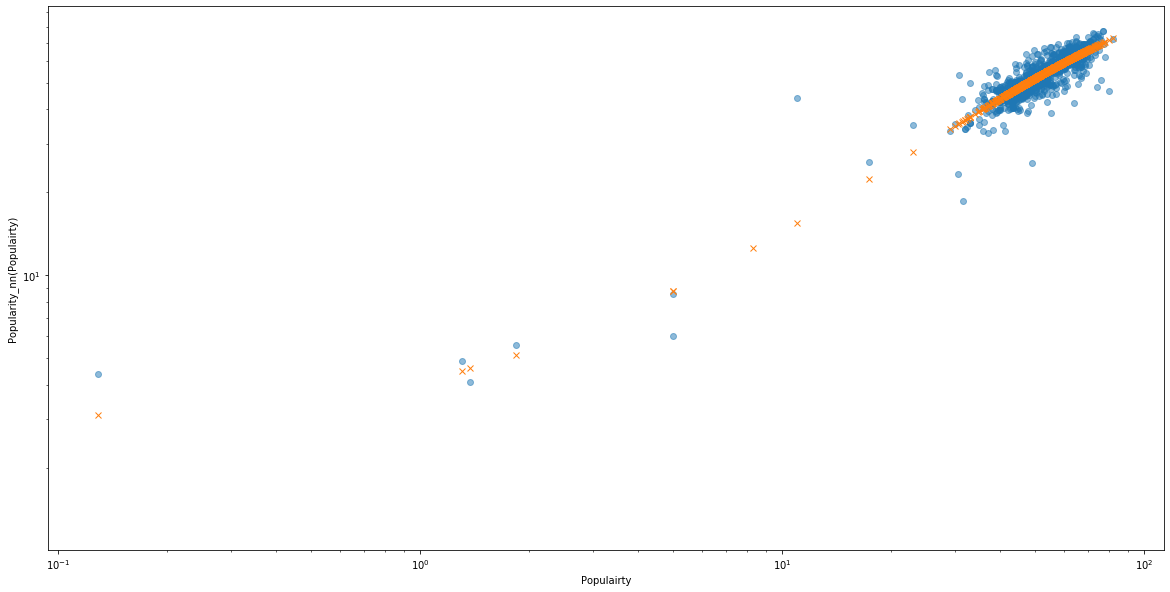

Correlation exponent and intercept:  -0.00413875083677756 1.1868332725093325 2.9686087737308156
Populairty correlation between genre groups:  Hip-hop R&B


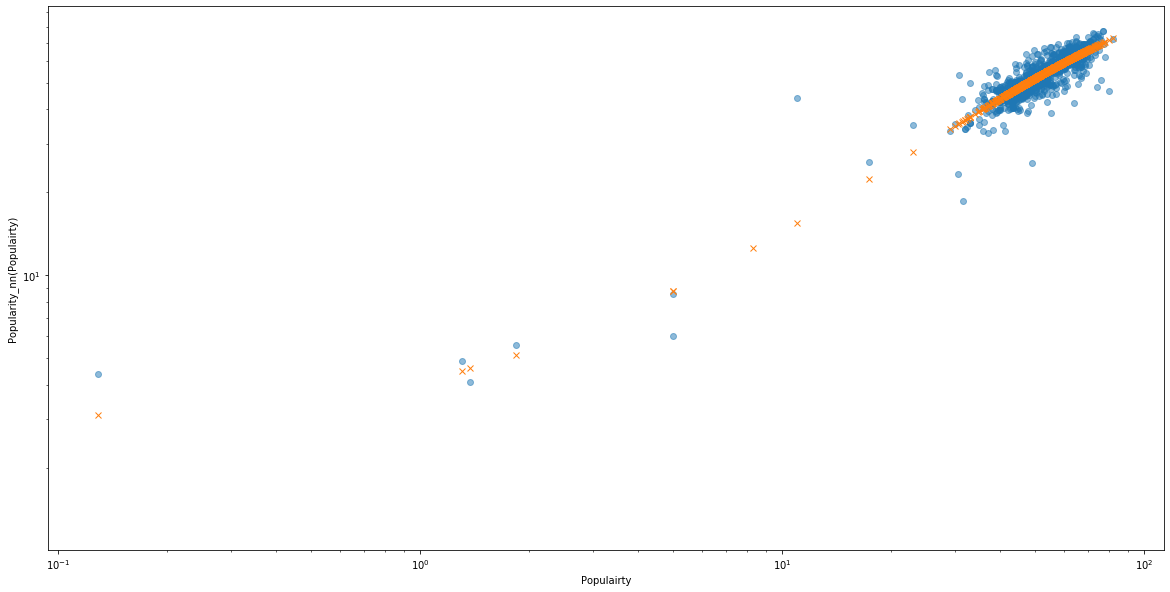

Correlation exponent and intercept:  -0.00413875083677756 1.1868332725093325 2.9686087737308156
Populairty correlation between genre groups:  Rap R&B


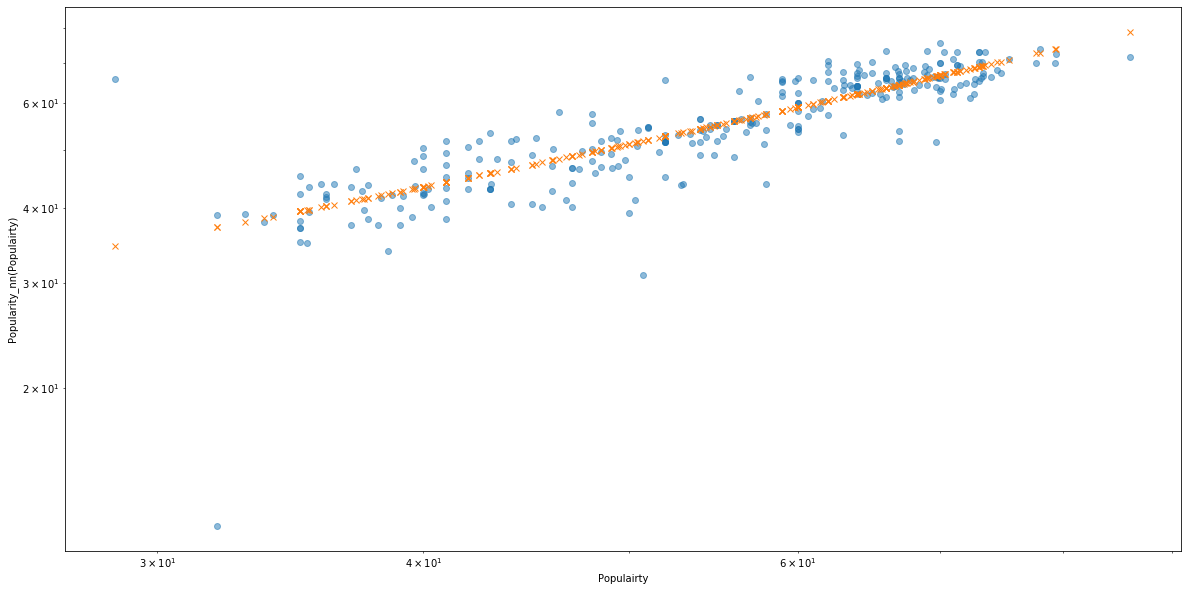

Correlation exponent and intercept:  -0.00022029037139469518 0.8010119247728821 11.700517448431507


In [40]:
for i, j in itertools.combinations(distinct_genres, 2):
    index_i = distinct_genres.index(i)
    index_j = distinct_genres.index(j)
    print('Populairty correlation between genre groups: ', i, j)
    try:
        populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,all_genre_groups[index_i],all_genre_groups[index_j])
    except:
        print('No collaboration found')

In [44]:
genre_same_pairs_fractional_lisk_dict = dict()

for i in distinct_genres:
    index_i = distinct_genres.index(i)
    genre_same_pairs_fractional_lisk_dict[str(i)+'-'+str(i)] = fraction_links_node_groups(G,all_genre_groups[index_i],all_genre_groups[index_i])
    #genre_pairs.append(str(i)+'-'+str(j))
    #fraction_links.append(fraction_links_node_groups(G,all_genre_groups[index_i],all_genre_groups[index_j]))
    print('Fraction of possible links for genres: ',i,i,fraction_links_node_groups(G,all_genre_groups[index_i],all_genre_groups[index_i]))

Fraction of possible links for genres:  Metal Metal 0.0028616024973985433
Fraction of possible links for genres:  Jazz Jazz 0.0030857606094813047
Fraction of possible links for genres:  Pop Pop 0.0009147300117199783
Fraction of possible links for genres:  Country Country 0.004082573784722222
Fraction of possible links for genres:  Indie Indie 0.0006779661016949153
Fraction of possible links for genres:  Oldies Oldies 0.008148483476686284
Fraction of possible links for genres:  EDM EDM 0.0017999674064905031
Fraction of possible links for genres:  Classical Classical 0.004600406713888595
Fraction of possible links for genres:  Rock Rock 0.0014166779871528654
Fraction of possible links for genres:  Hip-hop Hip-hop 0.0027268655379378303
Fraction of possible links for genres:  Rap Rap 0.0019103309298885251
Fraction of possible links for genres:  R&B R&B 0.0


In [45]:
genre_same_pairs_fractional_lisk_dict_sorted = dict(sorted(genre_same_pairs_fractional_lisk_dict.items(), reverse=True, key=lambda item: item[1]))

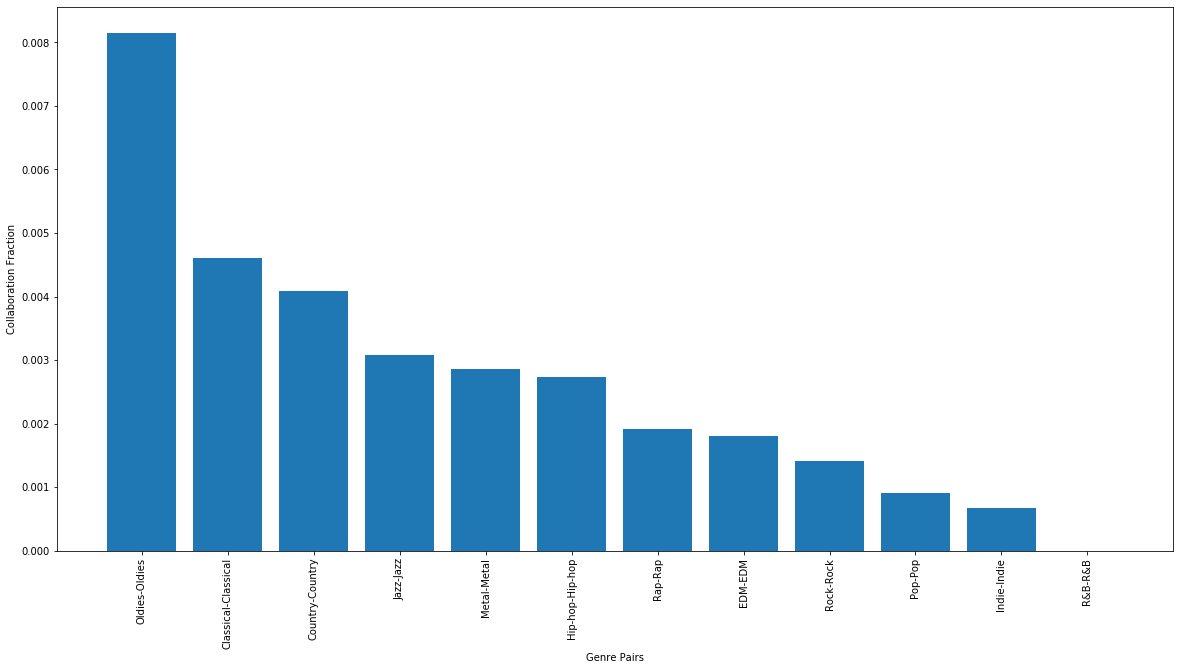

In [46]:
plt.figure(figsize=(20,10))
plt.bar(list(genre_same_pairs_fractional_lisk_dict_sorted.keys()), list(genre_same_pairs_fractional_lisk_dict_sorted.values()))
plt.xticks(rotation='vertical')
plt.ylabel('Collaboration Fraction')
plt.xlabel('Genre Pairs')
plt.show()

# Assortativity in race

In [53]:
set(artist_w_genre_gender_race_in_net['race'].tolist())

{'api', 'black', 'hispanic', 'white'}

In [54]:
distinct_races = ['api', 'black', 'hispanic', 'white']

In [57]:
api_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['race']=='api']['Id'].tolist()
black_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['race']=='black']['Id'].tolist()
hispanic_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['race']=='hispanic']['Id'].tolist()
white_artists = artist_w_genre_gender_race_in_net[artist_w_genre_gender_race_in_net['race']=='white']['Id'].tolist()

In [58]:
all_race_groups = [api_artists,black_artists,hispanic_artists,white_artists]

In [59]:
race_pairs_fractional_lisk_dict = dict()

for i, j in itertools.combinations(distinct_races, 2):
    index_i = distinct_races.index(i)
    index_j = distinct_races.index(j)
    race_pairs_fractional_lisk_dict[str(i)+'-'+str(j)] = fraction_links_node_groups(G,all_race_groups[index_i],all_race_groups[index_j])
    print('Fraction of possible links for genres: ',i,j,fraction_links_node_groups(G,all_race_groups[index_i],all_race_groups[index_j]))

Fraction of possible links for genres:  api black 0.0001810610175629187
Fraction of possible links for genres:  api hispanic 0.0009005403241945167
Fraction of possible links for genres:  api white 0.0010772578529696215
Fraction of possible links for genres:  black hispanic 0.00017901897601145723
Fraction of possible links for genres:  black white 0.0005807200929152149
Fraction of possible links for genres:  hispanic white 0.000975871735086846


In [60]:
race_pairs_fractional_lisk_dict_sorted = dict(sorted(race_pairs_fractional_lisk_dict.items(), reverse=True, key=lambda item: item[1]))

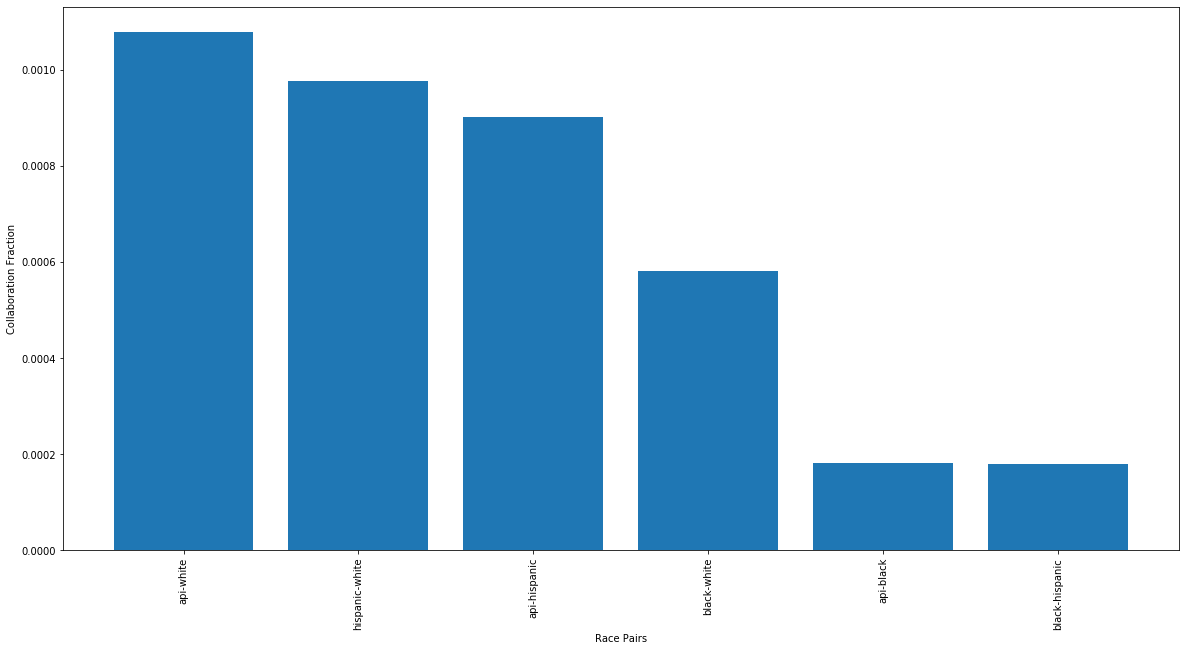

In [61]:
plt.figure(figsize=(20,10))
plt.bar(list(race_pairs_fractional_lisk_dict_sorted.keys()), list(race_pairs_fractional_lisk_dict_sorted.values()))
plt.xticks(rotation='vertical')
plt.ylabel('Collaboration Fraction')
plt.xlabel('Race Pairs')
plt.show()

Degree correlation between race groups:  api black


C:\Users\Ayan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


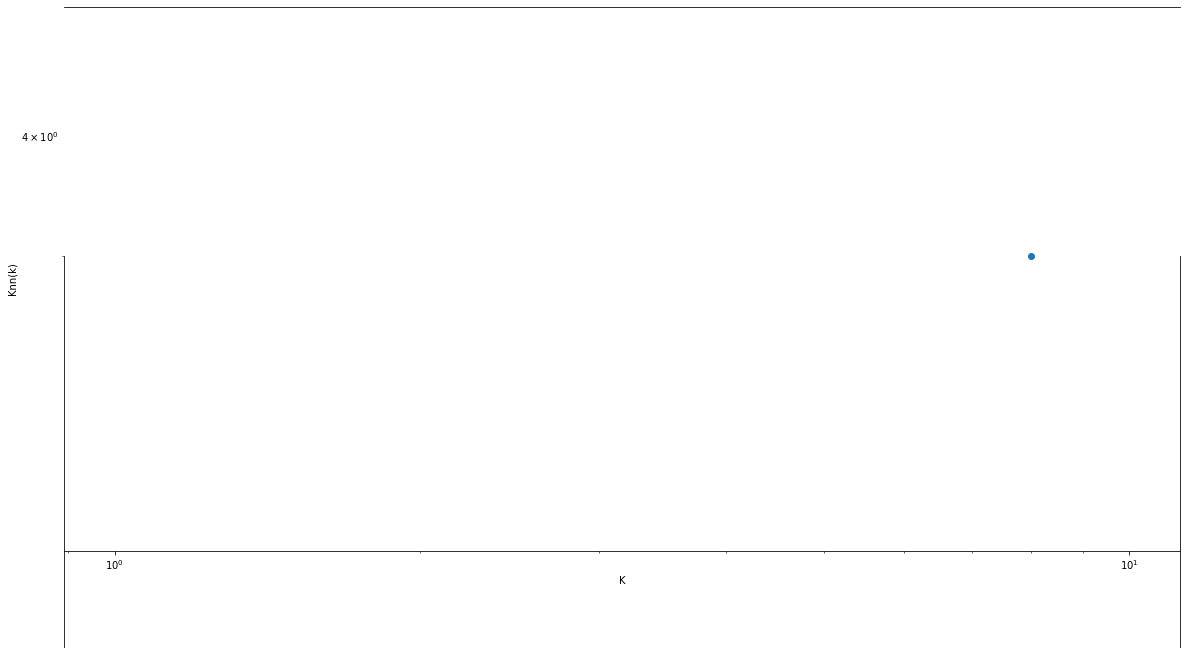

Correlation exponent and intercept:  0.33333333333333315 0.30102999566398114
Degree correlation between race groups:  api hispanic


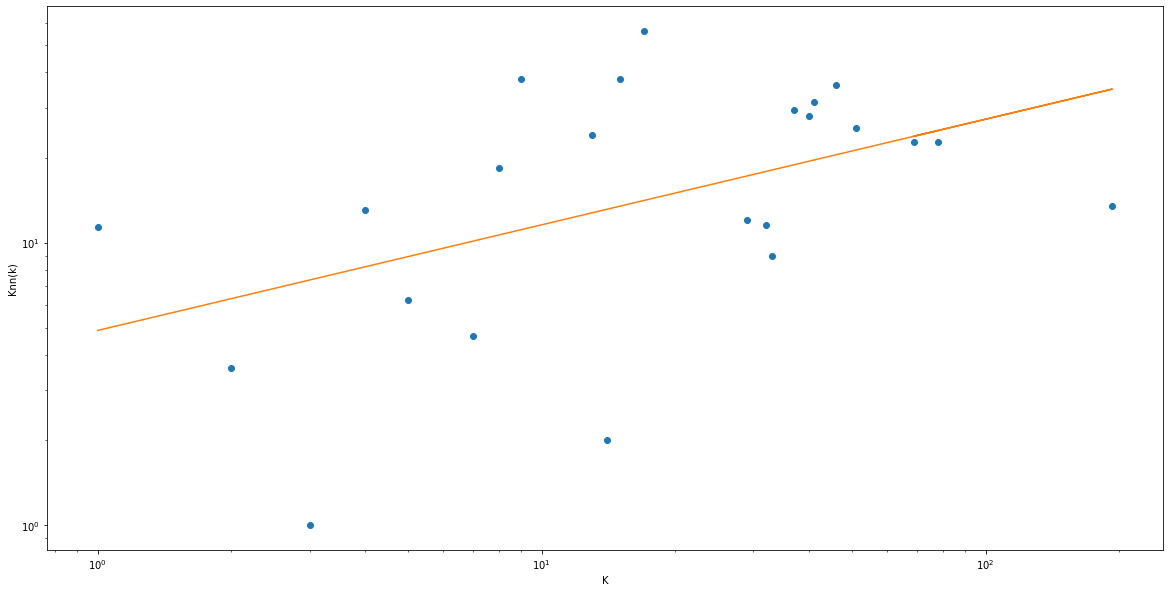

Correlation exponent and intercept:  0.37357554690133166 0.6893728895540004
Degree correlation between race groups:  api white


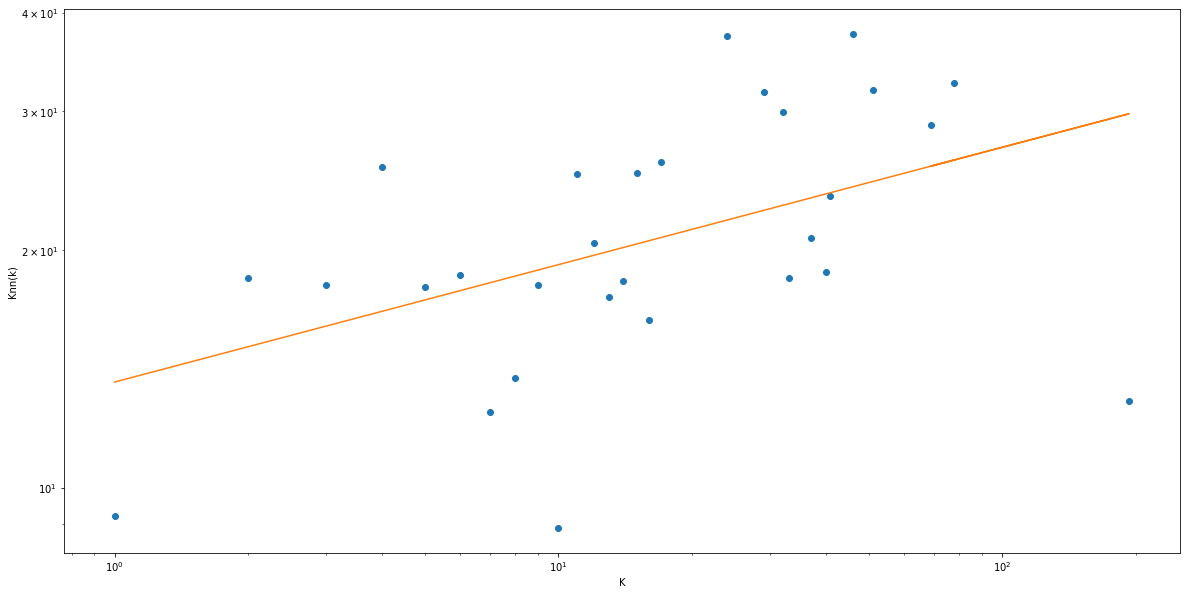

Correlation exponent and intercept:  0.14866261943259687 1.134420153236216
Degree correlation between race groups:  black hispanic


C:\Users\Ayan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


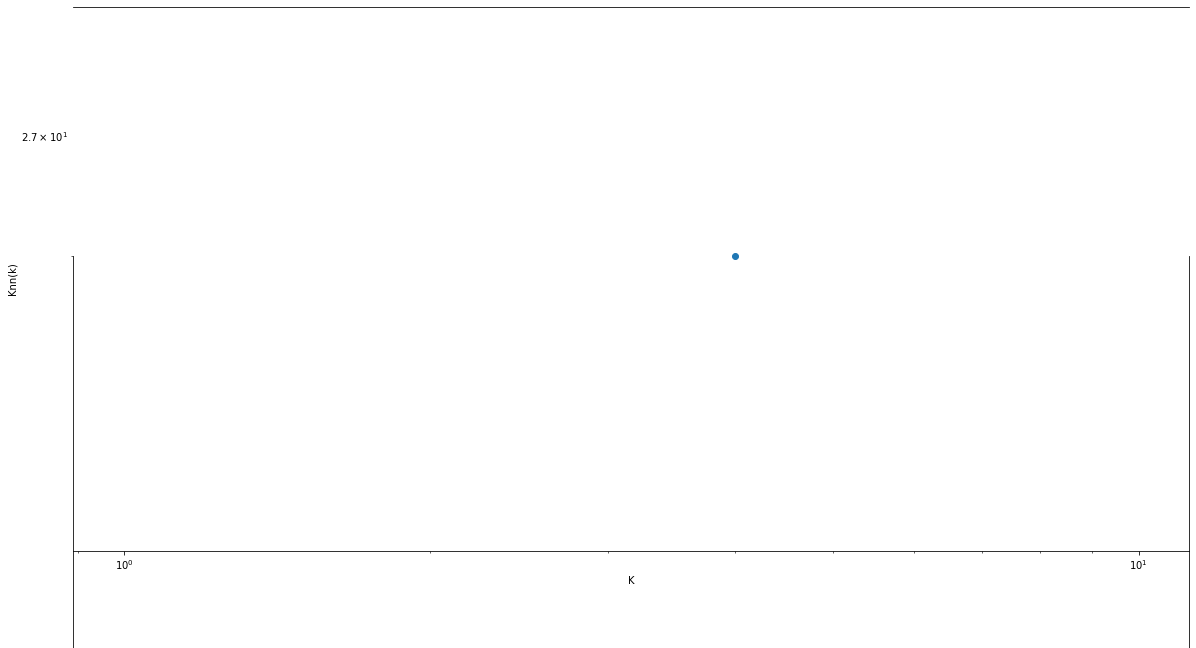

Correlation exponent and intercept:  1.1887218755408666 0.7156818820794937
Degree correlation between race groups:  black white


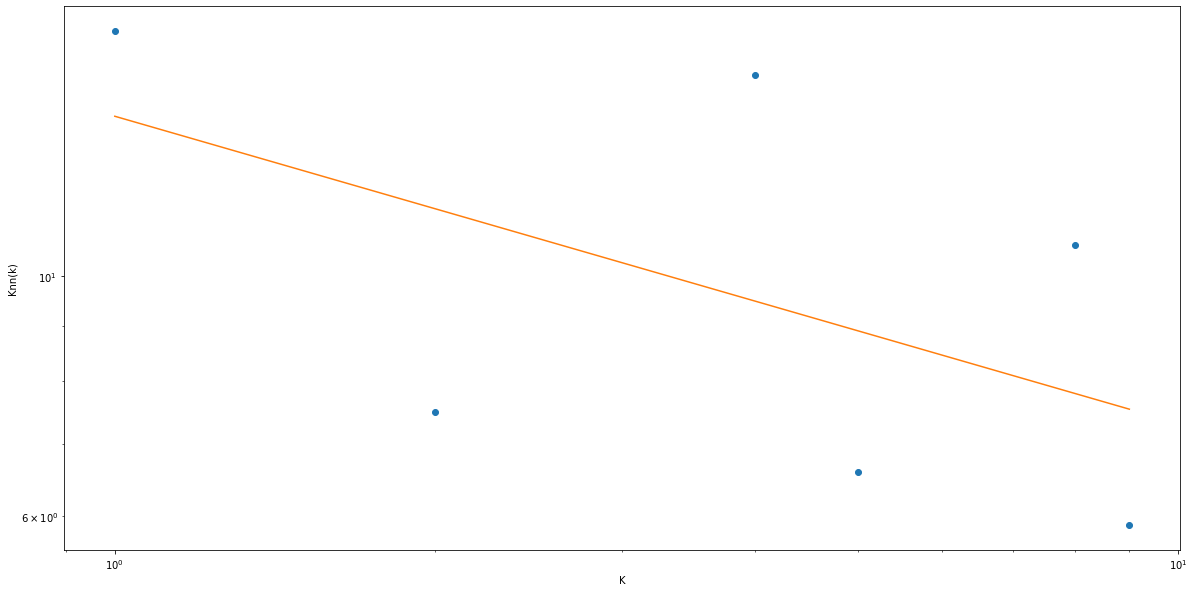

Correlation exponent and intercept:  -0.28334251723910814 1.1475857271319891
Degree correlation between race groups:  hispanic white


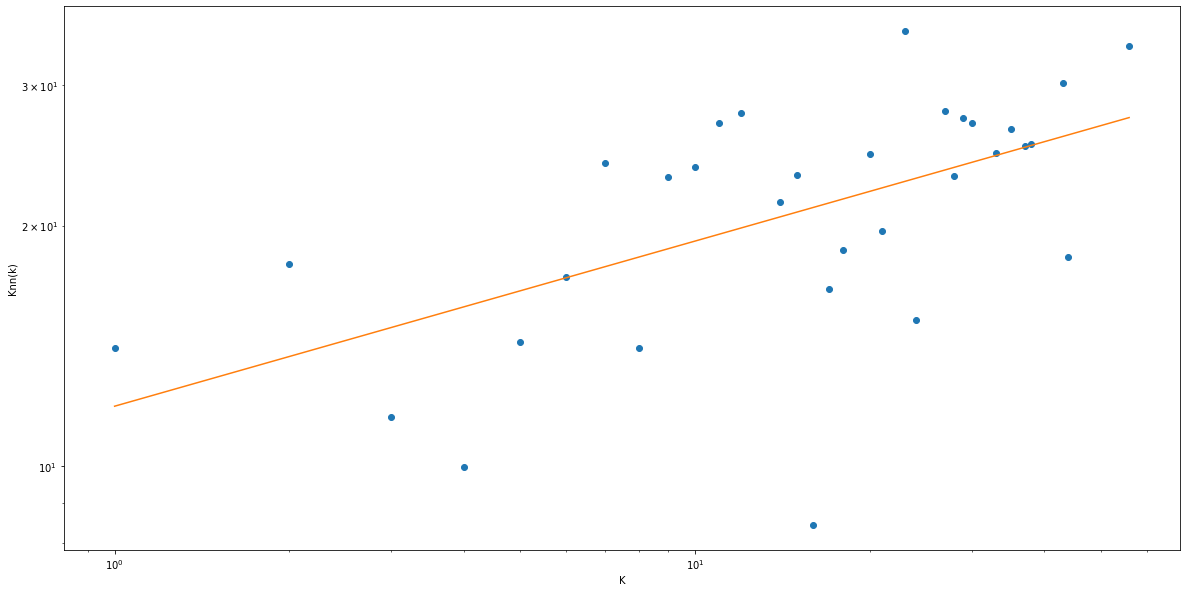

Correlation exponent and intercept:  0.2066828878059044 1.0748189993354118


In [62]:
for i, j in itertools.combinations(distinct_races, 2):
    index_i = distinct_races.index(i)
    index_j = distinct_races.index(j)
    print('Degree correlation between race groups: ', i, j)
    try:
        assortativity_in_two_groups(G,all_race_groups[index_i],all_race_groups[index_j])
    except:
        print('No collaboration found')

Populairty correlation between race groups:  api black


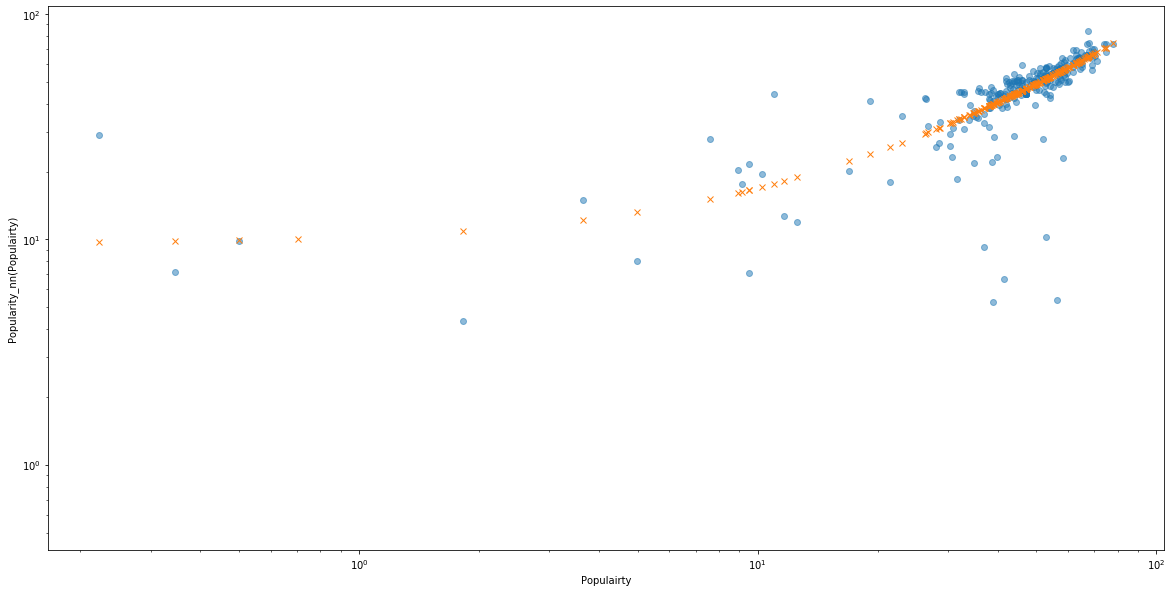

Correlation exponent and intercept:  0.0013422167369560995 0.7230867816636058 9.538369656229587
Populairty correlation between race groups:  api hispanic


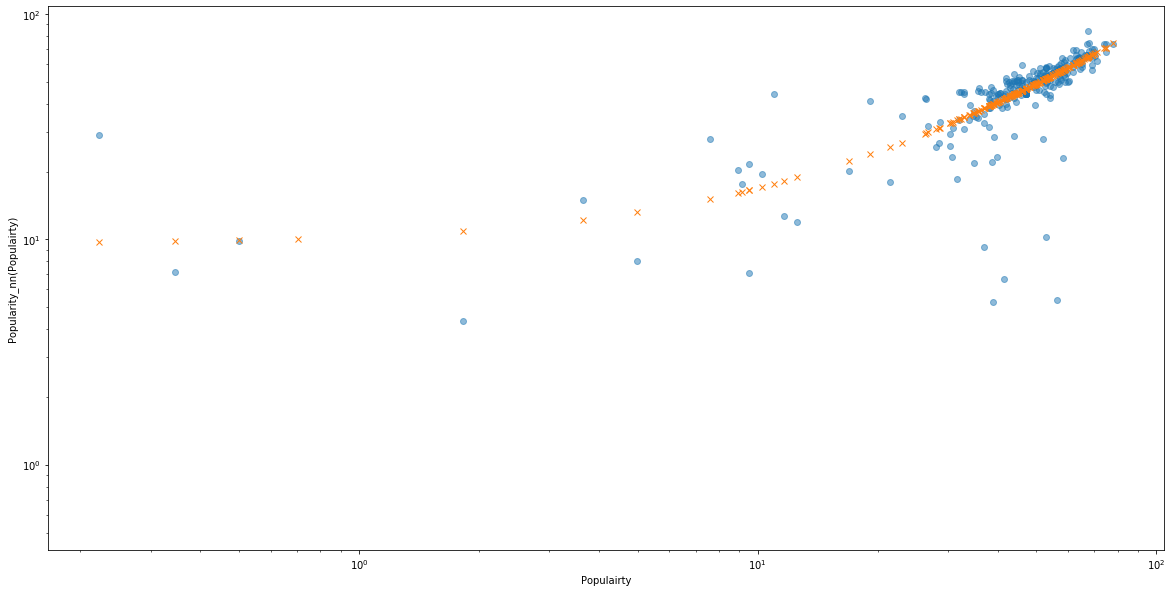

Correlation exponent and intercept:  0.0013422167369560995 0.7230867816636058 9.538369656229587
Populairty correlation between race groups:  api white


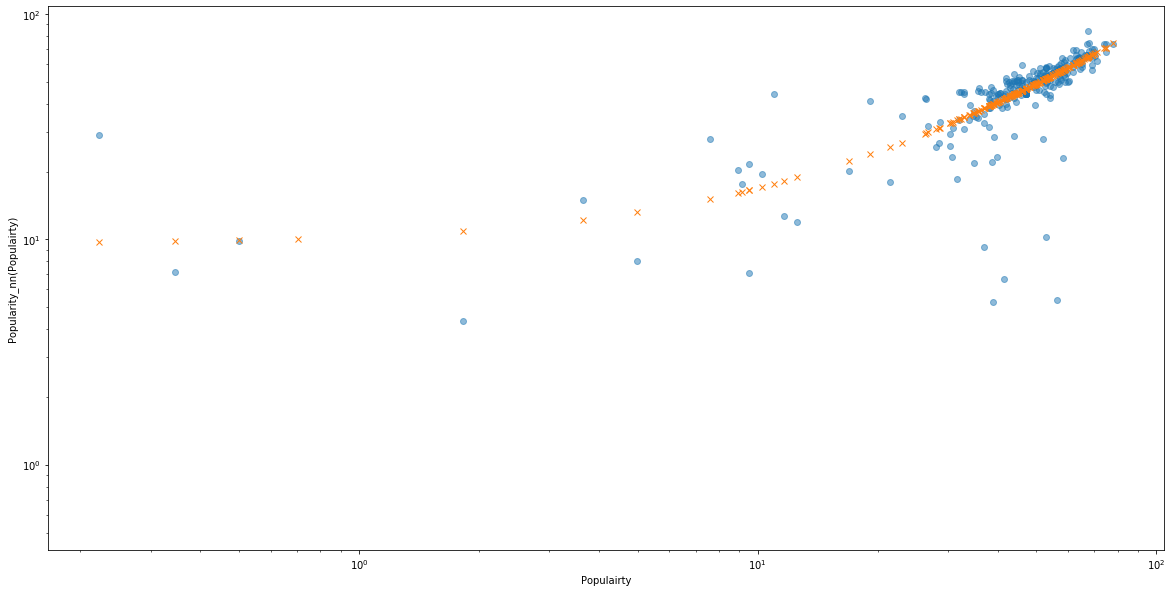

Correlation exponent and intercept:  0.0013422167369560995 0.7230867816636058 9.538369656229587
Populairty correlation between race groups:  black hispanic


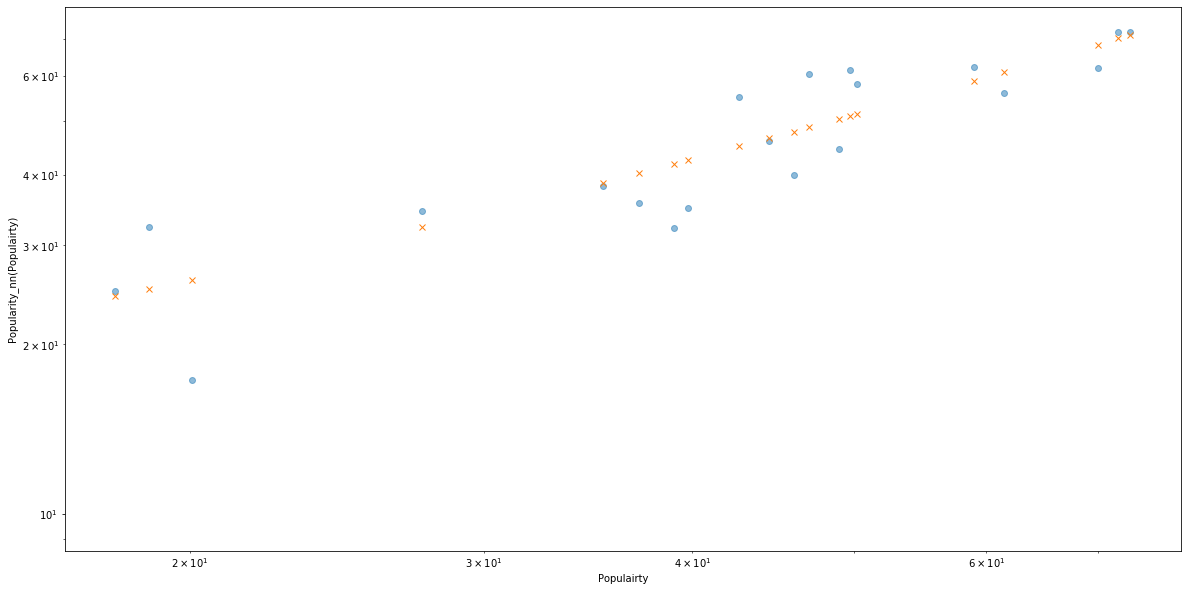

Correlation exponent and intercept:  0.0003165741472597774 0.8178495296659054 9.515175377111342
Populairty correlation between race groups:  black white


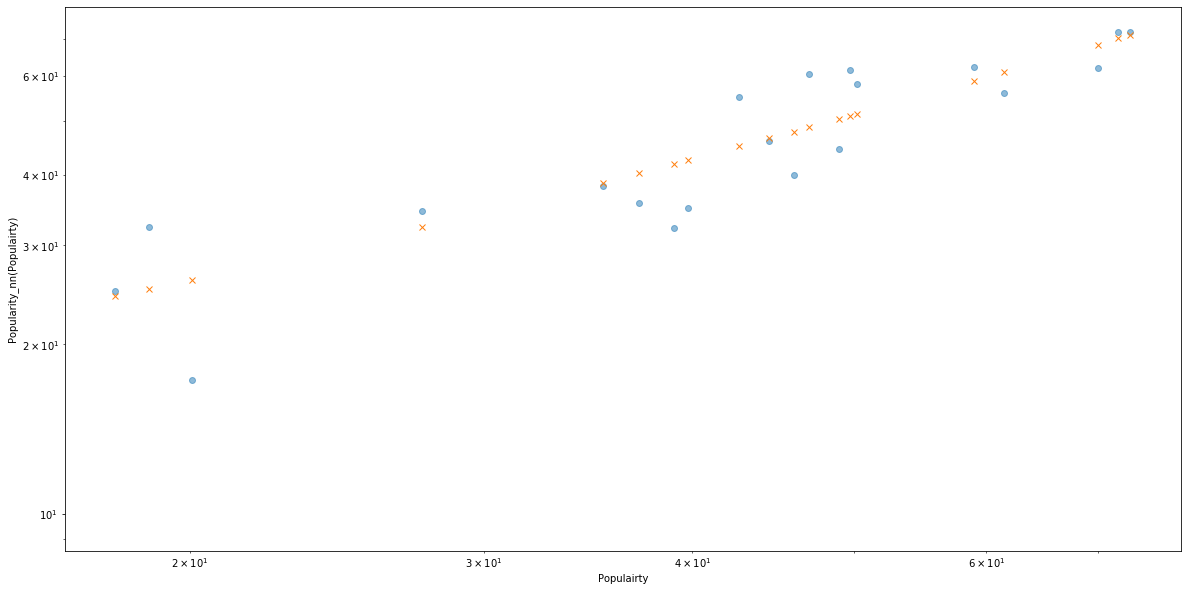

Correlation exponent and intercept:  0.0003165741472597774 0.8178495296659054 9.515175377111342
Populairty correlation between race groups:  hispanic white


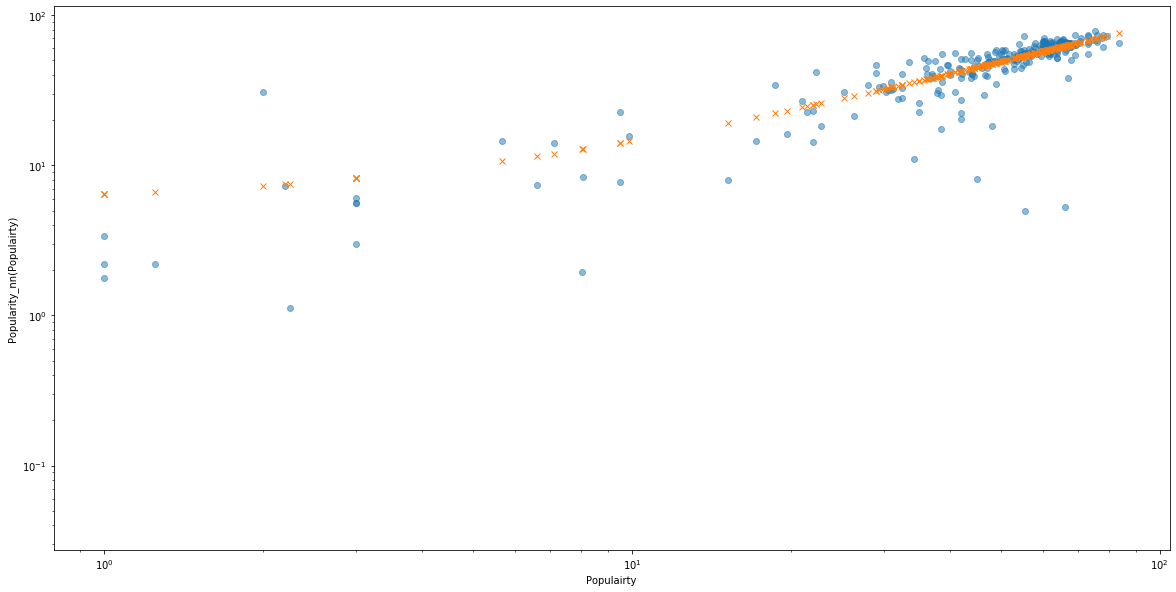

Correlation exponent and intercept:  -0.0008560203951127263 0.9152366512140001 5.492807755691456


In [63]:
for i, j in itertools.combinations(distinct_races, 2):
    index_i = distinct_races.index(i)
    index_j = distinct_races.index(j)
    print('Populairty correlation between race groups: ', i, j)
    try:
        populairty_assortativity_in_two_groups(G,artist_w_genre_gender_race_in_net,all_race_groups[index_i],all_race_groups[index_j])
    except:
        print('No collaboration found')

# Centrality measures 

In [20]:
artist_info = pd.read_csv('archive/artists_w_filtered_genres.csv')

In [25]:
artist_info_dict = dict()

for index, row in artist_info.iterrows():
    artist_info_dict[row['artists']] = dict()
    artist_info_dict[row['artists']]['popularity'] = row['popularity']
    artist_info_dict[row['artists']]['genre'] = row['filtered_genre']

In [22]:
degree_centrality_dict = nx.degree_centrality(G)
betweenness_centrality_dict = nx.betweenness_centrality(G)
eigenvector_centrality_dict = nx.eigenvector_centrality(G)

In [30]:
artist_list = list(degree_centrality_dict.keys())
deg_centrality_values = list(degree_centrality_dict.values())
betweeness_centrality_values = []
eigenvector_centrality_values = []
popularity_values = []

for artist in artist_list:
    betweeness_centrality_values.append(betweenness_centrality_dict[artist])
    eigenvector_centrality_values.append(eigenvector_centrality_dict[artist])
    popularity_values.append(artist_info_dict[artist]['popularity'])

SpearmanrResult(correlation=-0.03197114720349872, pvalue=0.02188347588569848)

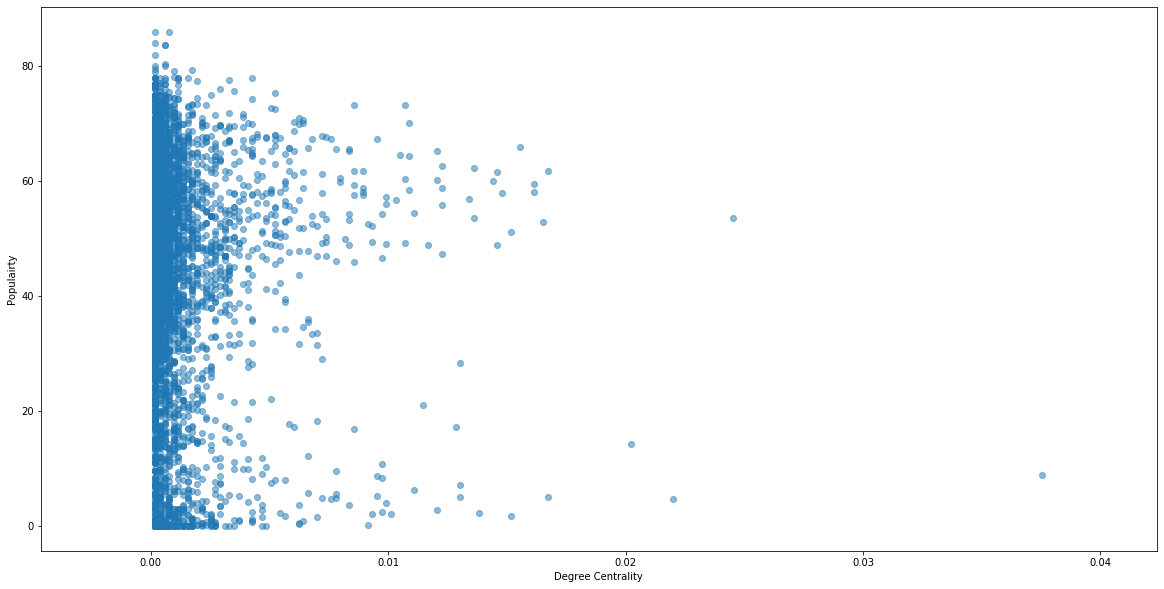

In [38]:
plt.figure(figsize=(20, 10)) 
plt.scatter(deg_centrality_values,popularity_values,alpha=0.5)
plt.xlabel('Degree Centrality')
plt.ylabel('Populairty')
stats.spearmanr(deg_centrality_values,popularity_values)

SpearmanrResult(correlation=-0.03197114720349872, pvalue=0.02188347588569848)

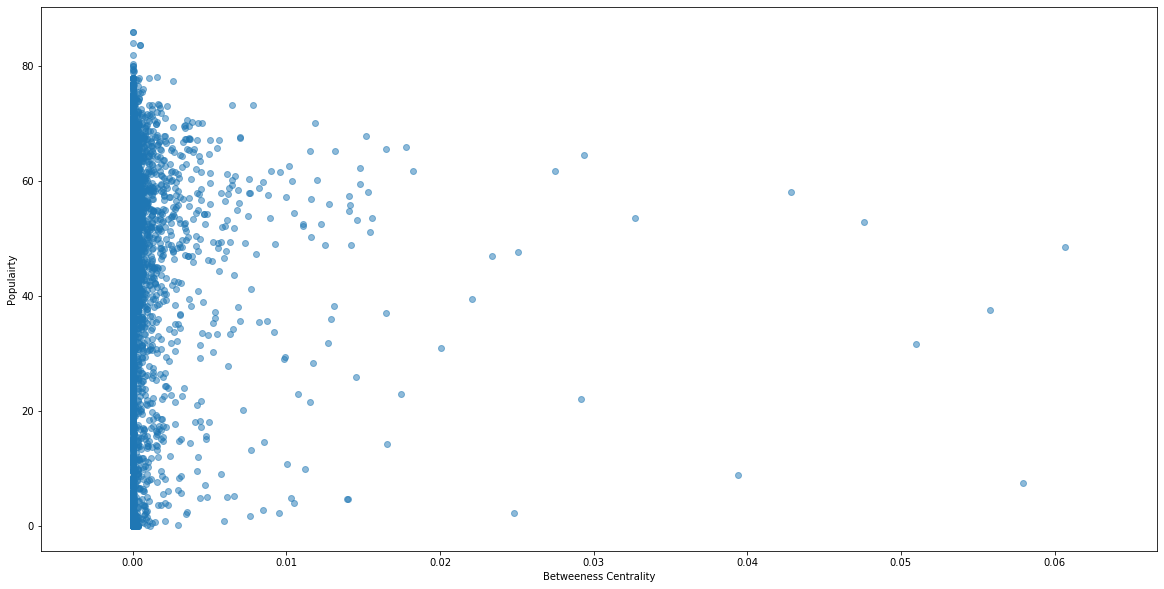

In [39]:
plt.figure(figsize=(20, 10)) 
plt.scatter(betweeness_centrality_values,popularity_values,alpha=0.5)
plt.xlabel('Betweeness Centrality')
plt.ylabel('Populairty')
stats.spearmanr(deg_centrality_values,popularity_values)

SpearmanrResult(correlation=-0.03197114720349872, pvalue=0.02188347588569848)

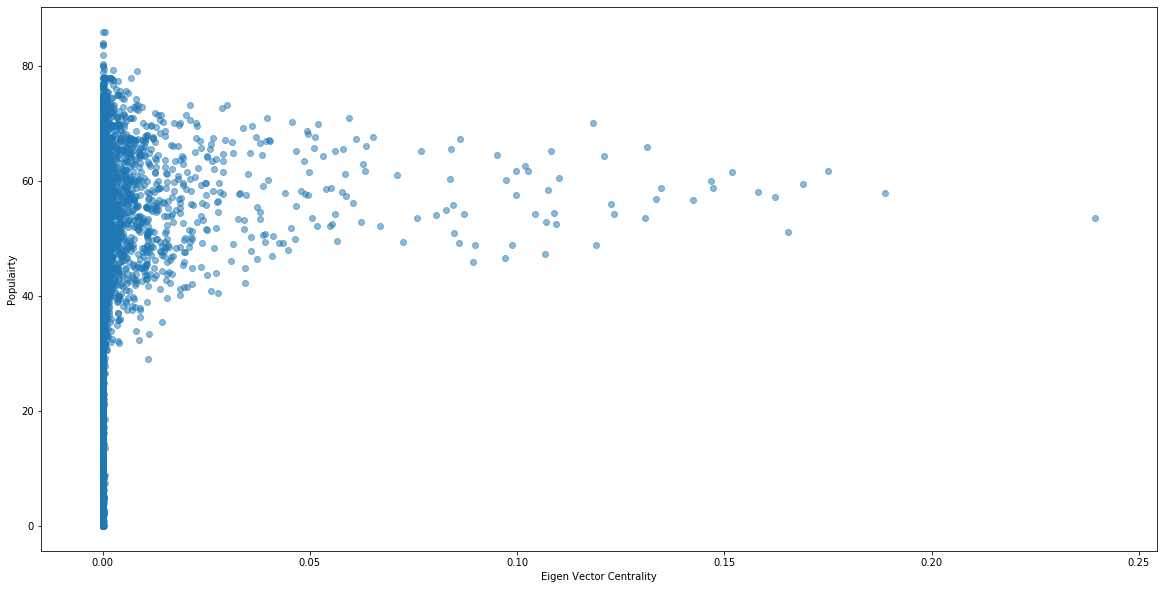

In [40]:
plt.figure(figsize=(20, 10)) 
plt.scatter(eigenvector_centrality_values,popularity_values,alpha=0.5)
plt.xlabel('Eigen Vector Centrality')
plt.ylabel('Populairty')
stats.spearmanr(deg_centrality_values,popularity_values)

# Popularity and Genre

In [69]:
link_table = pd.read_csv('archive/Collaboration_links_w_genre.csv')

In [70]:
link_table

source             target  release_date  populairty
0          Robert Schumann  Vladimir Horowitz          1928           0
1          Frédéric Chopin  Vladimir Horowitz          1928           1
2        Felix Mendelssohn  Vladimir Horowitz          1928           0
3              Franz Liszt  Vladimir Horowitz          1928           0
4      Sergei Rachmaninoff  Vladimir Horowitz          1928           0
...                    ...                ...           ...         ...
14855             Lil Tjay            Sheff G          2020          67
14856             Lil Tjay      Sleepy Hallow          2020          67
14857            Meek Mill        Roddy Ricch          2020          66
14858                 Kygo          Oh Wonder          2020          70
14859            Cash Cash       Andy Grammer          2020          70

[14860 rows x 4 columns]

In [71]:
artist_table = pd.read_csv('archive/Collaboration_nodes_w_genre.csv')

In [72]:
artist_genre_dict = dict()

for index, row in artist_table.iterrows():
    artist_genre_dict[row['Id']] = row['filtered_genre']

In [73]:
source_genre = []
target_genre = []

for index, row in link_table.iterrows():
    source_genre.append(artist_genre_dict[row['source']])
    target_genre.append(artist_genre_dict[row['target']])
    
link_table['source_genre'] = source_genre
link_table['target_genre'] = target_genre

In [74]:
link_table

source             target  release_date  populairty  \
0          Robert Schumann  Vladimir Horowitz          1928           0   
1          Frédéric Chopin  Vladimir Horowitz          1928           1   
2        Felix Mendelssohn  Vladimir Horowitz          1928           0   
3              Franz Liszt  Vladimir Horowitz          1928           0   
4      Sergei Rachmaninoff  Vladimir Horowitz          1928           0   
...                    ...                ...           ...         ...   
14855             Lil Tjay            Sheff G          2020          67   
14856             Lil Tjay      Sleepy Hallow          2020          67   
14857            Meek Mill        Roddy Ricch          2020          66   
14858                 Kygo          Oh Wonder          2020          70   
14859            Cash Cash       Andy Grammer          2020          70   

      source_genre target_genre  
0        Classical    Classical  
1        Classical    Classical  
2        Classical    Classical  
3        Classical    Classical  
4        Classical    Classical  
...            ...          ...  
14855          Rap          Rap  
14856          Rap          Rap  
14857      Hip-hop          Rap  
14858          EDM        Indie  
14859      Country          EDM  

[14860 rows x 6 columns]

In [76]:
link_table_classical_classical = link_table[link_table['source_genre'].isin(['Classical'])]
link_table_classical_classical = link_table_classical_classical[link_table_classical_classical['target_genre'].isin(['Classical'])]

In [78]:
print('Average popularity in classical-classical collaboration: ', np.mean(link_table_classical_classical['populairty'].tolist()))

Average popularity in classical-classical collaboration:  16.700680272108844


In [79]:
link_table_classical = link_table[link_table['source_genre'].isin(['Classical'])]
link_table_classical_other = link_table_classical[~link_table_classical['target_genre'].isin(['Classical'])]
link_table_classical_1 = link_table[link_table['target_genre'].isin(['Classical'])]
link_table_classical_other_1 = link_table_classical_1[~link_table_classical_1['source_genre'].isin(['Classical'])]
link_table_classical_other_all = pd.concat([link_table_classical_other,link_table_classical_other_1]).drop_duplicates(subset=['source','target'])

In [81]:
print('Average popularity in classical-other collaboration: ', np.mean(link_table_classical_other_all['populairty'].tolist()))

Average popularity in classical-other collaboration:  21.533088235294116


In [82]:
link_table_pop = link_table[link_table['source_genre'].isin(['Pop'])]
link_table_pop_pop = link_table_pop[link_table_pop['target_genre'].isin(['Pop'])]

In [83]:
print('Average popularity in pop-pop collaboration: ', np.mean(link_table_pop_pop['populairty'].tolist()))

Average popularity in pop-pop collaboration:  54.05391527599487


In [85]:
link_table_pop = link_table[link_table['source_genre'].isin(['Pop'])]
link_table_pop_other = link_table_pop[~link_table_pop['target_genre'].isin(['Pop'])]
link_table_pop_1 = link_table[link_table['target_genre'].isin(['Pop'])]
link_table_pop_other_1 = link_table_pop_1[~link_table_pop_1['source_genre'].isin(['Pop'])]
link_table_pop_other_all = pd.concat([link_table_pop_other,link_table_pop_other_1]).drop_duplicates(subset=['source','target'])

In [86]:
print('Average popularity in pop-other collaboration: ', np.mean(link_table_pop_other_all['populairty'].tolist()))

Average popularity in pop-other collaboration:  57.60349854227405


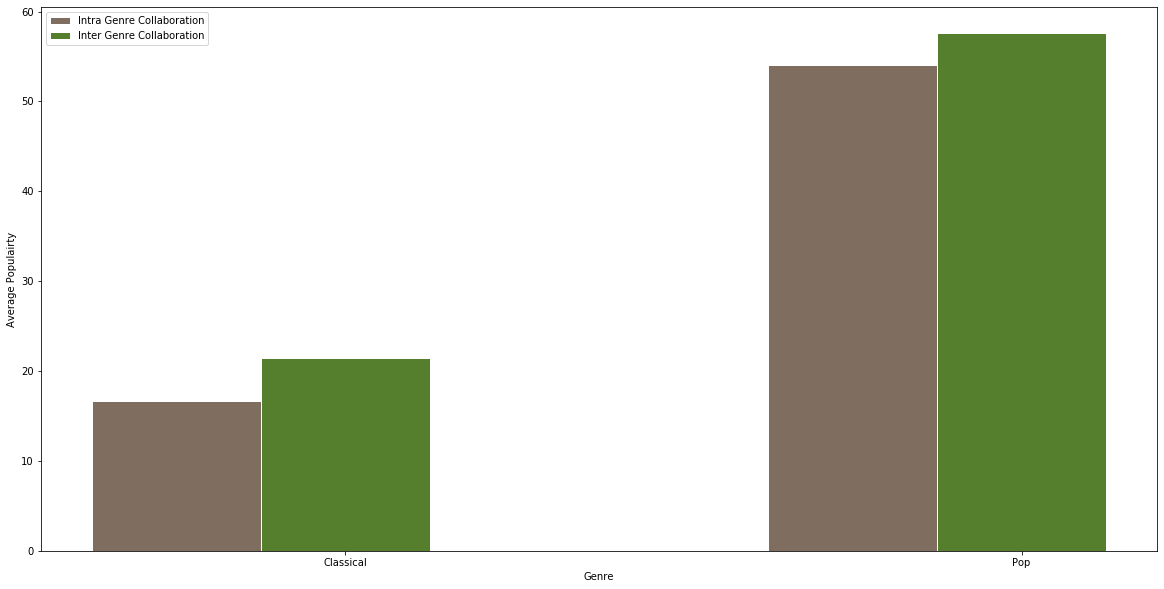

In [91]:
barWidth = 0.25

intra = [16.7,54.0]
inter = [21.5,57.6]

r1 = np.arange(len(intra))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(20,10))

plt.bar(r1, intra, color='#7f6d5f', width=barWidth, edgecolor='white', label='Intra Genre Collaboration')
plt.bar(r2, inter, color='#557f2d', width=barWidth, edgecolor='white', label='Inter Genre Collaboration')

plt.xlabel('Genre')
plt.ylabel('Average Populairty')
plt.xticks([r + barWidth for r in range(len(intra))], ['Classical','Pop'])

plt.legend()
plt.show()